In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding datasets

In [69]:
orders = pd.read_csv("Train/orders.csv")
train_customers = pd.read_csv("Train/train_customers.csv")
train_locations = pd.read_csv("Train/train_locations.csv")
vendors = pd.read_csv("Train/vendors.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7788\1988567086.py:1: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv("Train/orders.csv")


In [70]:
test_customers = pd.read_csv("Test/test_customers.csv")
test_locations = pd.read_csv("Test/test_locations.csv")

In [71]:
print(train_customers.columns)
print(test_customers.columns)

Index(['customer_id', 'gender', 'dob', 'status', 'verified', 'language',
       'created_at', 'updated_at'],
      dtype='object')
Index(['customer_id', 'gender', 'dob', 'status', 'verified', 'language',
       'created_at', 'updated_at'],
      dtype='object')


In [72]:
train_customers.head(5)

customer_id gender  dob  status  verified language       created_at  \
0     TCHWPBT   Male  NaN       1         1       EN   2/7/2023 19:16   
1     ZGFSYCZ   Male  NaN       1         1       EN   2/9/2023 12:04   
2     S2ALZFL   Male  NaN       0         1       EN  3/14/2023 18:31   
3     952DBJQ   Male  NaN       1         1       EN  3/15/2023 19:47   
4     1IX6FXS   Male  NaN       1         1       EN  3/15/2023 19:57   

        updated_at  
0   2/7/2023 19:16  
1   2/9/2023 12:04  
2  3/14/2023 18:31  
3  3/15/2023 19:47  
4  3/15/2023 19:57

In [73]:
train_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34674 entries, 0 to 34673
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  34674 non-null  object 
 1   gender       22520 non-null  object 
 2   dob          3046 non-null   float64
 3   status       34674 non-null  int64  
 4   verified     34674 non-null  int64  
 5   language     21099 non-null  object 
 6   created_at   34674 non-null  object 
 7   updated_at   34674 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.1+ MB


In [74]:
print(train_customers.describe())

for col in train_customers.columns:
    train_customers[col].describe()

               dob        status      verified
count  3046.000000  34674.000000  34674.000000
mean   1991.210768      0.998991      0.956538
std      48.422045      0.031756      0.203898
min       1.000000      0.000000      0.000000
25%    1986.000000      1.000000      1.000000
50%    1993.000000      1.000000      1.000000
75%    1999.000000      1.000000      1.000000
max    2562.000000      1.000000      1.000000


### Univariate analysis on train_customers dataset

In [75]:
# Statistical summary of train_customers dataset
print("Statistical summary of numerical columns:")
print(train_customers.describe())

# More detailed analysis for each column type
print("\n--- Detailed Column Analysis ---\n")

# Analyze categorical columns
categorical_cols = ['gender', 'status', 'verified', 'language']
for col in categorical_cols:
    print(f"\n{col.upper()} DISTRIBUTION:")
    value_counts = train_customers[col].value_counts()
    print(value_counts)
    print(f"Missing values: {train_customers[col].isnull().sum()} ({train_customers[col].isnull().sum()/len(train_customers)*100:.2f}%)")

# Analyze date of birth
print("\nDOB ANALYSIS:")
print(f"Min year: {train_customers['dob'].min()}")
print(f"Max year: {train_customers['dob'].max()}")
print(f"Missing DOB: {train_customers['dob'].isnull().sum()} ({train_customers['dob'].isnull().sum()/len(train_customers)*100:.2f}%)")

# Analyze timestamp columns
print("\nTIMESTAMP ANALYSIS:")
for col in ['created_at', 'updated_at']:
    # Convert timestamp columns to datetime format
    try:
        train_customers[col] = pd.to_datetime(train_customers[col])
    except ValueError as e:
        print(f"Error converting {col} to datetime: {e}")
        # Try with a specific format or mixed format
        train_customers[col] = pd.to_datetime(train_customers[col], format='mixed', errors='coerce')
    
print(f"Registration period: {train_customers['created_at'].min()} to {train_customers['created_at'].max()}")
print(f"Last update period: {train_customers['updated_at'].min()} to {train_customers['updated_at'].max()}")

# Registration trend by year and month
print("\nRegistration count by year-month:")
train_customers['year_month'] = train_customers['created_at'].dt.strftime('%Y-%m')
monthly_counts = train_customers.groupby('year_month').size().reset_index(name='count')
print(monthly_counts.head(10))

Statistical summary of numerical columns:
               dob        status      verified
count  3046.000000  34674.000000  34674.000000
mean   1991.210768      0.998991      0.956538
std      48.422045      0.031756      0.203898
min       1.000000      0.000000      0.000000
25%    1986.000000      1.000000      1.000000
50%    1993.000000      1.000000      1.000000
75%    1999.000000      1.000000      1.000000
max    2562.000000      1.000000      1.000000

--- Detailed Column Analysis ---


GENDER DISTRIBUTION:
gender
Male          17815
male           2914
Female         1761
Female           13
Male              9
Female            2
Female            2
?????             2
Female            1
                  1
Name: count, dtype: int64
Missing values: 12154 (35.05%)

STATUS DISTRIBUTION:
status
1    34639
0       35
Name: count, dtype: int64
Missing values: 0 (0.00%)

VERIFIED DISTRIBUTION:
verified
1    33167
0     1507
Name: count, dtype: int64
Missing values: 0 (0.00%)

LAN

TIMESTAMP ANALYSIS (FIXED):
  created_at period: 2023-02-07 19:16:00 to 2025-03-03 13:31:00
  created_at missing: 119 (0.34%)
  updated_at period: 2023-02-07 19:16:00 to 2025-04-08 02:56:00
  updated_at missing: 128 (0.37%)

REGISTRATION PATTERNS:

Registrations by Year:
reg_year
2023.0     7442
2024.0    19219
2025.0     7894
Name: count, dtype: int64

Registrations by Month (all years):
reg_month
1.0     4689
2.0     5132
3.0     1594
4.0      913
5.0     1079
6.0     2207
7.0     1912
8.0     1837
9.0     2605
10.0    4636
11.0    4104
12.0    3847
Name: count, dtype: int64

Registrations by Hour of Day:
reg_hour
0.0     2430
1.0     2088
2.0     1153
3.0      524
4.0      251
5.0      140
6.0      510
7.0       78
8.0      136
9.0      177
10.0     266
11.0     478
12.0    1028
13.0    1134
14.0    1775
15.0    1953
16.0    1794
17.0    1808
18.0    1708
19.0    2031
20.0    2837
21.0    3368
22.0    3588
23.0    3300
Name: count, dtype: int64


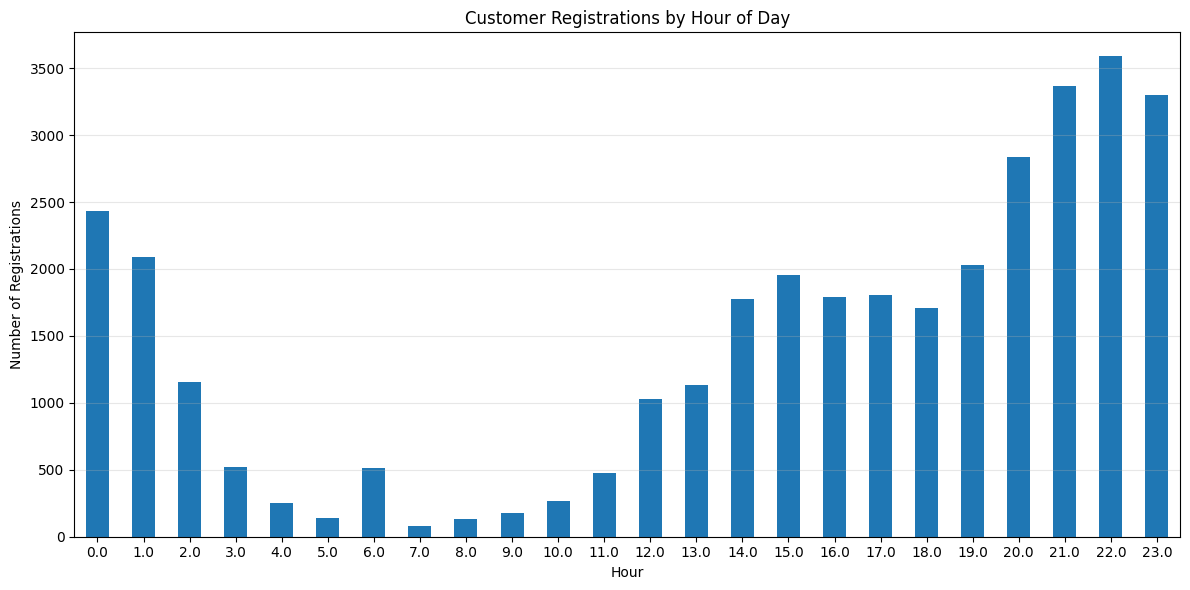

In [76]:
# Fix datetime conversion issues and analyze timestamps
print("TIMESTAMP ANALYSIS (FIXED):")

# Function to properly convert timestamps with more flexible parsing
def convert_timestamps(df, time_columns):
    df_copy = df.copy()
    for col in time_columns:
        # Convert to datetime with more flexible parsing
        df_copy[col] = pd.to_datetime(df_copy[col], errors='coerce')
        
        # Report any remaining NaT values after conversion
        nat_count = df_copy[col].isna().sum()
        if nat_count > 0:
            print(f"  Warning: {nat_count} values in {col} couldn't be converted to datetime")
            
        # Format info for the successfully converted dates
        valid_dates = df_copy[col].dropna()
        if len(valid_dates) > 0:
            print(f"  {col} period: {valid_dates.min()} to {valid_dates.max()}")
            print(f"  {col} missing: {nat_count} ({nat_count/len(df_copy)*100:.2f}%)")
    
    return df_copy

# Apply the conversion function
timestamp_cols = ['created_at', 'updated_at']
train_customers_fixed = convert_timestamps(train_customers, timestamp_cols)

# Analyze registration patterns
print("\nREGISTRATION PATTERNS:")
train_customers_fixed['reg_year'] = train_customers_fixed['created_at'].dt.year
train_customers_fixed['reg_month'] = train_customers_fixed['created_at'].dt.month
train_customers_fixed['reg_day'] = train_customers_fixed['created_at'].dt.day
train_customers_fixed['reg_hour'] = train_customers_fixed['created_at'].dt.hour

# Registration by year
yearly_reg = train_customers_fixed['reg_year'].value_counts().sort_index()
print("\nRegistrations by Year:")
print(yearly_reg)

# Registration by month (across all years)
monthly_reg = train_customers_fixed['reg_month'].value_counts().sort_index()
print("\nRegistrations by Month (all years):")
print(monthly_reg)

# Registration by hour of day
hourly_reg = train_customers_fixed['reg_hour'].value_counts().sort_index()
print("\nRegistrations by Hour of Day:")
print(hourly_reg)

# Plot registrations by hour
plt.figure(figsize=(12, 6))
hourly_reg.plot(kind='bar')
plt.title('Customer Registrations by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

In [77]:
# Exploratory Data Analysis on train_customers dataset

# Basic information
print(f"Shape of train_customers: {train_customers.shape}")
print(f"Number of unique customers: {train_customers['customer_id'].nunique()}")

# Check missing values
missing_values = train_customers.isnull().sum()
missing_percentage = (missing_values / len(train_customers)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})
print("\nMissing Values Information:")
print(missing_info)


Shape of train_customers: (34674, 9)
Number of unique customers: 34523

Missing Values Information:
             Missing Values  Missing Percentage
customer_id               0                0.00
gender                12154               35.05
dob                   31628               91.22
status                    0                0.00
verified                  0                0.00
language              13575               39.15
created_at              119                0.34
updated_at              128                0.37
year_month              119                0.34


In [78]:
train_customers['gender'].value_counts()

gender
Male          17815
male           2914
Female         1761
Female           13
Male              9
Female            2
Female            2
?????             2
Female            1
                  1
Name: count, dtype: int64

In [79]:
plt.figure(figsize=(10, 6))
gender_counts = train_customers['gender'].value_counts()
gender_counts.plot(kind='bar', color=sns.color_palette("viridis"))
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [80]:
plt.figure(figsize=(10, 6))
status_counts = train_customers['status'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Customer Status Distribution')
plt.ylabel('')

Text(0, 0.5, '')

<Figure size 1000x600 with 0 Axes>

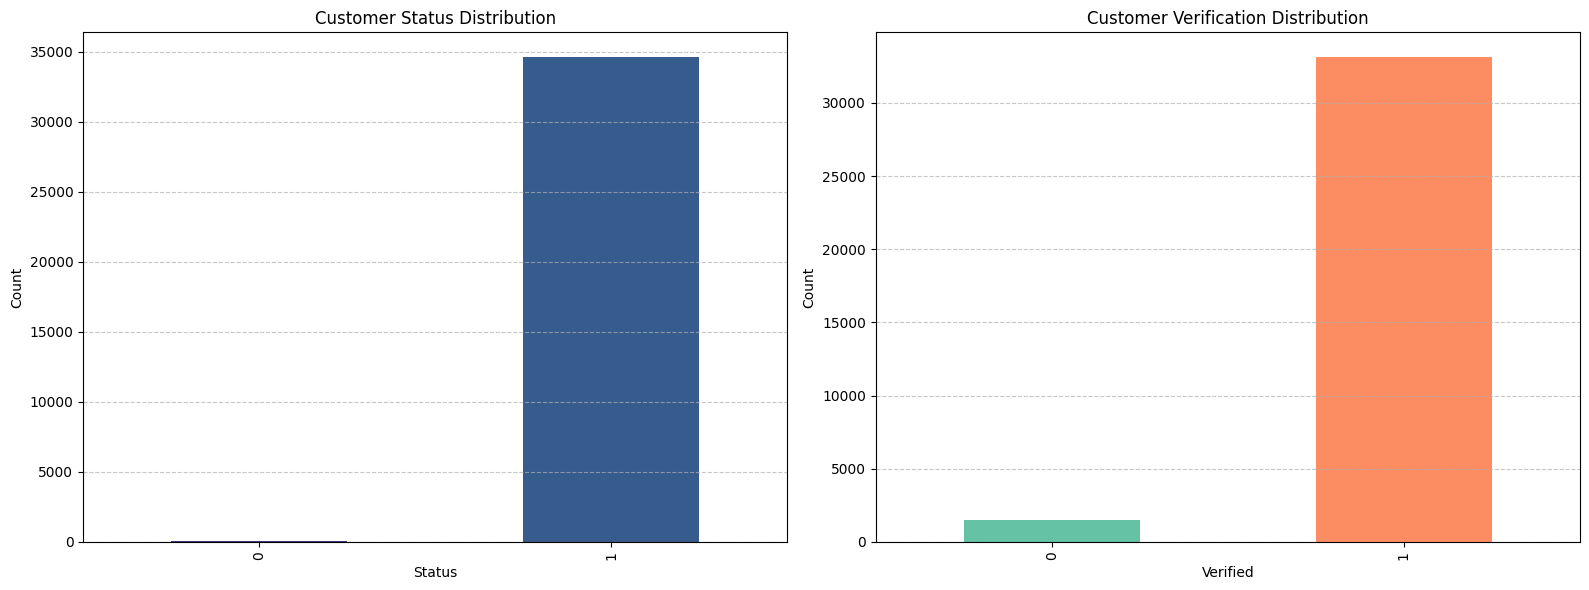

In [81]:
plt.figure(figsize=(10, 6))
status_counts = train_customers['status']
verified_values = train_customers['verified']

# Create subplots for status and verified values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot status distribution
status_value_counts = status_counts.value_counts().sort_index()
status_value_counts.plot(kind='bar', ax=ax1, color=sns.color_palette("viridis"))
ax1.set_title('Customer Status Distribution')
ax1.set_xlabel('Status')
ax1.set_ylabel('Count')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot verified distribution
verified_value_counts = verified_values.value_counts().sort_index()
verified_value_counts.plot(kind='bar', ax=ax2, color=sns.color_palette("Set2"))
ax2.set_title('Customer Verification Distribution')
ax2.set_xlabel('Verified')
ax2.set_ylabel('Count')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

In [82]:
print(train_customers['language'].value_counts())
print(train_customers['language'].isnull().sum())
train_customers['language'].size

language
EN    21099
Name: count, dtype: int64
13575


34674

In [83]:
train_customers['created_at'] = pd.to_datetime(train_customers['created_at'])
train_customers['month_year'] = train_customers['created_at'].dt.to_period('M')

monthly_registrations = train_customers.groupby('month_year').size()

plt.figure(figsize=(14, 6))
monthly_registrations.plot(kind='line', marker='o', color='#30a2da')
plt.title('Customer Registration Trend by Month')
plt.ylabel('Number of Registrations')
plt.xlabel('Month')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

(array([648, 660]), [Text(648, 0, 'Jan\n2024'), Text(660, 0, 'Jan\n2025')])

In [84]:
train_customers['updated_at'] = pd.to_datetime(train_customers['updated_at'])
train_customers['month_year'] = train_customers['updated_at'].dt.to_period('M')

monthly_registrations = train_customers.groupby('month_year').size()

plt.figure(figsize=(14, 6))
monthly_registrations.plot(kind='line', marker='o', color='#30a2da')
plt.title('Customer updatations by Month')
plt.ylabel('Number of updations')
plt.xlabel('Month')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

(array([648, 660]), [Text(648, 0, 'Jan\n2024'), Text(660, 0, 'Jan\n2025')])

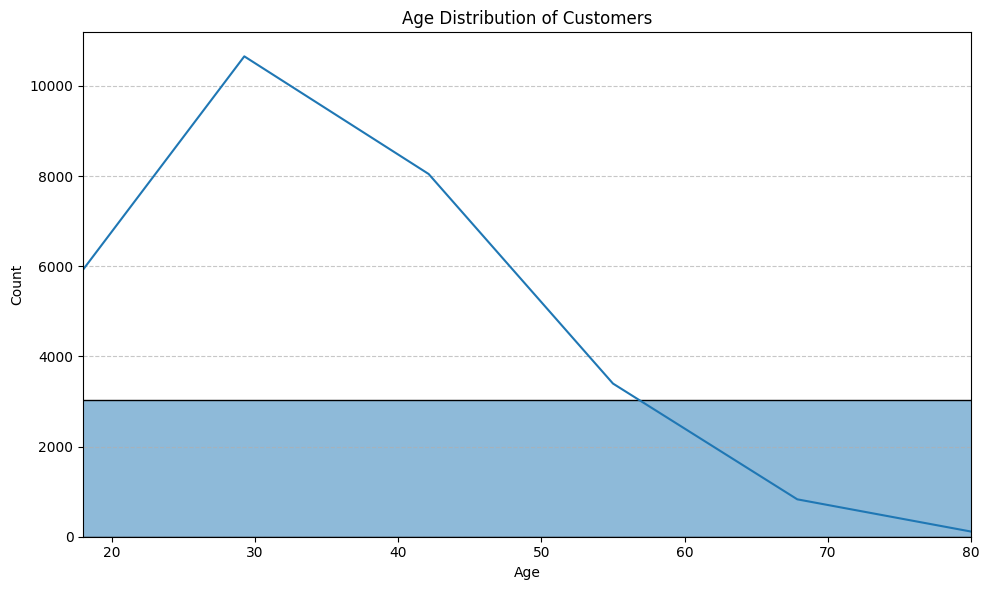

In [85]:
plt.figure(figsize=(10, 6))
current_year = pd.to_datetime('now').year
train_customers_with_dob = train_customers[train_customers['dob'].notnull()].copy()
train_customers_with_dob['age'] = current_year - train_customers_with_dob['dob']

sns.histplot(data=train_customers_with_dob, x='age', kde=True, bins=20)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(18, 80)  # Reasonable age range
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

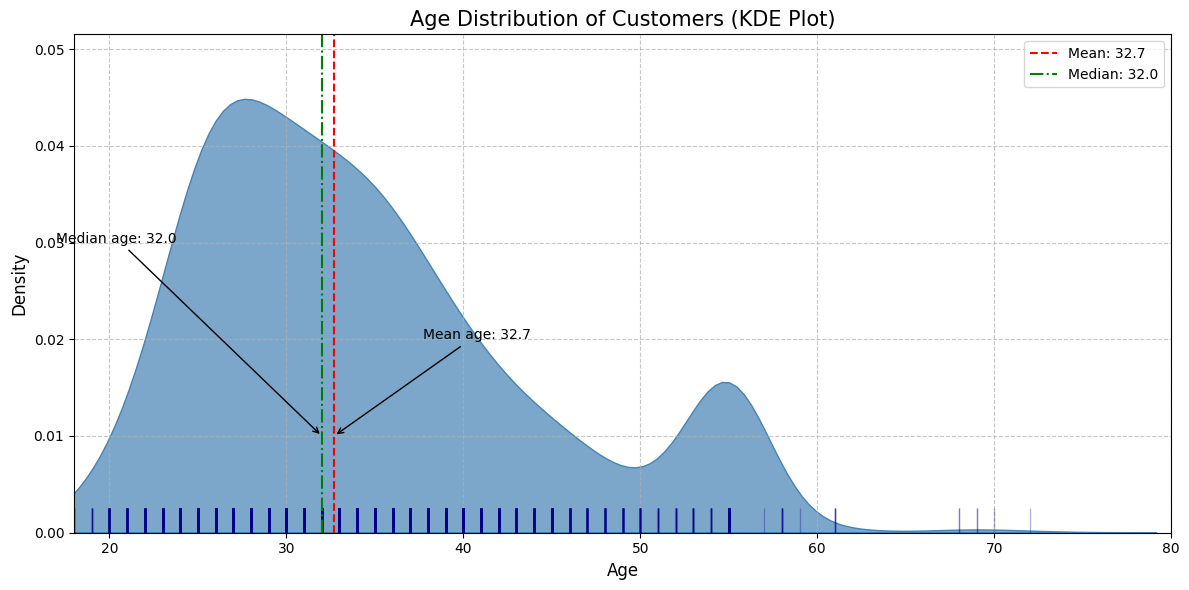

In [86]:
# Create a KDE plot of the age distribution
plt.figure(figsize=(12, 6))

# Filter out outliers for better visualization (keeping reasonable age range)
age_filtered = train_customers_with_dob[train_customers_with_dob['age'].between(0, 80)]

# Create KDE plot with some customization
sns.kdeplot(data=age_filtered, x='age', fill=True, color='steelblue', alpha=0.7)

# Add a rugplot to show the actual data points
sns.rugplot(data=age_filtered, x='age', color='darkblue', alpha=0.3, height=0.05)

# Add vertical lines for mean and median
mean_age = age_filtered['age'].mean()
median_age = age_filtered['age'].median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-.', label=f'Median: {median_age:.1f}')

# Add title and labels
plt.title('Age Distribution of Customers (KDE Plot)', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(18, 80)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add annotations
plt.annotate(f'Mean age: {mean_age:.1f}', 
             xy=(mean_age, 0.01), 
             xytext=(mean_age+5, 0.02),
             arrowprops=dict(arrowstyle='->'))
             
plt.annotate(f'Median age: {median_age:.1f}', 
             xy=(median_age, 0.01), 
             xytext=(median_age-15, 0.03),
             arrowprops=dict(arrowstyle='->'))

plt.tight_layout()

### NOTES:
 * 'gender' : gender column is so unnormalized also there are different labels 
    Male          17815,
    male           2914,
    Female         1761,
    Female           13,
    Male              9,
    Female            2,
    Female            2,
    ?????             2,
    Female            1

* 'dob' : data of birth column got massive null data almost 91% , it may not able to provide information 

* 'status','verified': almost all accounts are active and verifed
* 'language' : LANGUAGE DISTRIBUTION:
language
EN    21099,
Missing values: 13575 (39.15%)

* 'created_at' & 'updated_at: looks good whith fewer mising record , noticable point: so many ocunt got updated in oct 2024 after that spike in number regristrations jan 2025 , in end both got numbers got reduced 

* 'age' : there are some unegible(minor) ages in list , need preprocessing 

## analysis on train_locations dataset

In [87]:
train_locations.head(5)

customer_id  location_number location_type  latitude  longitude
0     02SFNJH                0           NaN  1.682392 -78.789737
1     02SFNJH                1           NaN  1.679137   0.766823
2     02SFNJH                2           NaN -0.498648   0.661241
3     RU43CXC                0          Home  0.100853   0.438165
4     BDFBPRD                0           NaN  2.523125   0.733464

In [88]:
# Perform detailed analysis of train_locations dataset
print("Basic information about train_locations:")
print(f"Total number of locations: {len(train_locations)}")
print(f"Unique customers with locations: {train_locations['customer_id'].nunique()}")
print(f"Maximum locations per customer: {train_locations.groupby('customer_id')['location_number'].max().max() + 1}")

# Missing values analysis
missing_values = train_locations.isnull().sum()
missing_percentage = (missing_values / len(train_locations)) * 100
missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})
print("\nMissing Values Analysis:")
print(missing_data)

# Distribution of location types (excluding missing values)
location_type_distribution = train_locations['location_type'].value_counts(dropna=False)
location_type_percentage = (location_type_distribution / len(train_locations)) * 100

print("\nLocation Type Distribution:")
print(location_type_distribution)
print("\nLocation Type Percentage:")
print(location_type_percentage.round(2))

# Create cross-tabulation between location_number and location_type
crosstab = pd.crosstab(train_locations['location_number'], train_locations['location_type'], margins=True)
print("\nCross-tabulation of Location Number and Location Type:")
print(crosstab)

# Visualization: Stacked bar chart of location types by location number
plt.figure(figsize=(14, 8))

# Prepare data - exclude locations with NaN type and limit to location numbers 0-9 for better readability
filtered_locations = train_locations[train_locations['location_type'].notna()]
location_counts = pd.crosstab(
    filtered_locations['location_number'], 
    filtered_locations['location_type']
)
# Limit to first 10 location numbers if there are more
if len(location_counts) > 10:
    location_counts = location_counts.iloc[:10]




Basic information about train_locations:
Total number of locations: 59503
Unique customers with locations: 35400
Maximum locations per customer: 30

Missing Values Analysis:
                 Missing Count  Missing Percentage
customer_id                  0                0.00
location_number              0                0.00
location_type            27209               45.73
latitude                     6                0.01
longitude                    6                0.01

Location Type Distribution:
location_type
NaN      27209
Home     19703
Work      6441
Other     6150
Name: count, dtype: int64

Location Type Percentage:
location_type
NaN      45.73
Home     33.11
Work     10.82
Other    10.34
Name: count, dtype: float64

Cross-tabulation of Location Number and Location Type:
location_type     Home  Other  Work    All
location_number                           
0                12288   3922  3952  20162
1                 4229   1314  1379   6922
2                 1617    463   55

<Figure size 1400x800 with 0 Axes>

In [89]:
# Corrected missing value analysis
total_records = len(train_locations)  
for col in train_locations.columns:
    missing_count = train_locations[col].isnull().sum()
    missing_rate = (missing_count / total_records) * 100
    print(f"{col} - {missing_count} missing values - missing rate: {missing_rate:.2f}%")

print(f"Total records: {total_records}")
print(f"Total features: {len(train_locations.columns)}")

customer_id - 0 missing values - missing rate: 0.00%
location_number - 0 missing values - missing rate: 0.00%
location_type - 27209 missing values - missing rate: 45.73%
latitude - 6 missing values - missing rate: 0.01%
longitude - 6 missing values - missing rate: 0.01%
Total records: 59503
Total features: 5


In [90]:
train_locations['location_number'].value_counts()

location_number
0     35400
1     13798
2      5488
3      2519
4      1153
5       504
6       246
7       128
8        76
9        52
10       34
11       21
12       15
13       13
14       13
15        8
16        6
17        5
18        5
19        3
20        2
21        2
22        2
23        2
24        2
25        2
26        1
27        1
28        1
29        1
Name: count, dtype: int64

In [91]:
# Analyze the location_number column in train_locations
plt.figure(figsize=(12, 6))

# Get the count of each location_number value
location_counts = train_locations['location_number'].value_counts().sort_index()

# Create the bar plot
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')

# Customize the plot
plt.title('Distribution of Location Numbers', fontsize=15)
plt.xlabel('Location Number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add count annotations on top of each bar
for i, v in enumerate(location_counts.values):
    plt.text(i, v + 100, f'{v}', ha='center', fontsize=10)

# Add a text annotation explaining the pattern
plt.annotate('Most customers have only a few saved locations', 
             xy=(3, location_counts.max()/2), 
             xytext=(5, location_counts.max()/1.5),
             arrowprops=dict(arrowstyle='->'),
             fontsize=12)

plt.tight_layout()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7788\1203776364.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


In [92]:
# Create a crosstab of location_type and location_number
location_crosstab = pd.crosstab(train_locations['location_number'], 
                               train_locations['location_type'], 
                               normalize='index',
                               margins=True) * 100

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Stacked bar chart showing distribution of location types by number
location_counts = pd.crosstab(train_locations['location_number'], train_locations['location_type'])
location_counts.plot(kind='bar', stacked=True, ax=ax1, colormap='viridis')
ax1.set_title('Distribution of Location Types by Location Number', fontsize=14)
ax1.set_xlabel('Location Number', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend(title='Location Type')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Heatmap showing percentage of each location type by number
# Check if 'All' column exists before trying to drop it
if 'All' in location_crosstab.columns:
    heatmap_data = location_crosstab.drop('All', axis=1)
else:
    heatmap_data = location_crosstab

sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.1f',
            cmap='YlGnBu',
            ax=ax2,
            cbar_kws={'label': 'Percentage (%)'})
ax2.set_title('Percentage Distribution of Location Types by Number', fontsize=14)
ax2.set_ylabel('Location Number', fontsize=12)
ax2.set_xlabel('Location Type', fontsize=12)

# Calculate missing values statistics
missing_loc_type = train_locations['location_type'].isna().sum()
total_locations = len(train_locations)
missing_percentage = (missing_loc_type / total_locations) * 100

# Add text annotation for missing values info
plt.figtext(0.5, 0.01, 
            f"Note: {missing_loc_type} locations ({missing_percentage:.1f}%) have missing location type", 
            ha='center', 
            fontsize=12, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Add insights as text annotation
insights = (
    "Key Insights:\n"
    "1. Home locations are more common for primary (0) locations\n"
    "2. Work locations are more evenly distributed\n"
    "3. 'Other' category increases in higher location numbers"
)
plt.figtext(0.02, 0.02, insights, fontsize=11, 
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

Error in callback <function flush_figures at 0x000002C7D308DB20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

### Notes

* 'location_type' is an important column but there are so much missing data arroud 49 , we cant fill that much of data 


# Analysis on Orders Datatset

In [ ]:
orders.head(5)

order_id customer_id  item_count  grand_total  payment_mode promo_code  \
0  163923.0     KL09J9N         6.0         10.1             1        NaN   
1  163924.0     H5LGGFX         3.0          8.4             1        NaN   
2  163925.0     CYLZB6T         4.0         15.0             1        NaN   
3  163929.0     4YKUKYN         7.0         27.2             1        NaN   
4  163930.0     WDNU30K         1.0          6.5             1        NaN   

   vendor_discount_amount  promo_code_discount_percentage is_favorite  \
0                     0.0                             NaN         NaN   
1                     0.0                             NaN         NaN   
2                     0.0                             NaN         NaN   
3                     0.0                             NaN         NaN   
4                     0.0                             NaN         NaN   

  is_rated  ...  driver_accepted_time  ready_for_pickup_time  picked_up_time  \
0       No  ...                   NaN                    NaN             NaN   
1       No  ...                   NaN                    NaN             NaN   
2       No  ...                   NaN                    NaN             NaN   
3       No  ...                   NaN                    NaN             NaN   
4       No  ...                   NaN                    NaN             NaN   

   delivered_time  delivery_date vendor_id     created_at LOCATION_NUMBER  \
0             NaN  8/1/2024 5:30        84  8/2/2024 5:33               0   
1             NaN  8/1/2024 5:30        78  8/2/2024 5:34               0   
2             NaN  8/1/2024 5:30         4  8/2/2024 5:35               0   
3             NaN  8/1/2024 5:30       157  8/2/2024 5:39               0   
4             NaN  8/1/2024 5:30       160  8/2/2024 5:39               0   

  LOCATION_TYPE CID X LOC_NUM X VENDOR  
0          Work       KL09J9N X 0 X 84  
1          Home       H5LGGFX X 0 X 78  
2          Work        CYLZB6T X 0 X 4  
3          Home      4YKUKYN X 0 X 157  
4          Home      WDNU30K X 0 X 160  

[5 rows x 26 columns]

In [ ]:
orders.shape

(135303, 26)

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135303 entries, 0 to 135302
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   order_id                        135233 non-null  float64
 1   customer_id                     135303 non-null  object 
 2   item_count                      128378 non-null  float64
 3   grand_total                     135303 non-null  float64
 4   payment_mode                    135303 non-null  int64  
 5   promo_code                      4305 non-null    object 
 6   vendor_discount_amount          135303 non-null  float64
 7   promo_code_discount_percentage  65880 non-null   float64
 8   is_favorite                     100108 non-null  object 
 9   is_rated                        135303 non-null  object 
 10  vendor_rating                   45220 non-null   float64
 11  driver_rating                   135303 non-null  int64  
 12  deliverydistance

Skipping order_id - too many unique values (135222)
Skipping customer_id - too many unique values (27445)



ITEM_COUNT - Top 10 values:
item_count
2.0    41921
1.0    40951
3.0    23349
4.0    11084
NaN     6925
5.0     5280
6.0     2660
7.0     1333
8.0      716
9.0      370
Name: count, dtype: int64
--------------------------------------------------
Skipping grand_total - too many unique values (1048)


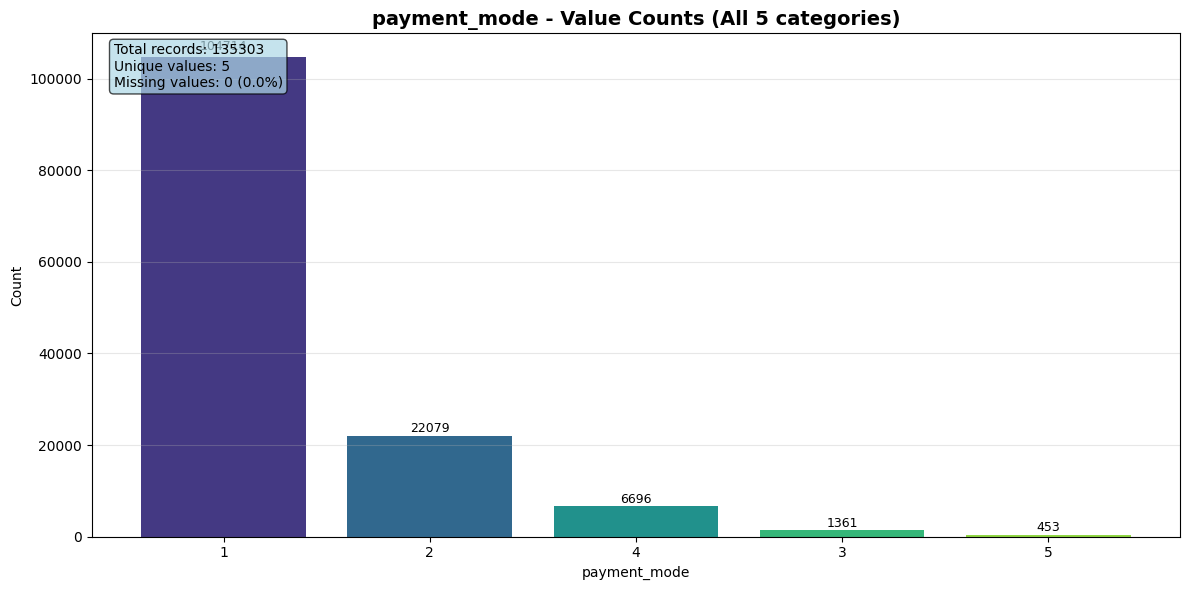


PAYMENT_MODE - Top 10 values:
payment_mode
1    104714
2     22079
4      6696
3      1361
5       453
Name: count, dtype: int64
--------------------------------------------------
Skipping promo_code - too many unique values (1380)
Skipping vendor_discount_amount - too many unique values (78)



PROMO_CODE_DISCOUNT_PERCENTAGE - Top 10 values:
promo_code_discount_percentage
NaN     69423
0.0     65809
25.0       69
10.0        1
20.0        1
Name: count, dtype: int64
--------------------------------------------------


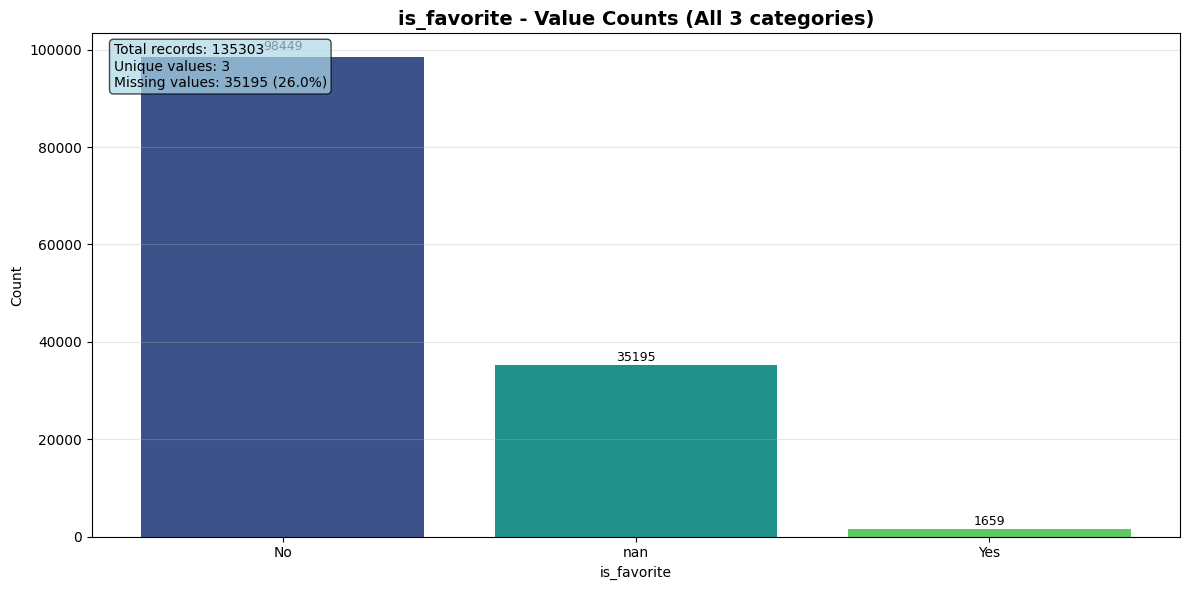


IS_FAVORITE - Top 10 values:
is_favorite
No     98449
NaN    35195
Yes     1659
Name: count, dtype: int64
--------------------------------------------------



IS_RATED - Top 10 values:
is_rated
No     115194
Yes     20109
Name: count, dtype: int64
--------------------------------------------------



VENDOR_RATING - Top 10 values:
vendor_rating
NaN    90083
0.0    25175
5.0    14212
4.0     2748
3.0     1426
1.0     1029
2.0      630
Name: count, dtype: int64
--------------------------------------------------



DRIVER_RATING - Top 10 values:
driver_rating
0    115420
5     15735
4      2142
3       889
1       765
2       352
Name: count, dtype: int64
--------------------------------------------------
Skipping deliverydistance - too many unique values (1513)


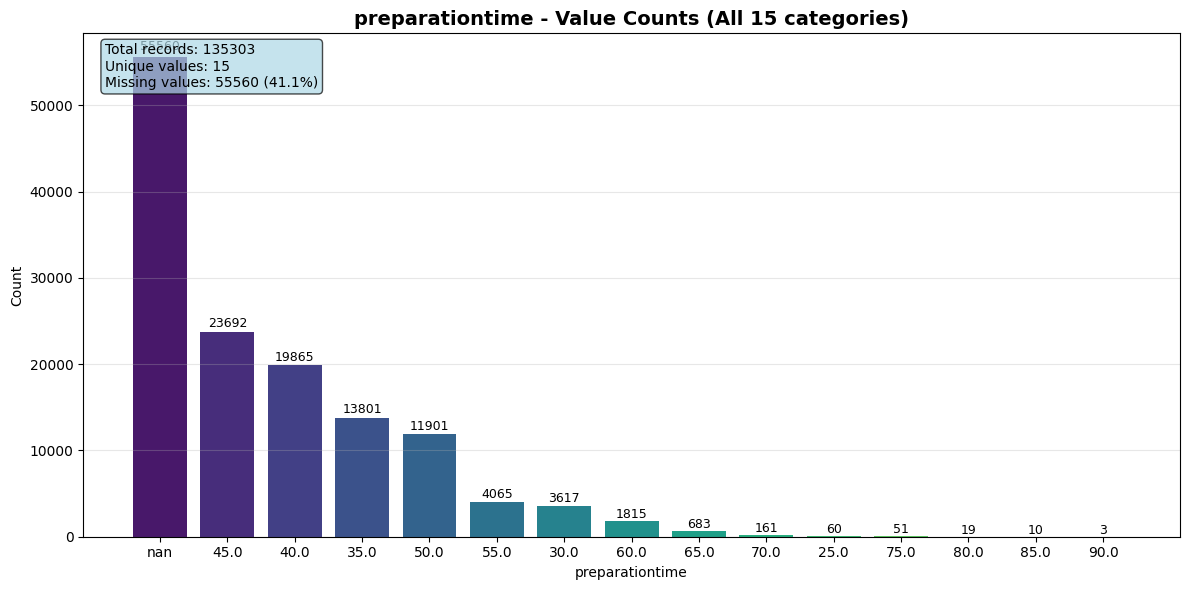


PREPARATIONTIME - Top 10 values:
preparationtime
NaN     55560
45.0    23692
40.0    19865
35.0    13801
50.0    11901
55.0     4065
30.0     3617
60.0     1815
65.0      683
70.0      161
Name: count, dtype: int64
--------------------------------------------------
Skipping delivery_time - too many unique values (4824)
Skipping order_accepted_time - too many unique values (56856)
Skipping driver_accepted_time - too many unique values (26126)
Skipping ready_for_pickup_time - too many unique values (52752)
Skipping picked_up_time - too many unique values (51442)
Skipping delivered_time - too many unique values (54367)
Skipping delivery_date - too many unique values (113)
Skipping vendor_id - too many unique values (100)
Skipping created_at - too many unique values (88323)


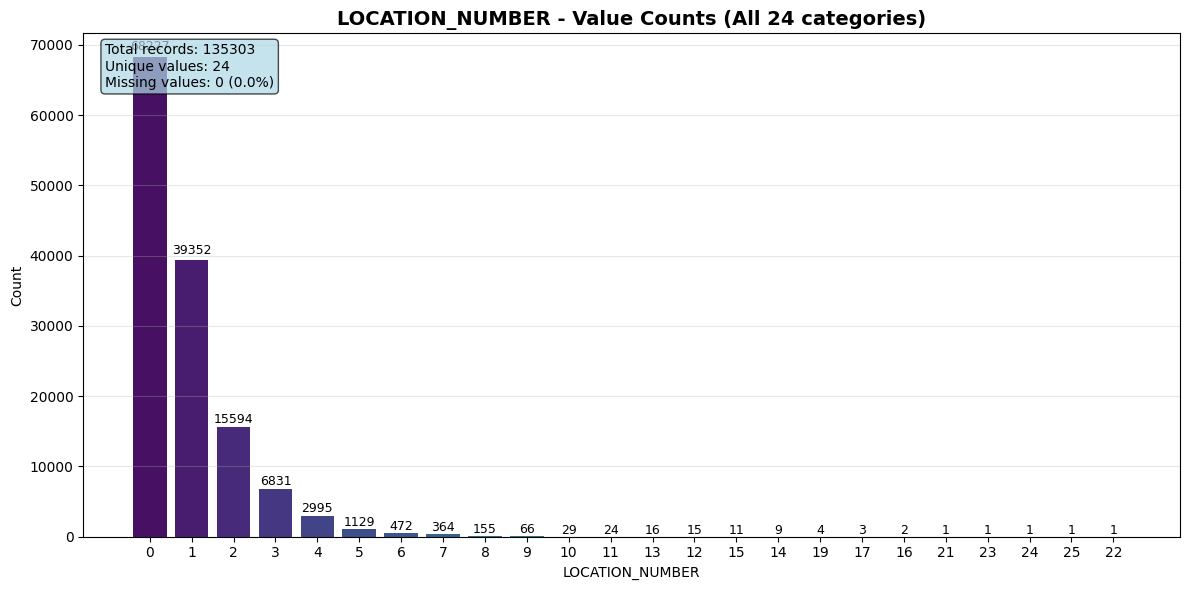


LOCATION_NUMBER - Top 10 values:
LOCATION_NUMBER
0    68227
1    39352
2    15594
3     6831
4     2995
5     1129
6      472
7      364
8      155
9       66
Name: count, dtype: int64
--------------------------------------------------



LOCATION_TYPE - Top 10 values:
LOCATION_TYPE
Home     51484
NaN      48893
Work     18257
Other    16669
Name: count, dtype: int64
--------------------------------------------------
Skipping CID X LOC_NUM X VENDOR - too many unique values (80142)


In [ ]:
# Individual plots for each column with more details
def plot_individual_column_analysis(df, dataset_name="Dataset", max_categories=25):
    """
    Create individual detailed bar plots for each column
    """
    for col in df.columns:
        # Get value counts
        value_counts = df[col].value_counts(dropna=False)
        missing_count = df[col].isnull().sum()
        
        # Skip if too many unique values (likely continuous or ID columns)
        if len(value_counts) > 50:
            print(f"Skipping {col} - too many unique values ({len(value_counts)})")
            continue
        
        # Limit categories for plotting
        if len(value_counts) > max_categories:
            plot_data = value_counts.head(max_categories)
            title_suffix = f" (Top {max_categories} of {len(value_counts)})"
        else:
            plot_data = value_counts
            title_suffix = f" (All {len(value_counts)} categories)"
        
        # Create figure
        plt.figure(figsize=(12, 6))
        
        # Create bar plot
        bars = plt.bar(range(len(plot_data)), plot_data.values, 
                      color=sns.color_palette("viridis", len(plot_data)))
        
        # Customize plot
        plt.title(f'{col} - Value Counts{title_suffix}', fontsize=14, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel('Count')
        
        # Set x-axis labels with rotation if needed
        plt.xticks(range(len(plot_data)), plot_data.index, 
                  rotation=45 if len(str(plot_data.index[0])) > 5 else 0, 
                  ha='right' if len(str(plot_data.index[0])) > 5 else 'center')
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)
        
        # Add statistics text box
        stats_text = f'Total records: {len(df)}\n'
        stats_text += f'Unique values: {len(value_counts)}\n'
        stats_text += f'Missing values: {missing_count} ({missing_count/len(df)*100:.1f}%)'
        
        plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
        
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Print top 10 values for reference
        print(f"\n{col.upper()} - Top 10 values:")
        print(value_counts.head(10))
        print("-" * 50)

# Apply to orders dataset
plot_individual_column_analysis(orders, "Orders Dataset")

# Analysis on Vendors Dataset

In [ ]:
vendors.head(5)

id  authentication_id  latitude  longitude vendor_category_en  \
0   4             118597 -0.588596   0.754434        Restaurants   
1  13             118608 -0.471654   0.744470        Restaurants   
2  20             118616 -0.407527   0.643681        Restaurants   
3  23             118619 -0.585385   0.753811        Restaurants   
4  28             118624  0.480602   0.552850        Restaurants   

   vendor_category_id  delivery_charge  serving_distance  is_open  \
0                   2              0.0                 6        1   
1                   2              0.7                 5        1   
2                   2              0.0                 8        1   
3                   2              0.0                 5        1   
4                   2              0.7                15        1   

       OpeningTime  ... open_close_flags                 vendor_tag  \
0  11:00AM-11:30PM  ...                1  2,4,5,8,91,22,12,24,16,23   
1  08:30AM-10:30PM  ...                1  4,41,51,34,27,15,24,16,28   
2  08:00AM-10:45PM  ...                1                  4,8,91,10   
3  10:59AM-10:30PM  ...                1                  5,8,30,24   
4  11:00AM-11:45PM  ...                1                          5   

                                     vendor_tag_name one_click_vendor  \
0  Arabic,Breakfast,Burgers,Desserts,Free Deliver...                Y   
1  Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...                Y   
2            Breakfast,Desserts,Free Delivery,Indian                Y   
3                      Burgers,Desserts,Fries,Salads                Y   
4                                            Burgers                Y   

   country_id  city_id       created_at      updated_at device_type  \
0           1        1  1/30/2023 14:42  4/7/2025 15:12           3   
1           1        1   5/3/2023 12:32  4/5/2025 20:46           3   
2           1        1   5/4/2023 22:28  4/7/2025 16:35           3   
3           1        1   5/6/2023 19:20   4/2/2025 0:56           3   
4           1        1  5/17/2023 22:12  4/5/2025 15:57           3   

   display_orders  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 59 columns]

In [ ]:
vendors.shape

(100, 59)

In [ ]:
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   authentication_id     100 non-null    int64  
 2   latitude              100 non-null    float64
 3   longitude             100 non-null    float64
 4   vendor_category_en    100 non-null    object 
 5   vendor_category_id    100 non-null    int64  
 6   delivery_charge       100 non-null    float64
 7   serving_distance      100 non-null    int64  
 8   is_open               100 non-null    int64  
 9   OpeningTime           91 non-null     object 
 10  OpeningTime2          91 non-null     object 
 11  prepration_time       100 non-null    int64  
 12  commission            85 non-null     float64
 13  is_haked_delivering   100 non-null    object 
 14  discount_percentage   100 non-null    int64  
 15  status                10

In [ ]:
vendors.describe()

id  authentication_id    latitude   longitude  \
count  100.000000         100.000000  100.000000  100.000000   
mean   288.840000      120050.760000    1.875505    0.803682   
std    242.299994        3509.069064   20.600857    4.397859   
min      4.000000      118597.000000   -1.787413   -1.449556   
25%    105.750000      118702.750000   -0.809124    0.081618   
50%    202.000000      118801.000000   -0.493421    0.527123   
75%    387.250000      118990.250000    0.015915    0.644764   
max    907.000000      132953.000000  205.242327   44.210807   

       vendor_category_id  delivery_charge  serving_distance    is_open  \
count          100.000000       100.000000        100.000000  100.00000   
mean             2.110000         0.413000         11.750000    0.85000   
std              0.314466         0.346018          4.108073    0.35887   
min              2.000000         0.000000          2.000000    0.00000   
25%              2.000000         0.000000          8.000000    1.00000   
50%              2.000000         0.700000         15.000000    1.00000   
75%              2.000000         0.700000         15.000000    1.00000   
max              3.000000         0.700000         15.000000    1.00000   

       prepration_time  commission  discount_percentage     status  \
count        100.00000        85.0           100.000000  100.00000   
mean          14.03000         0.0             1.100000    0.85000   
std            4.31688         0.0             6.299751    0.35887   
min            5.00000         0.0             0.000000    0.00000   
25%           10.00000         0.0             0.000000    1.00000   
50%           15.00000         0.0             0.000000    1.00000   
75%           15.00000         0.0             0.000000    1.00000   
max           45.00000         0.0            50.000000    1.00000   

         verified       rank  vendor_rating  open_close_flags  country_id  \
count  100.000000  100.00000     100.000000             100.0       100.0   
mean     0.880000    9.90000       4.350000               1.0         1.0   
std      0.326599    3.14466       0.248836               0.0         0.0   
min      0.000000    1.00000       3.200000               1.0         1.0   
25%      1.000000   11.00000       4.200000               1.0         1.0   
50%      1.000000   11.00000       4.400000               1.0         1.0   
75%      1.000000   11.00000       4.500000               1.0         1.0   
max      1.000000   11.00000       4.800000               1.0         1.0   

       city_id  device_type  display_orders  
count    100.0       100.00           100.0  
mean       1.0         2.98             1.0  
std        0.0         0.20             0.0  
min        1.0         1.00             1.0  
25%        1.0         3.00             1.0  
50%        1.0         3.00             1.0  
75%        1.0         3.00             1.0  
max        1.0         3.00             1.0

Skipping id - too many unique values (100)
Skipping authentication_id - too many unique values (100)
Skipping latitude - too many unique values (99)
Skipping longitude - too many unique values (99)


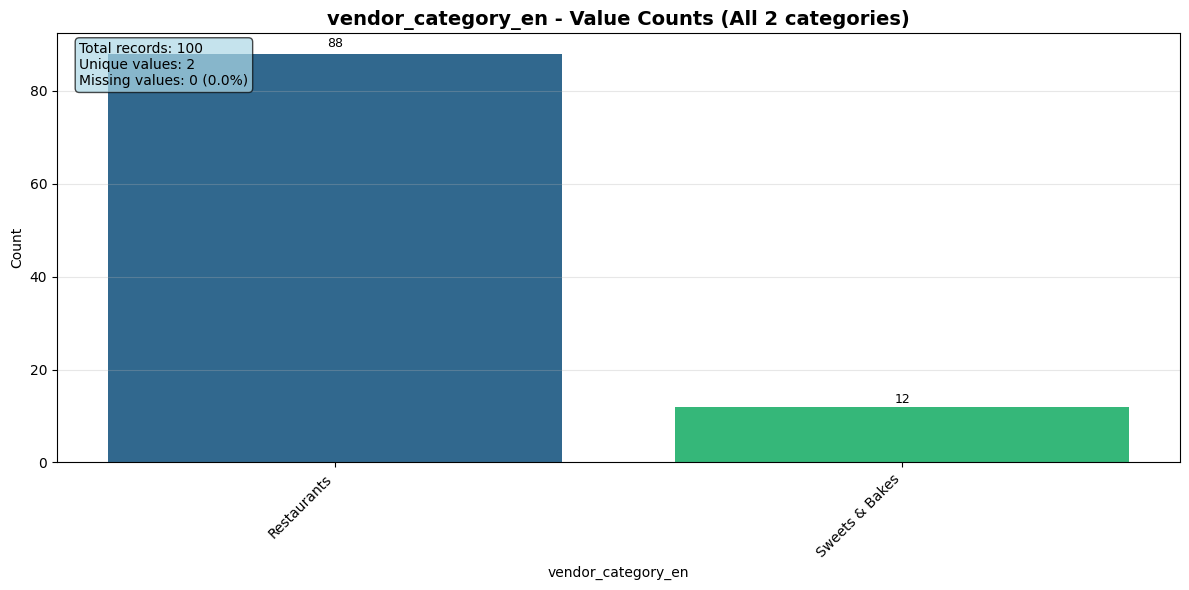


VENDOR_CATEGORY_EN - Top 10 values:
vendor_category_en
Restaurants       88
Sweets & Bakes    12
Name: count, dtype: int64
--------------------------------------------------


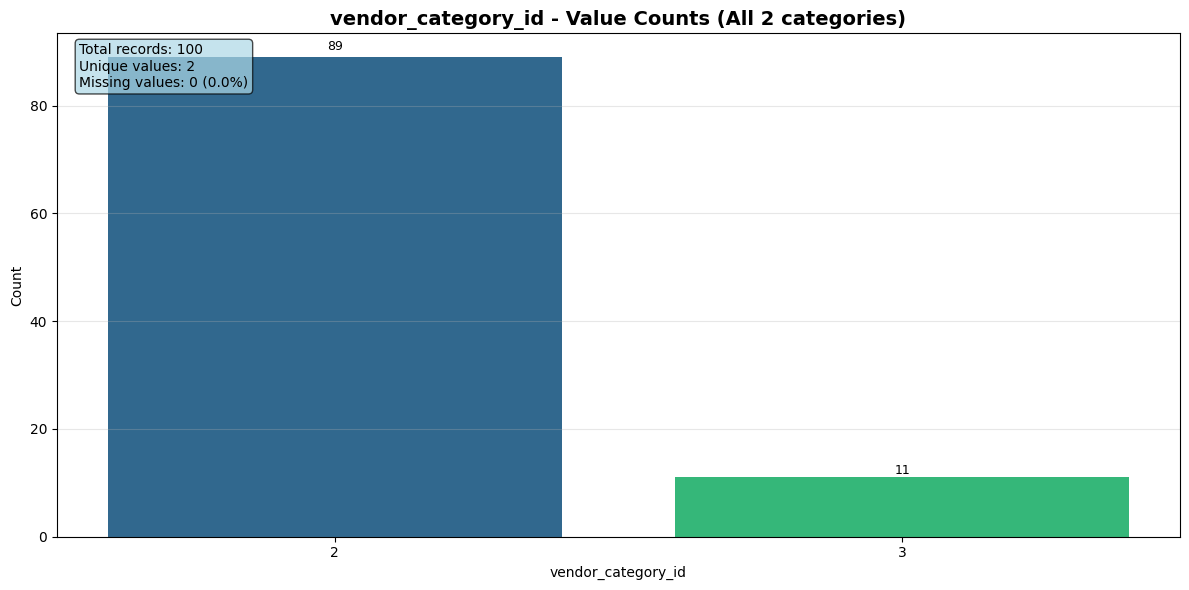


VENDOR_CATEGORY_ID - Top 10 values:
vendor_category_id
2    89
3    11
Name: count, dtype: int64
--------------------------------------------------


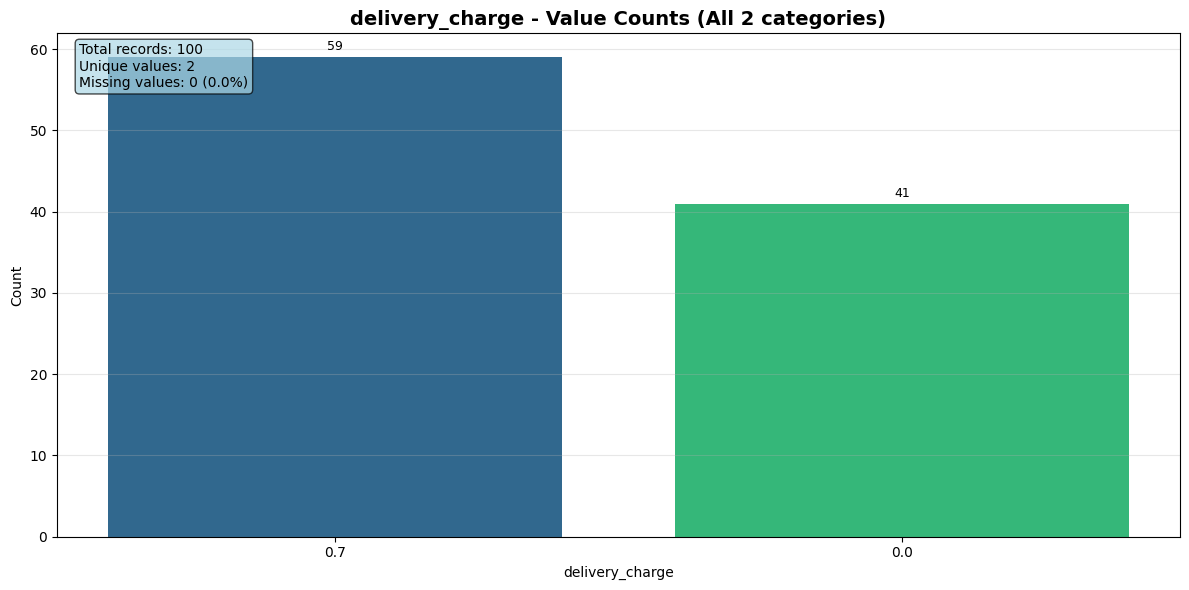


DELIVERY_CHARGE - Top 10 values:
delivery_charge
0.7    59
0.0    41
Name: count, dtype: int64
--------------------------------------------------


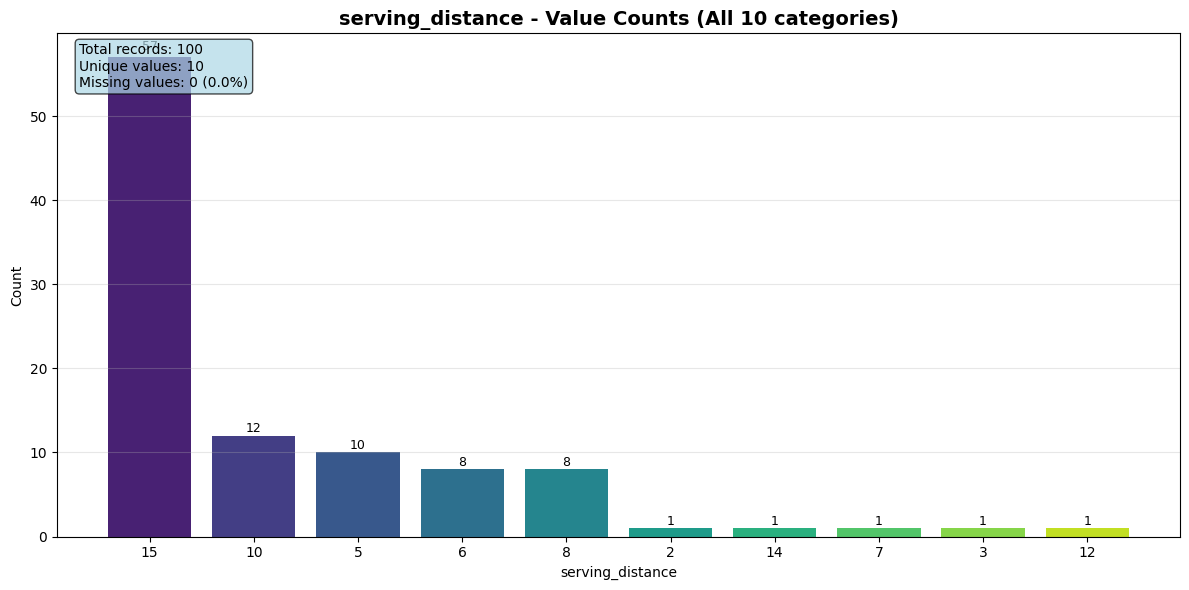


SERVING_DISTANCE - Top 10 values:
serving_distance
15    57
10    12
5     10
6      8
8      8
2      1
14     1
7      1
3      1
12     1
Name: count, dtype: int64
--------------------------------------------------


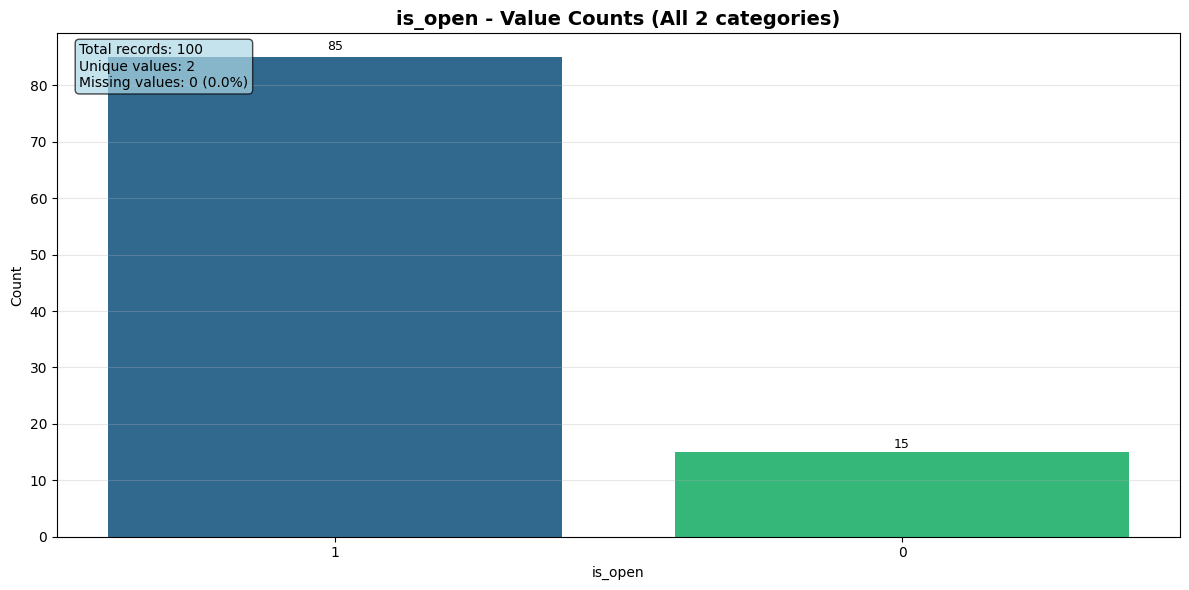


IS_OPEN - Top 10 values:
is_open
1    85
0    15
Name: count, dtype: int64
--------------------------------------------------
Skipping OpeningTime - too many unique values (69)


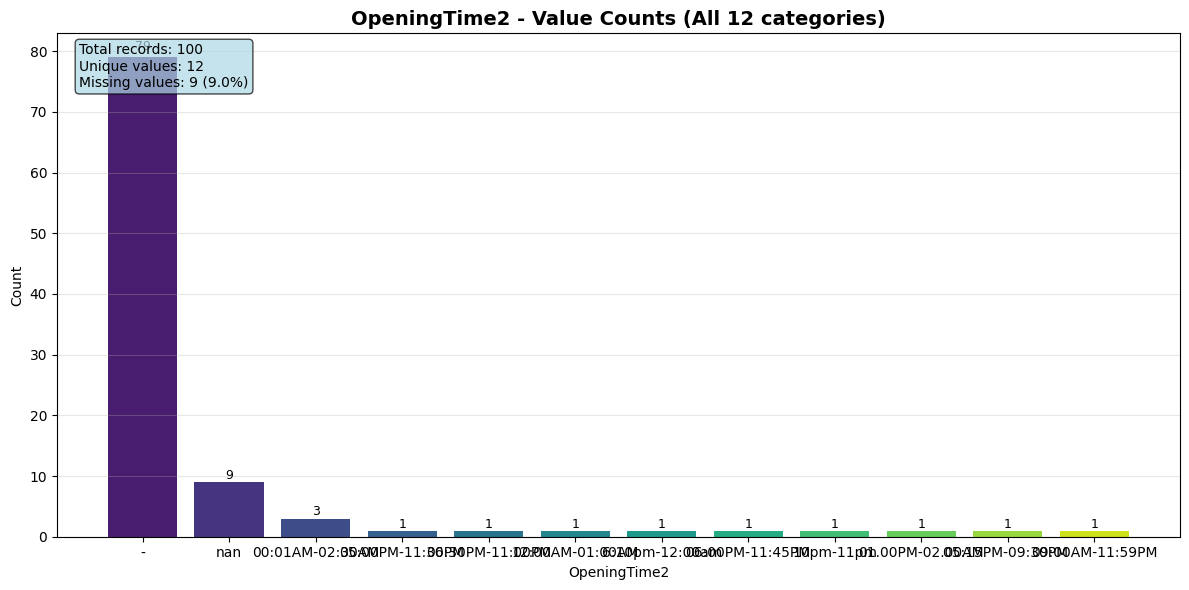


OPENINGTIME2 - Top 10 values:
OpeningTime2
-                  79
NaN                 9
00:01AM-02:30AM     3
05:00PM-11:30PM     1
06:30PM-11:00PM     1
12:00AM-01:00AM     1
6:10pm-12:00am      1
06:00PM-11:45PM     1
10pm-11pm           1
01.00PM-02.00AM     1
Name: count, dtype: int64
--------------------------------------------------


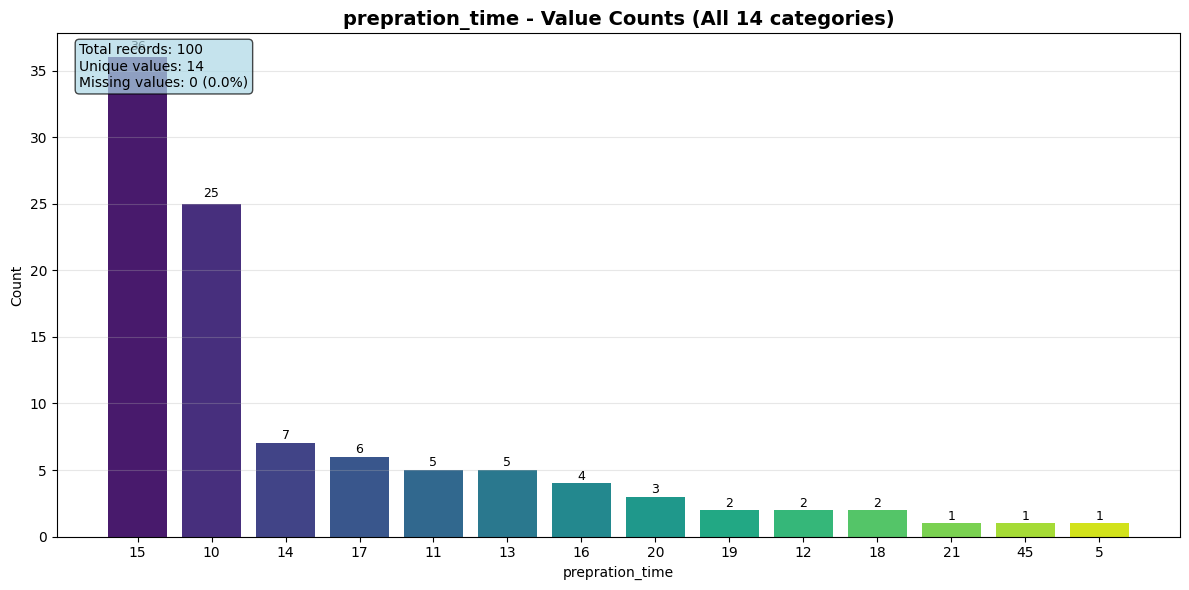


PREPRATION_TIME - Top 10 values:
prepration_time
15    36
10    25
14     7
17     6
11     5
13     5
16     4
20     3
19     2
12     2
Name: count, dtype: int64
--------------------------------------------------


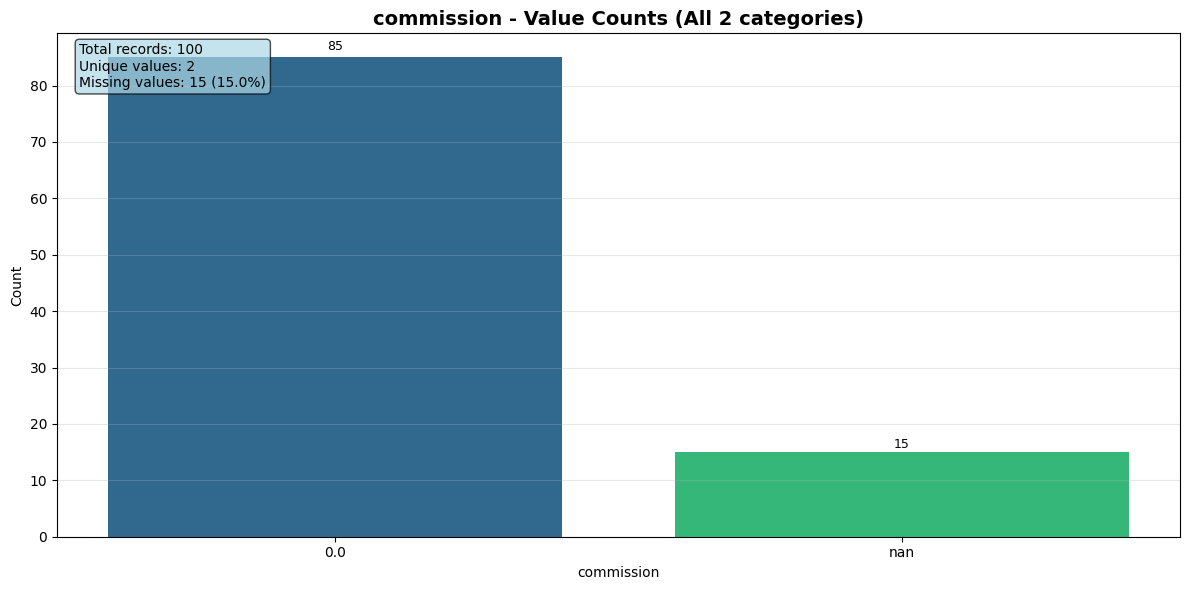


COMMISSION - Top 10 values:
commission
0.0    85
NaN    15
Name: count, dtype: int64
--------------------------------------------------


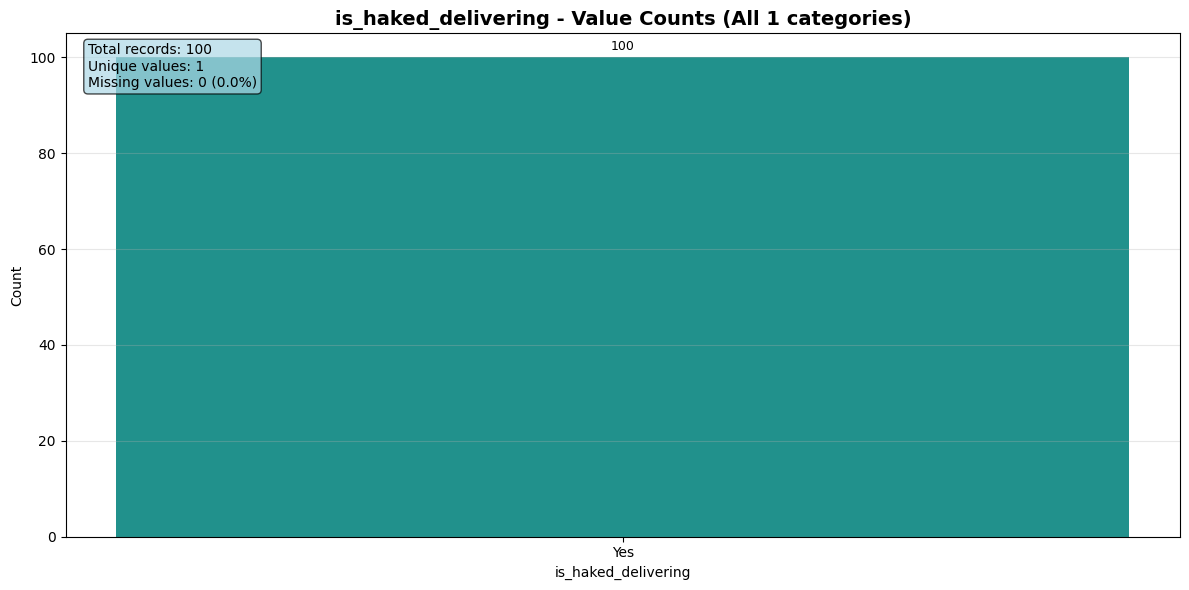


IS_HAKED_DELIVERING - Top 10 values:
is_haked_delivering
Yes    100
Name: count, dtype: int64
--------------------------------------------------


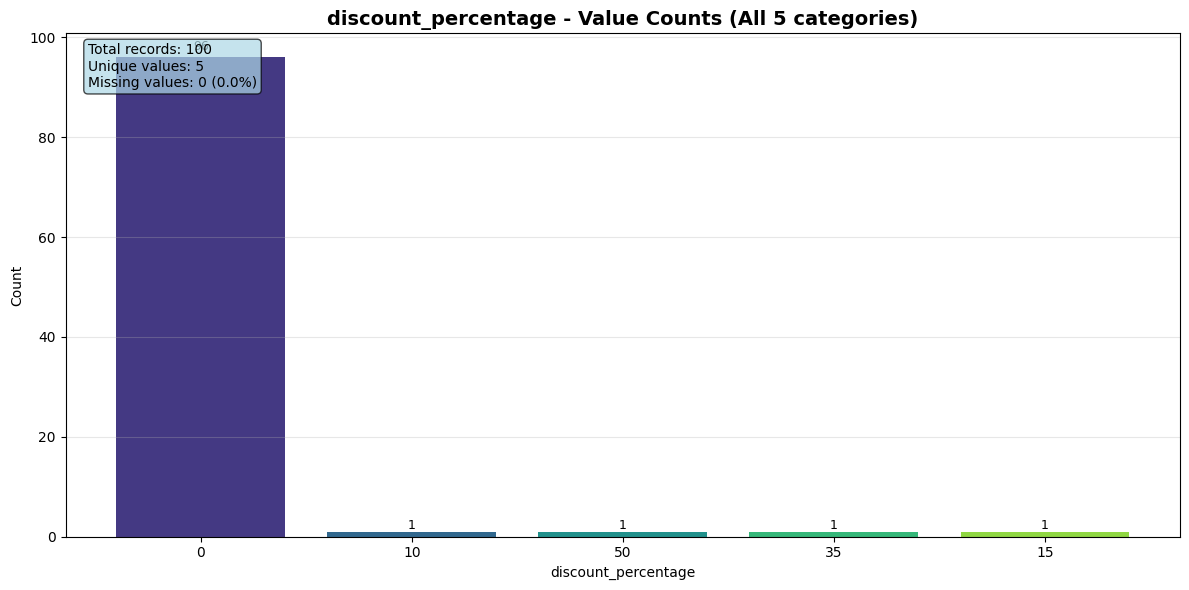


DISCOUNT_PERCENTAGE - Top 10 values:
discount_percentage
0     96
10     1
50     1
35     1
15     1
Name: count, dtype: int64
--------------------------------------------------


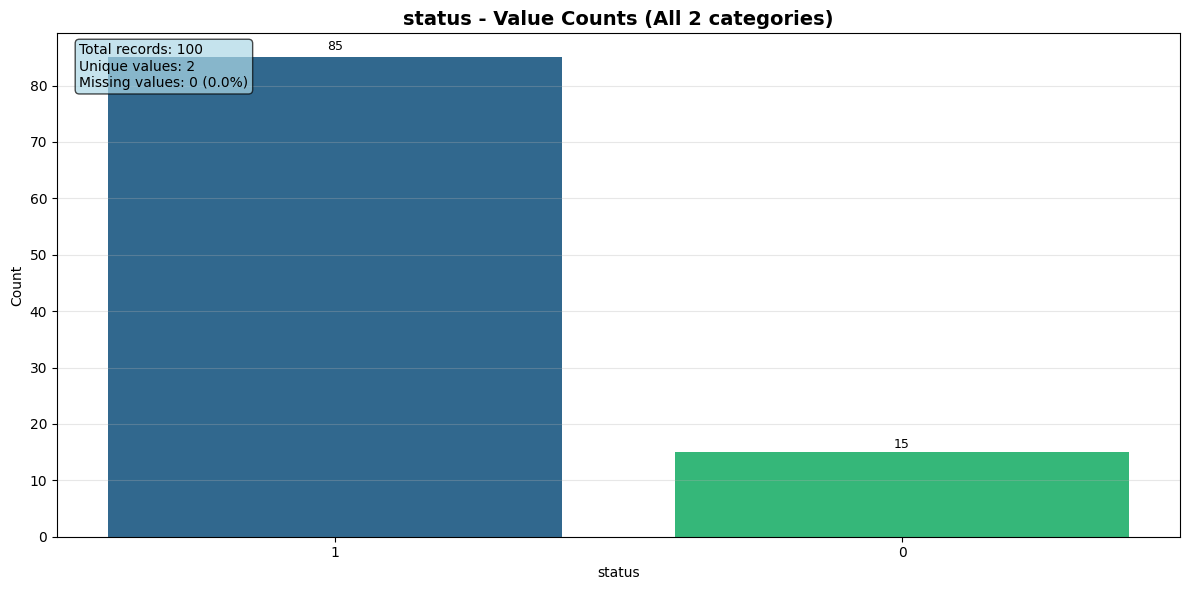


STATUS - Top 10 values:
status
1    85
0    15
Name: count, dtype: int64
--------------------------------------------------


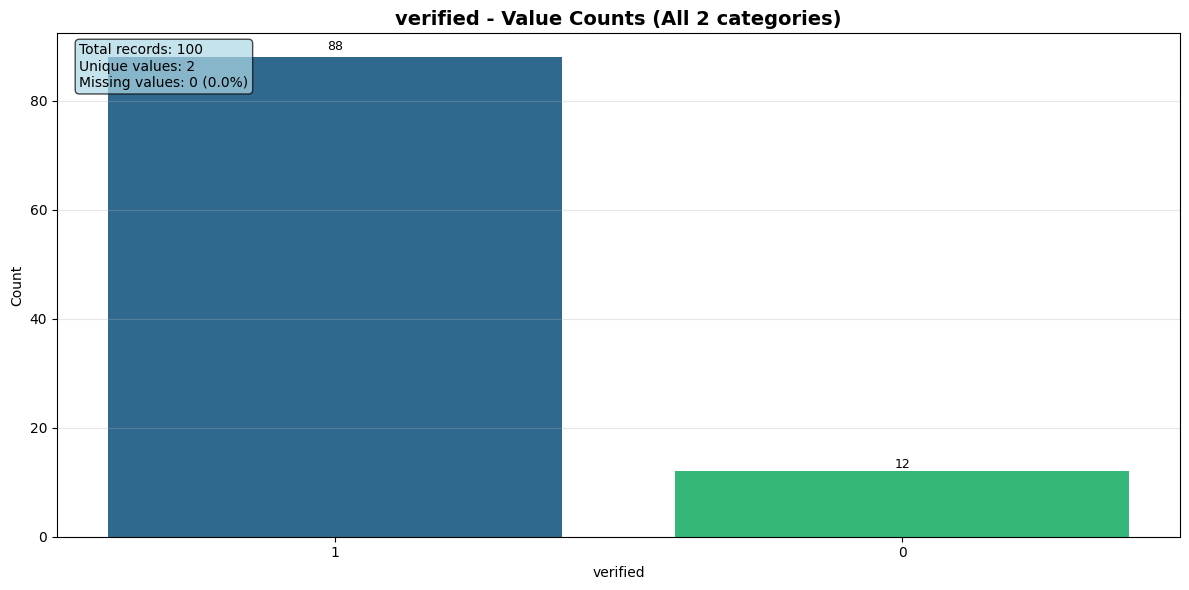


VERIFIED - Top 10 values:
verified
1    88
0    12
Name: count, dtype: int64
--------------------------------------------------


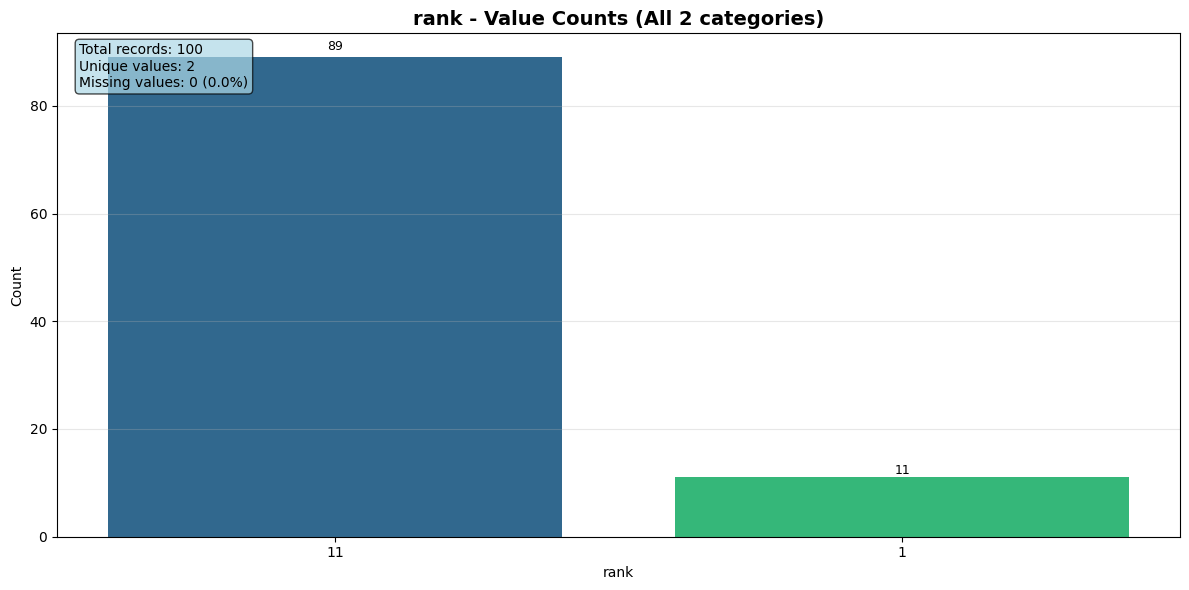


RANK - Top 10 values:
rank
11    89
1     11
Name: count, dtype: int64
--------------------------------------------------


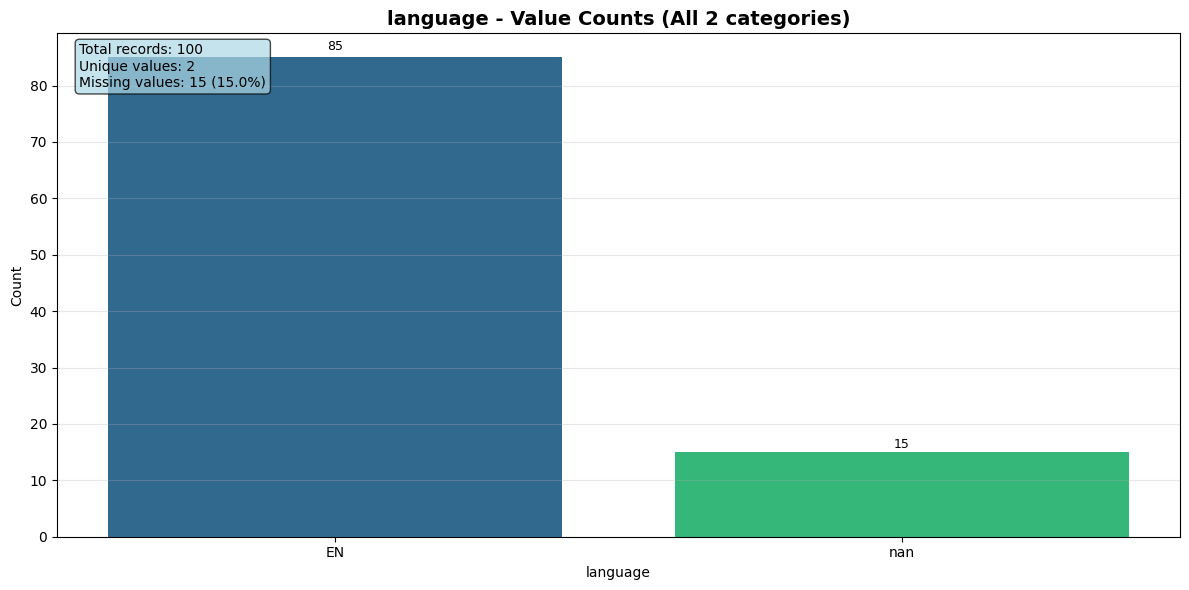


LANGUAGE - Top 10 values:
language
EN     85
NaN    15
Name: count, dtype: int64
--------------------------------------------------


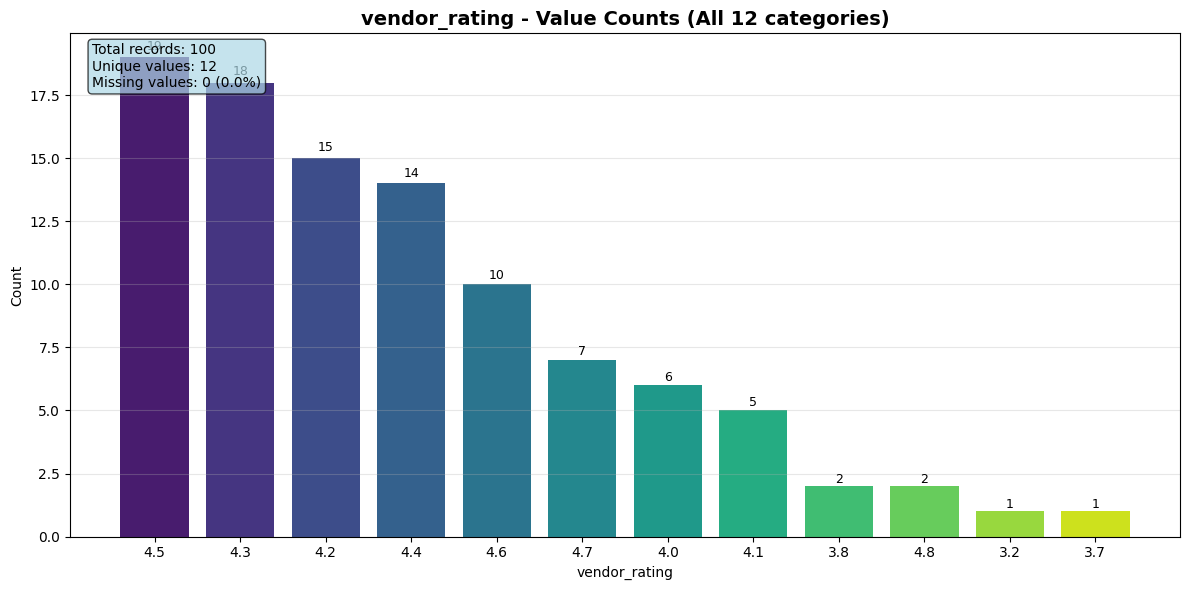


VENDOR_RATING - Top 10 values:
vendor_rating
4.5    19
4.3    18
4.2    15
4.4    14
4.6    10
4.7     7
4.0     6
4.1     5
3.8     2
4.8     2
Name: count, dtype: int64
--------------------------------------------------


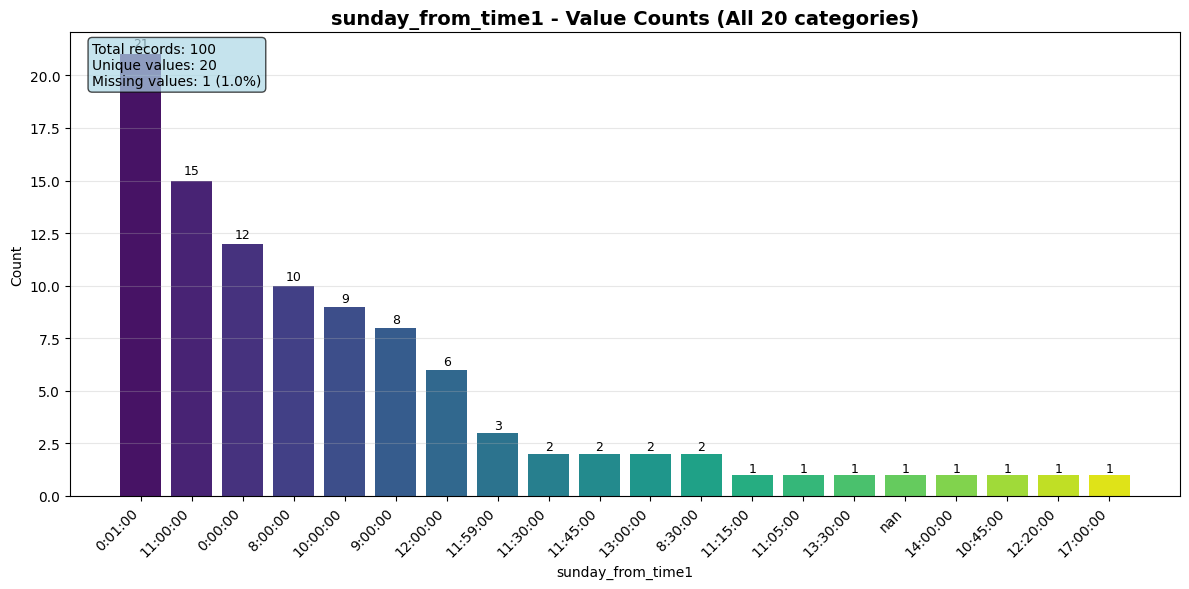


SUNDAY_FROM_TIME1 - Top 10 values:
sunday_from_time1
0:01:00     21
11:00:00    15
0:00:00     12
8:00:00     10
10:00:00     9
9:00:00      8
12:00:00     6
11:59:00     3
11:30:00     2
11:45:00     2
Name: count, dtype: int64
--------------------------------------------------


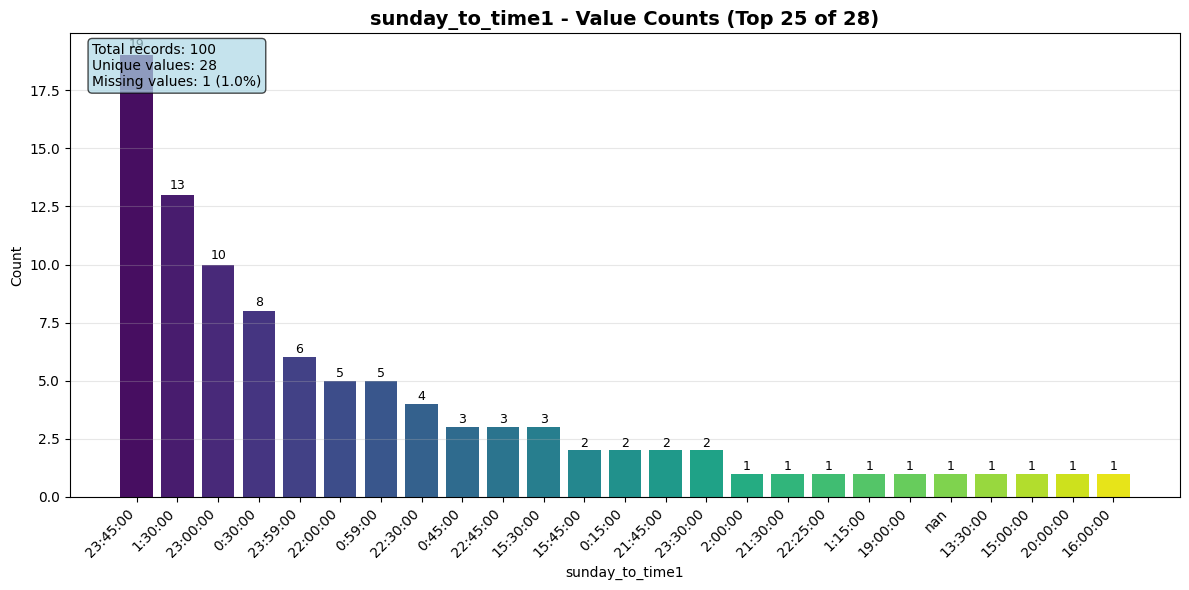


SUNDAY_TO_TIME1 - Top 10 values:
sunday_to_time1
23:45:00    19
1:30:00     13
23:00:00    10
0:30:00      8
23:59:00     6
22:00:00     5
0:59:00      5
22:30:00     4
0:45:00      3
22:45:00     3
Name: count, dtype: int64
--------------------------------------------------


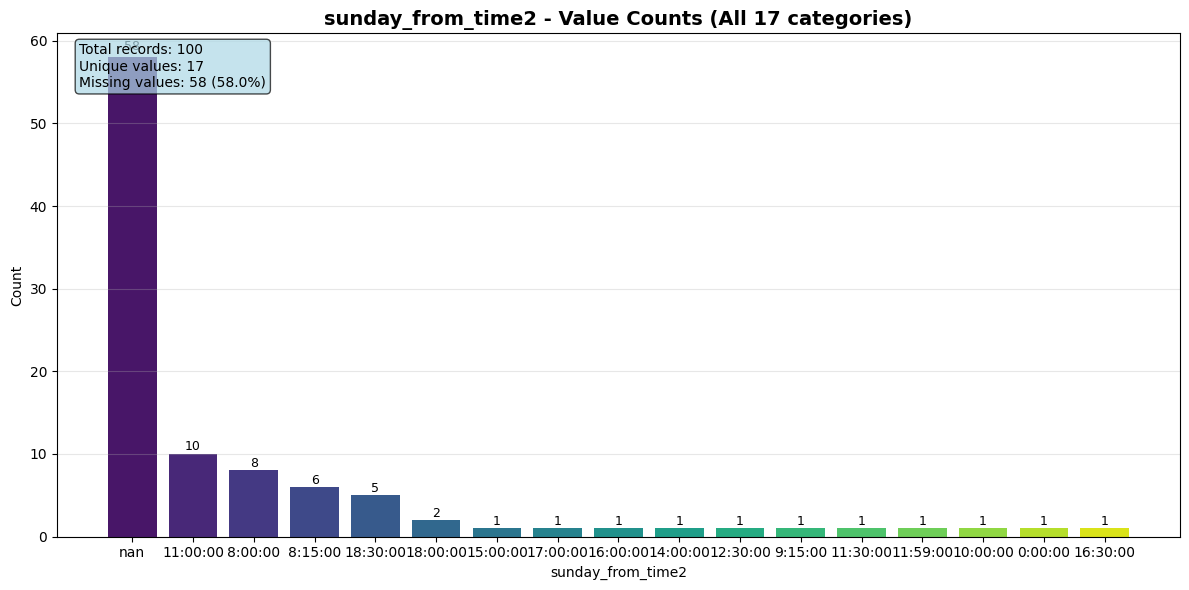


SUNDAY_FROM_TIME2 - Top 10 values:
sunday_from_time2
NaN         58
11:00:00    10
8:00:00      8
8:15:00      6
18:30:00     5
18:00:00     2
15:00:00     1
17:00:00     1
16:00:00     1
14:00:00     1
Name: count, dtype: int64
--------------------------------------------------


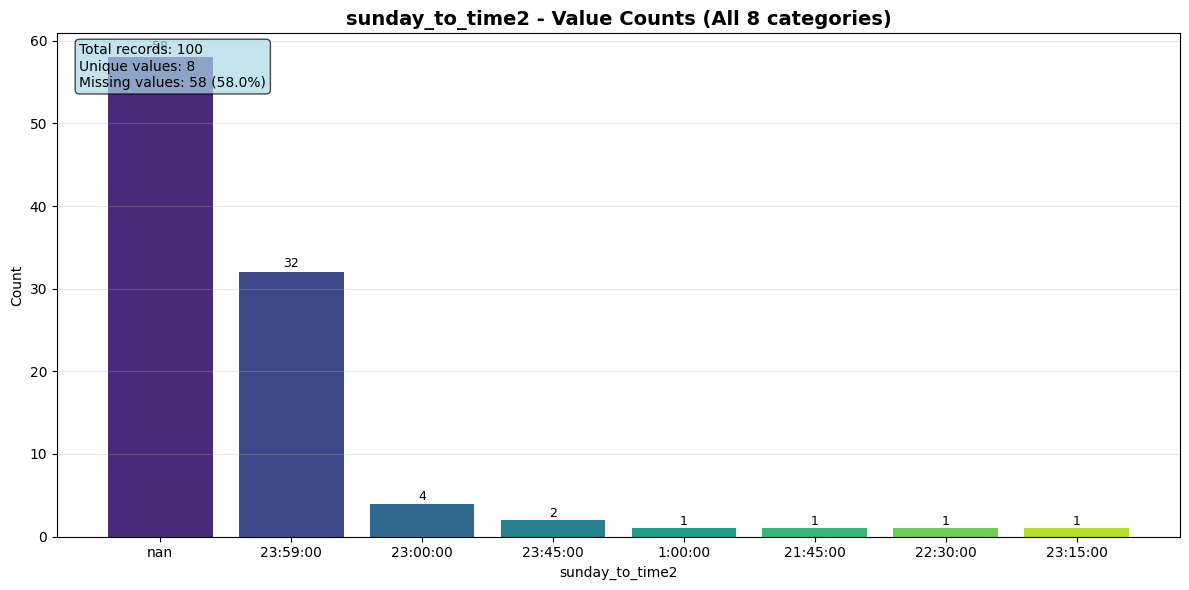


SUNDAY_TO_TIME2 - Top 10 values:
sunday_to_time2
NaN         58
23:59:00    32
23:00:00     4
23:45:00     2
1:00:00      1
21:45:00     1
22:30:00     1
23:15:00     1
Name: count, dtype: int64
--------------------------------------------------


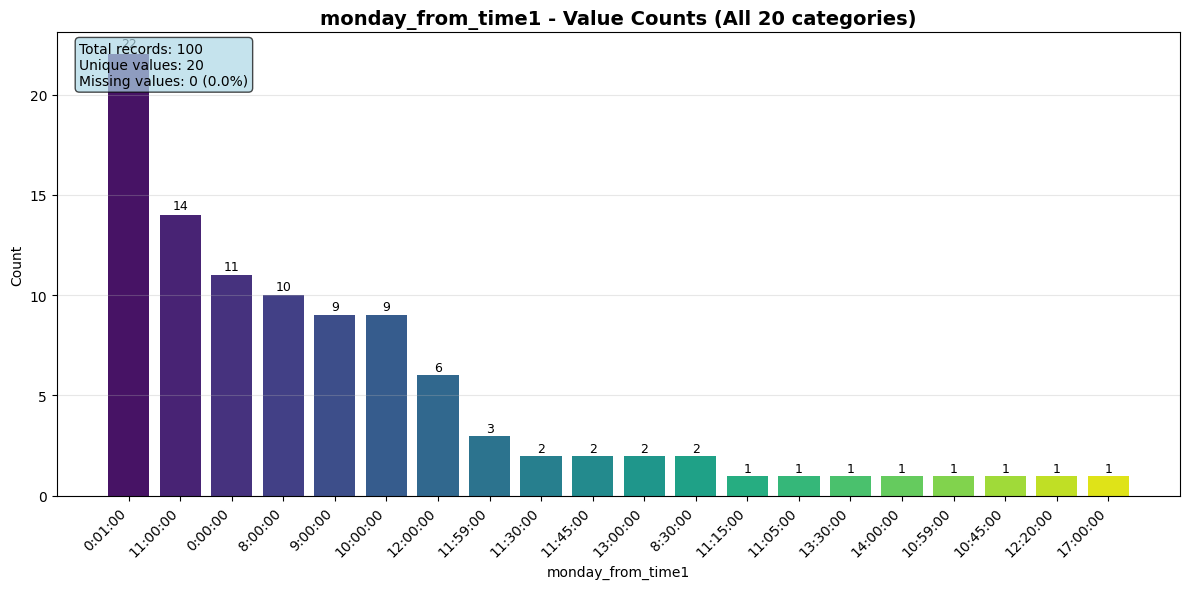


MONDAY_FROM_TIME1 - Top 10 values:
monday_from_time1
0:01:00     22
11:00:00    14
0:00:00     11
8:00:00     10
9:00:00      9
10:00:00     9
12:00:00     6
11:59:00     3
11:30:00     2
11:45:00     2
Name: count, dtype: int64
--------------------------------------------------


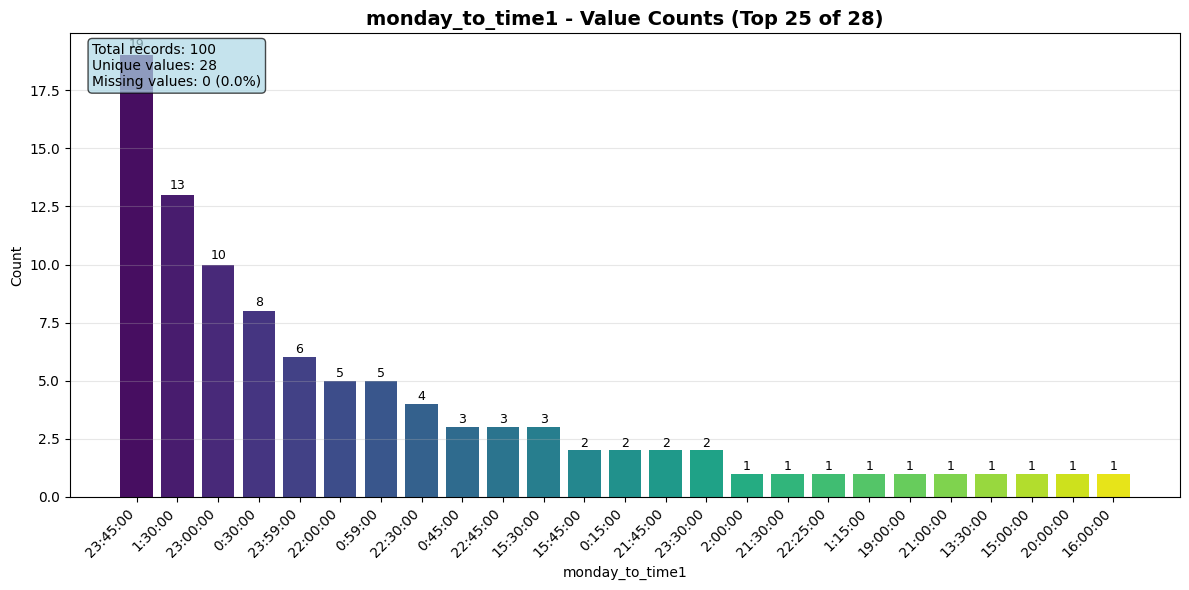


MONDAY_TO_TIME1 - Top 10 values:
monday_to_time1
23:45:00    19
1:30:00     13
23:00:00    10
0:30:00      8
23:59:00     6
22:00:00     5
0:59:00      5
22:30:00     4
0:45:00      3
22:45:00     3
Name: count, dtype: int64
--------------------------------------------------


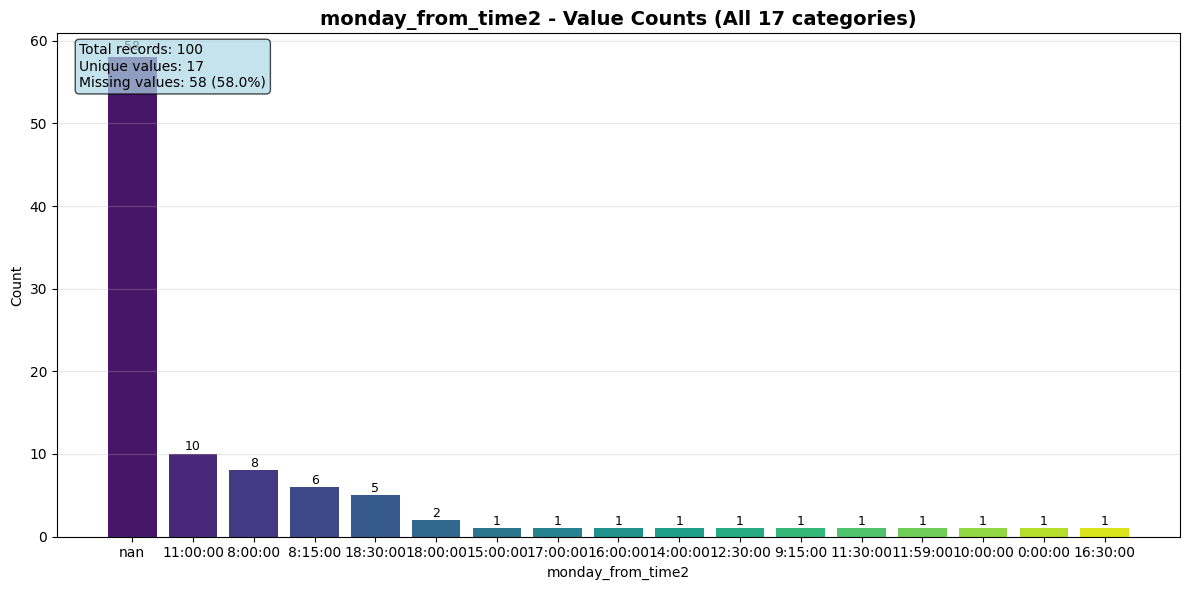


MONDAY_FROM_TIME2 - Top 10 values:
monday_from_time2
NaN         58
11:00:00    10
8:00:00      8
8:15:00      6
18:30:00     5
18:00:00     2
15:00:00     1
17:00:00     1
16:00:00     1
14:00:00     1
Name: count, dtype: int64
--------------------------------------------------


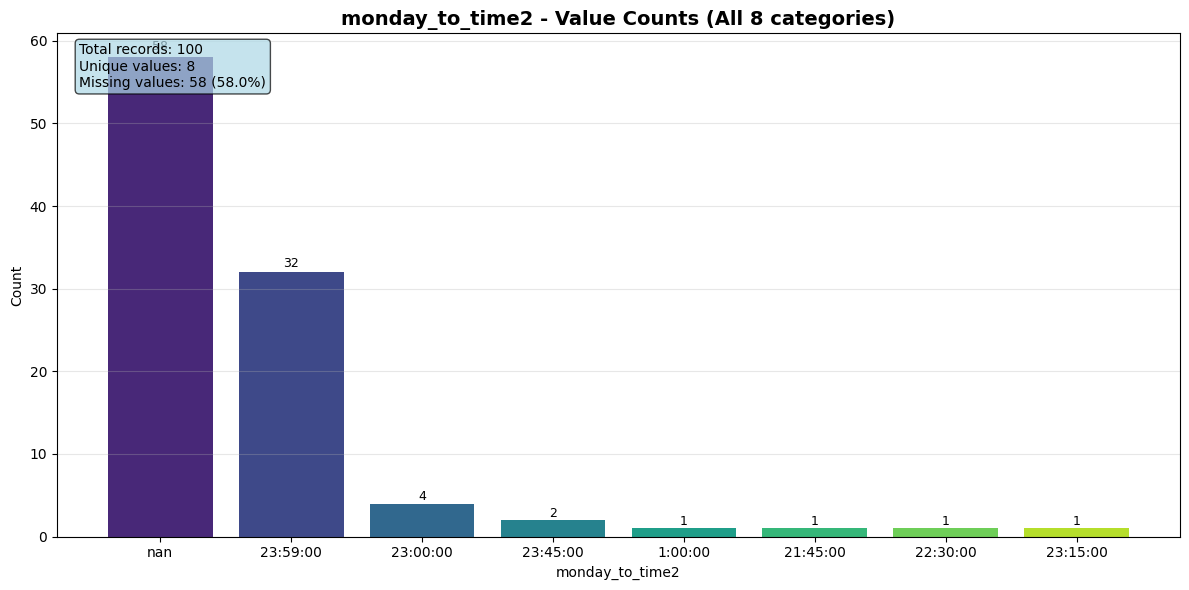


MONDAY_TO_TIME2 - Top 10 values:
monday_to_time2
NaN         58
23:59:00    32
23:00:00     4
23:45:00     2
1:00:00      1
21:45:00     1
22:30:00     1
23:15:00     1
Name: count, dtype: int64
--------------------------------------------------


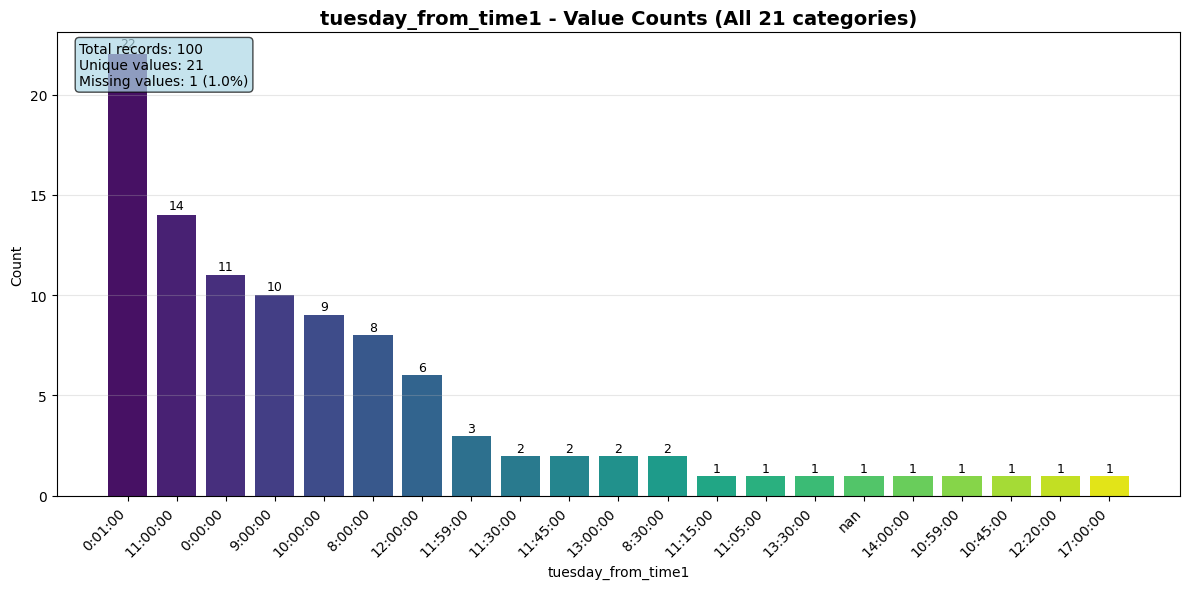


TUESDAY_FROM_TIME1 - Top 10 values:
tuesday_from_time1
0:01:00     22
11:00:00    14
0:00:00     11
9:00:00     10
10:00:00     9
8:00:00      8
12:00:00     6
11:59:00     3
11:30:00     2
11:45:00     2
Name: count, dtype: int64
--------------------------------------------------


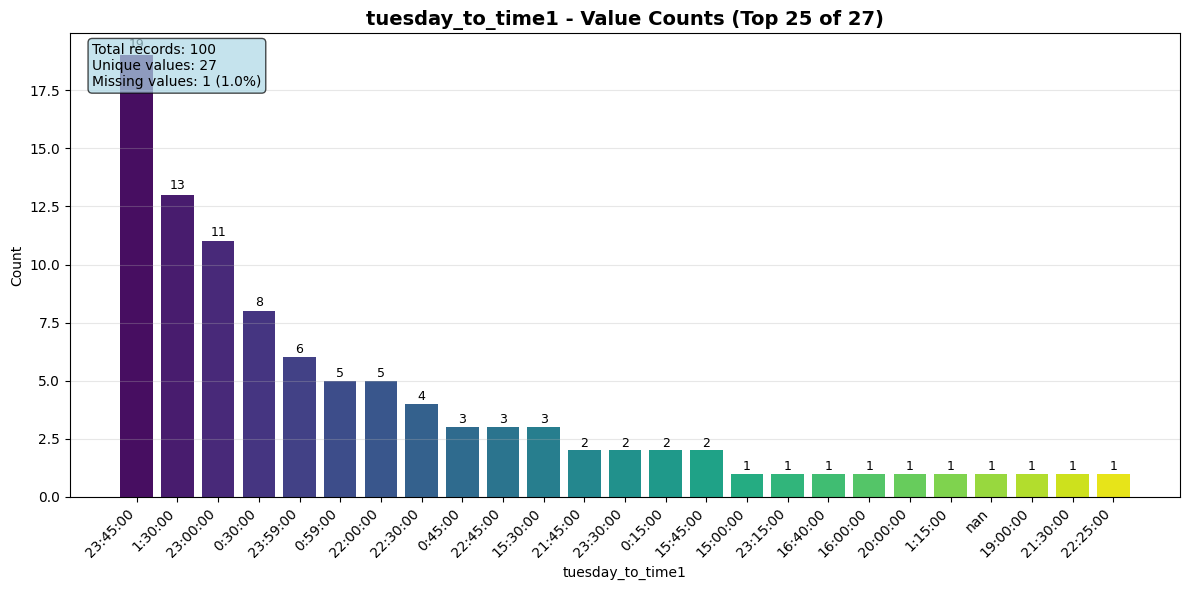


TUESDAY_TO_TIME1 - Top 10 values:
tuesday_to_time1
23:45:00    19
1:30:00     13
23:00:00    11
0:30:00      8
23:59:00     6
0:59:00      5
22:00:00     5
22:30:00     4
0:45:00      3
22:45:00     3
Name: count, dtype: int64
--------------------------------------------------


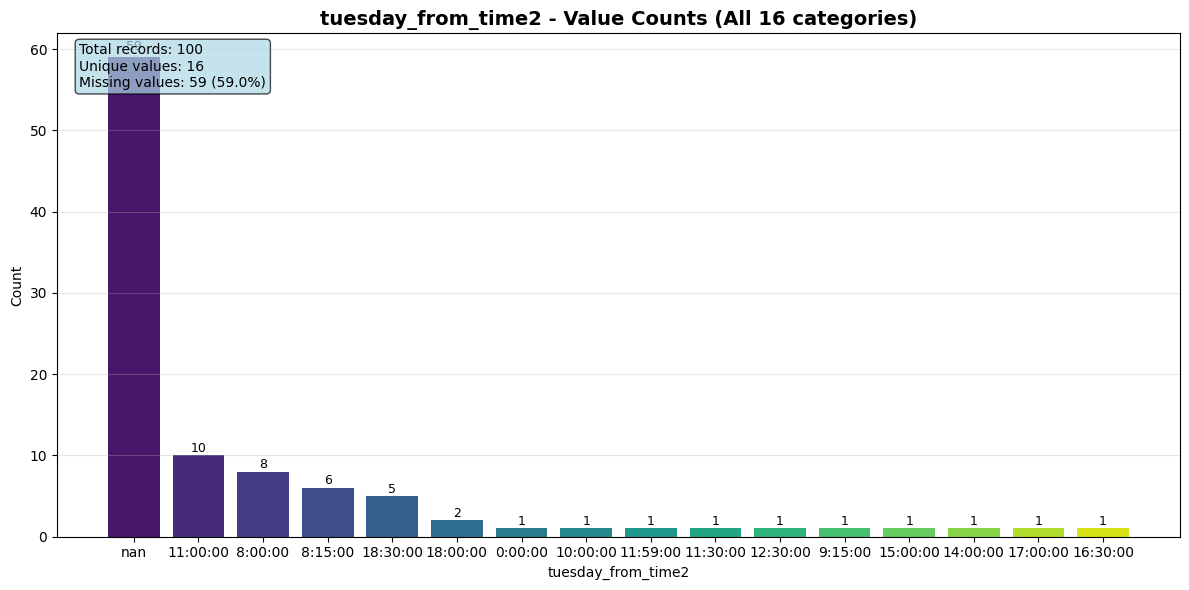


TUESDAY_FROM_TIME2 - Top 10 values:
tuesday_from_time2
NaN         59
11:00:00    10
8:00:00      8
8:15:00      6
18:30:00     5
18:00:00     2
0:00:00      1
10:00:00     1
11:59:00     1
11:30:00     1
Name: count, dtype: int64
--------------------------------------------------


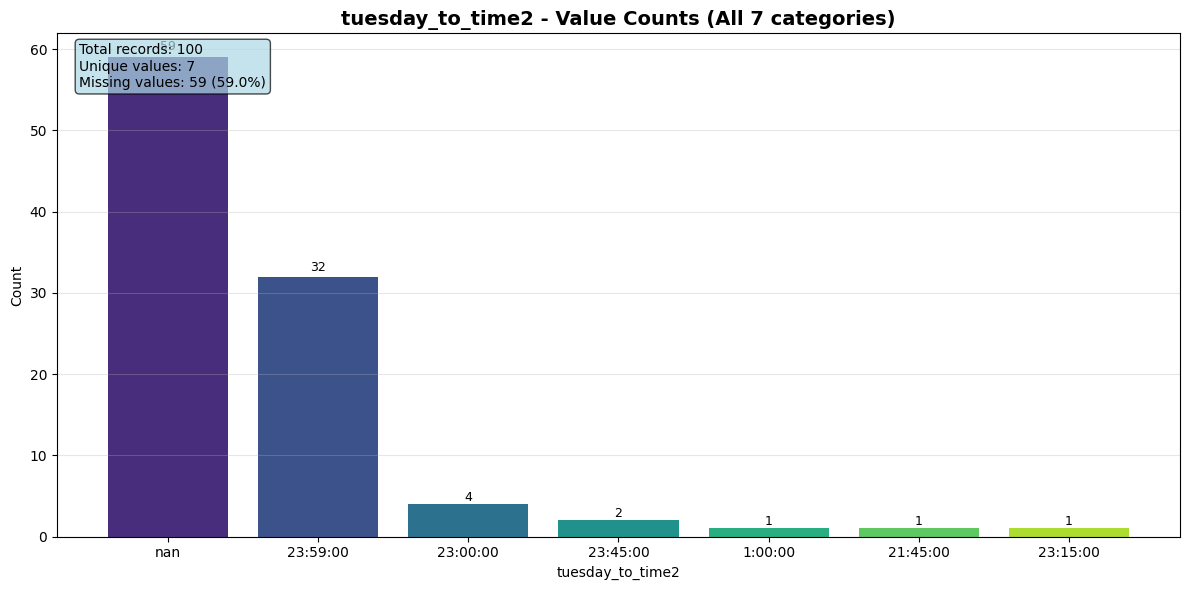


TUESDAY_TO_TIME2 - Top 10 values:
tuesday_to_time2
NaN         59
23:59:00    32
23:00:00     4
23:45:00     2
1:00:00      1
21:45:00     1
23:15:00     1
Name: count, dtype: int64
--------------------------------------------------


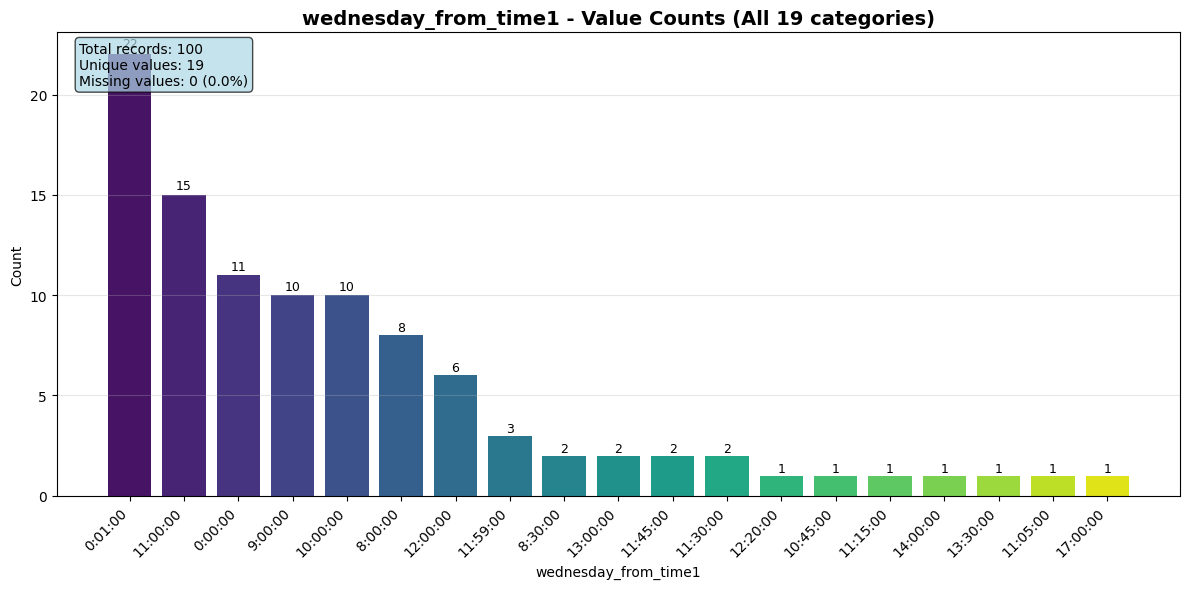


WEDNESDAY_FROM_TIME1 - Top 10 values:
wednesday_from_time1
0:01:00     22
11:00:00    15
0:00:00     11
9:00:00     10
10:00:00    10
8:00:00      8
12:00:00     6
11:59:00     3
8:30:00      2
13:00:00     2
Name: count, dtype: int64
--------------------------------------------------


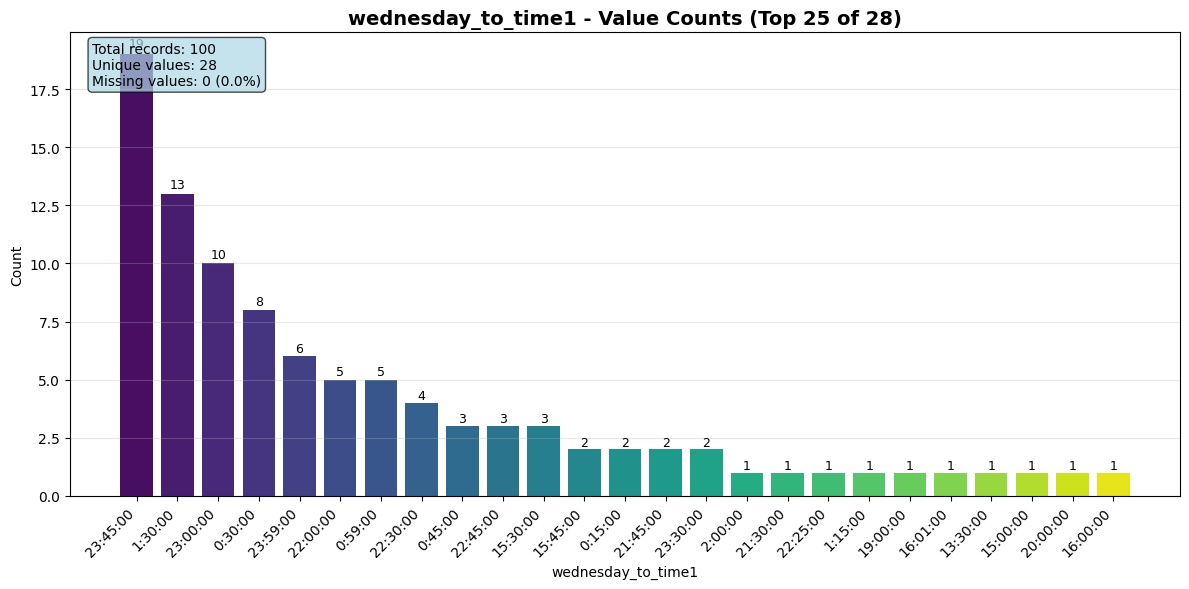


WEDNESDAY_TO_TIME1 - Top 10 values:
wednesday_to_time1
23:45:00    19
1:30:00     13
23:00:00    10
0:30:00      8
23:59:00     6
22:00:00     5
0:59:00      5
22:30:00     4
0:45:00      3
22:45:00     3
Name: count, dtype: int64
--------------------------------------------------


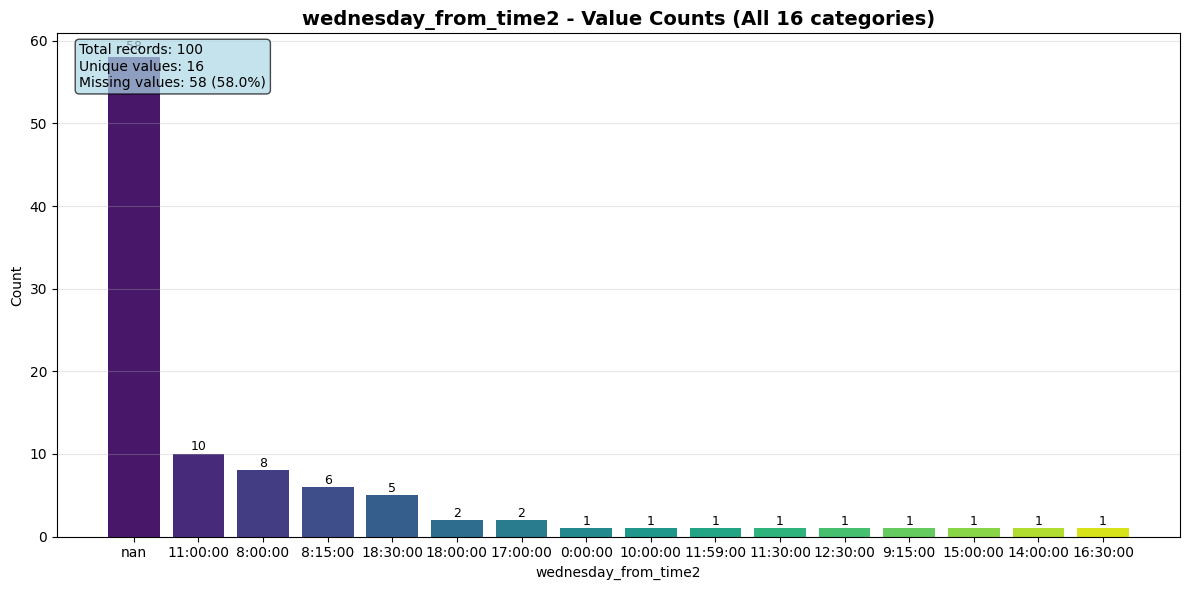


WEDNESDAY_FROM_TIME2 - Top 10 values:
wednesday_from_time2
NaN         58
11:00:00    10
8:00:00      8
8:15:00      6
18:30:00     5
18:00:00     2
17:00:00     2
0:00:00      1
10:00:00     1
11:59:00     1
Name: count, dtype: int64
--------------------------------------------------


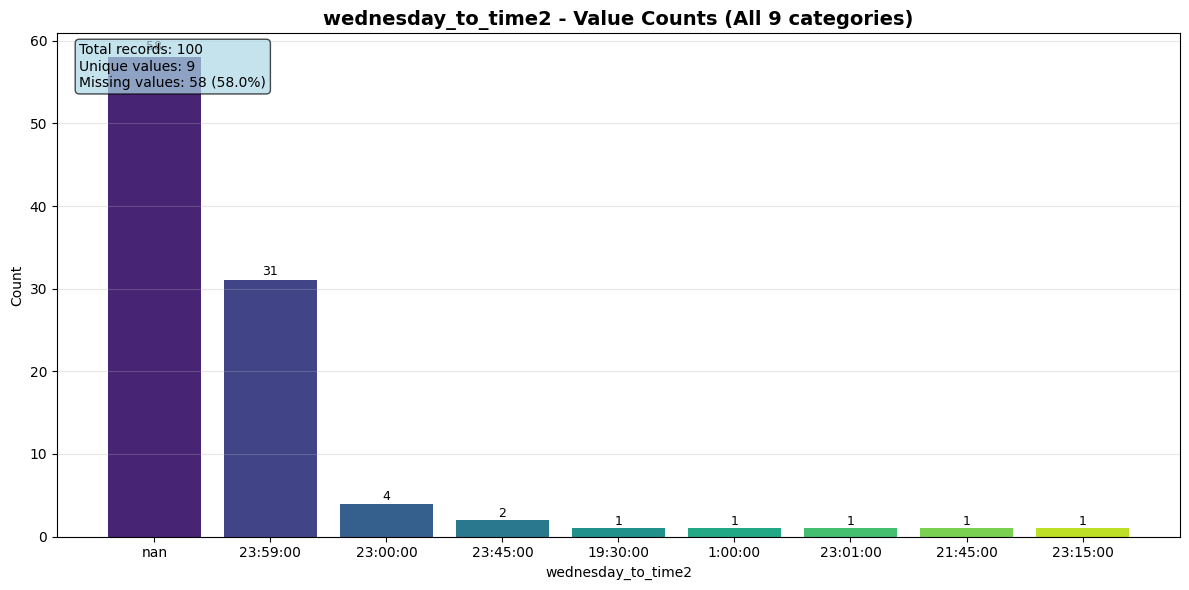


WEDNESDAY_TO_TIME2 - Top 10 values:
wednesday_to_time2
NaN         58
23:59:00    31
23:00:00     4
23:45:00     2
19:30:00     1
1:00:00      1
23:01:00     1
21:45:00     1
23:15:00     1
Name: count, dtype: int64
--------------------------------------------------


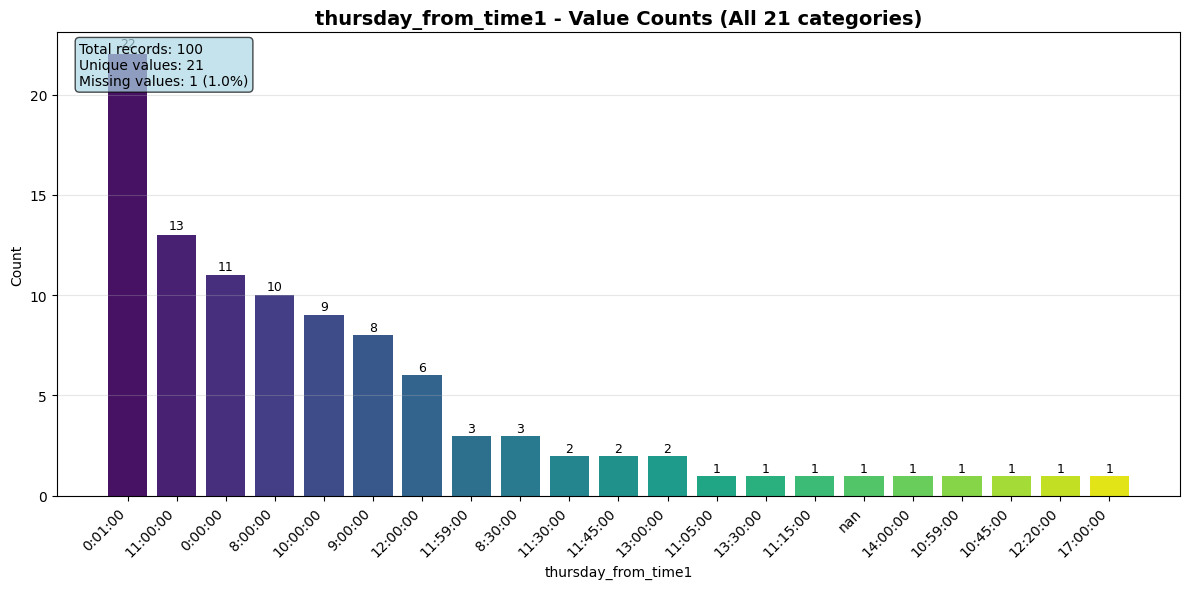


THURSDAY_FROM_TIME1 - Top 10 values:
thursday_from_time1
0:01:00     22
11:00:00    13
0:00:00     11
8:00:00     10
10:00:00     9
9:00:00      8
12:00:00     6
11:59:00     3
8:30:00      3
11:30:00     2
Name: count, dtype: int64
--------------------------------------------------


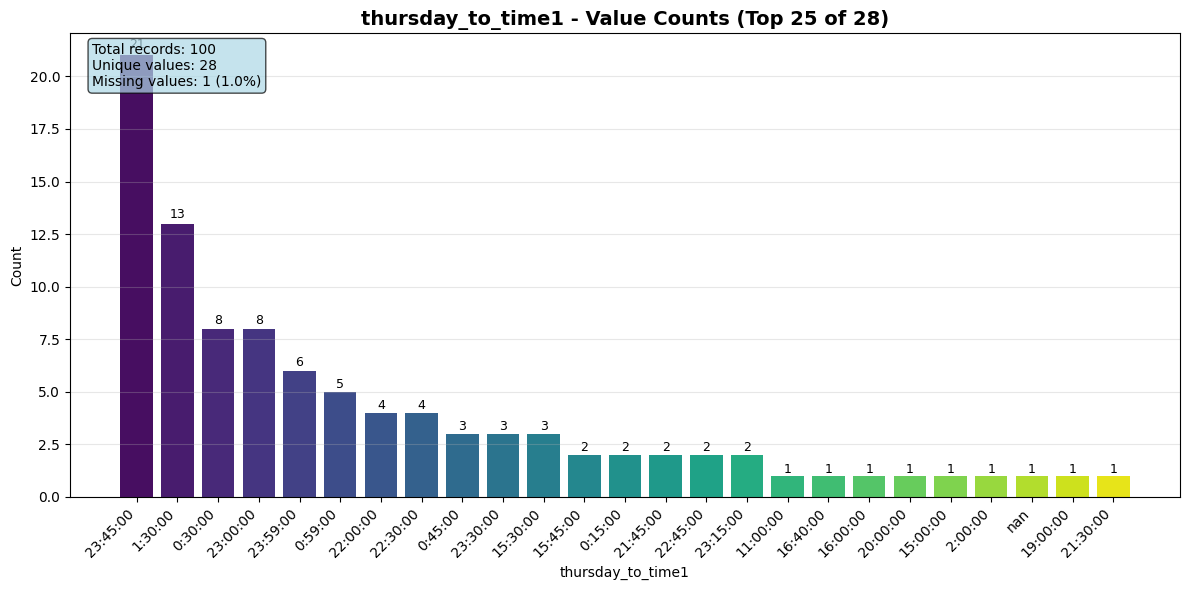


THURSDAY_TO_TIME1 - Top 10 values:
thursday_to_time1
23:45:00    21
1:30:00     13
0:30:00      8
23:00:00     8
23:59:00     6
0:59:00      5
22:00:00     4
22:30:00     4
0:45:00      3
23:30:00     3
Name: count, dtype: int64
--------------------------------------------------


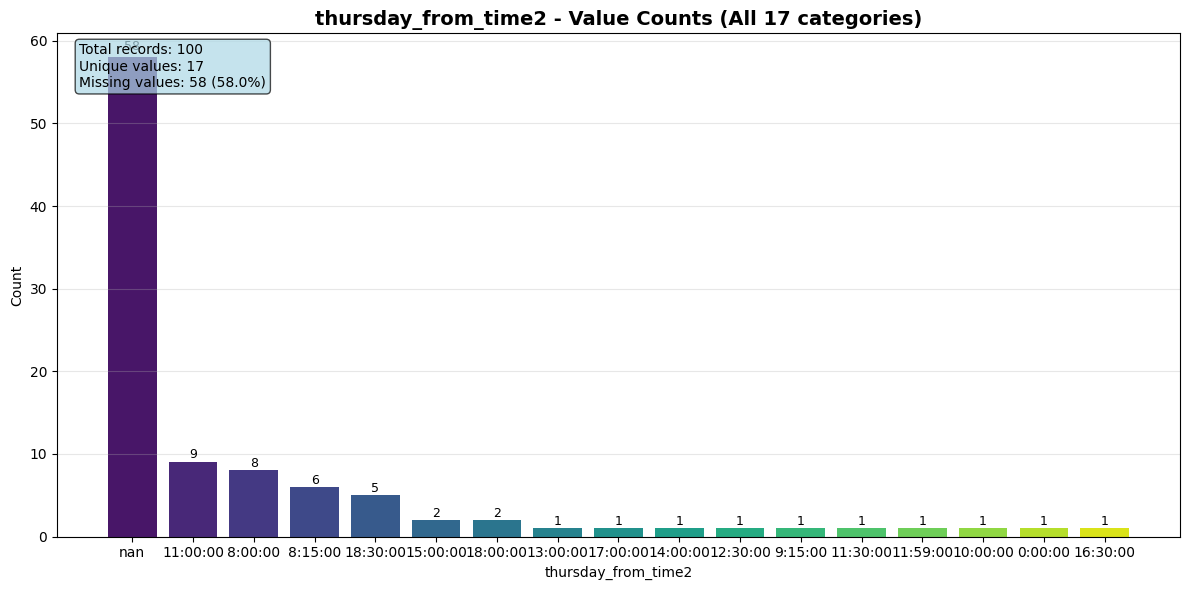


THURSDAY_FROM_TIME2 - Top 10 values:
thursday_from_time2
NaN         58
11:00:00     9
8:00:00      8
8:15:00      6
18:30:00     5
15:00:00     2
18:00:00     2
13:00:00     1
17:00:00     1
14:00:00     1
Name: count, dtype: int64
--------------------------------------------------


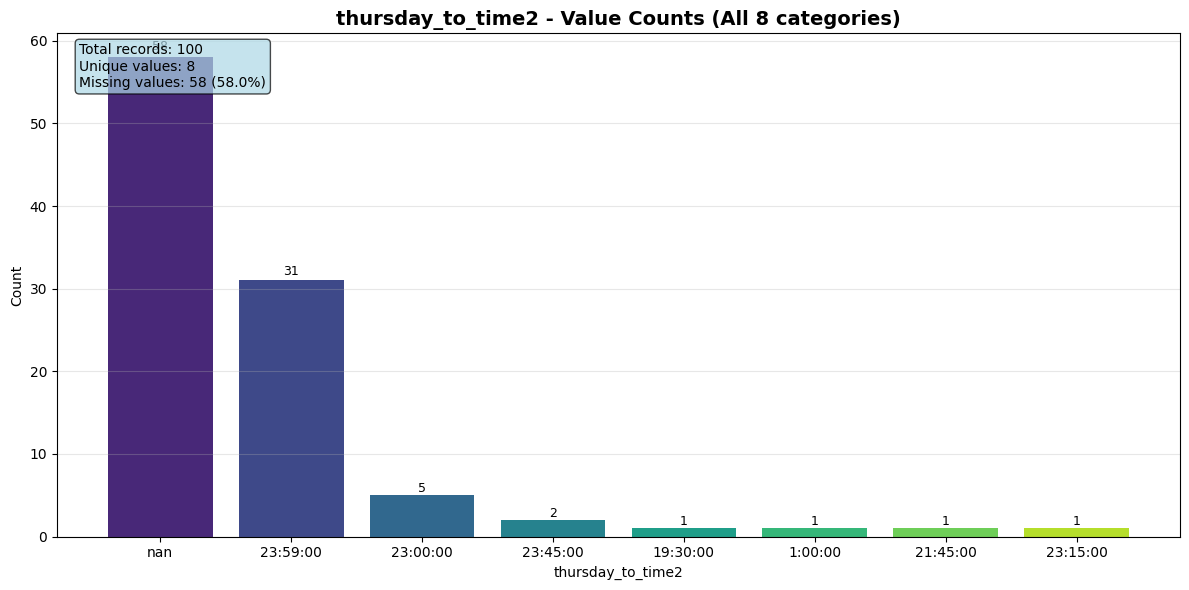


THURSDAY_TO_TIME2 - Top 10 values:
thursday_to_time2
NaN         58
23:59:00    31
23:00:00     5
23:45:00     2
19:30:00     1
1:00:00      1
21:45:00     1
23:15:00     1
Name: count, dtype: int64
--------------------------------------------------


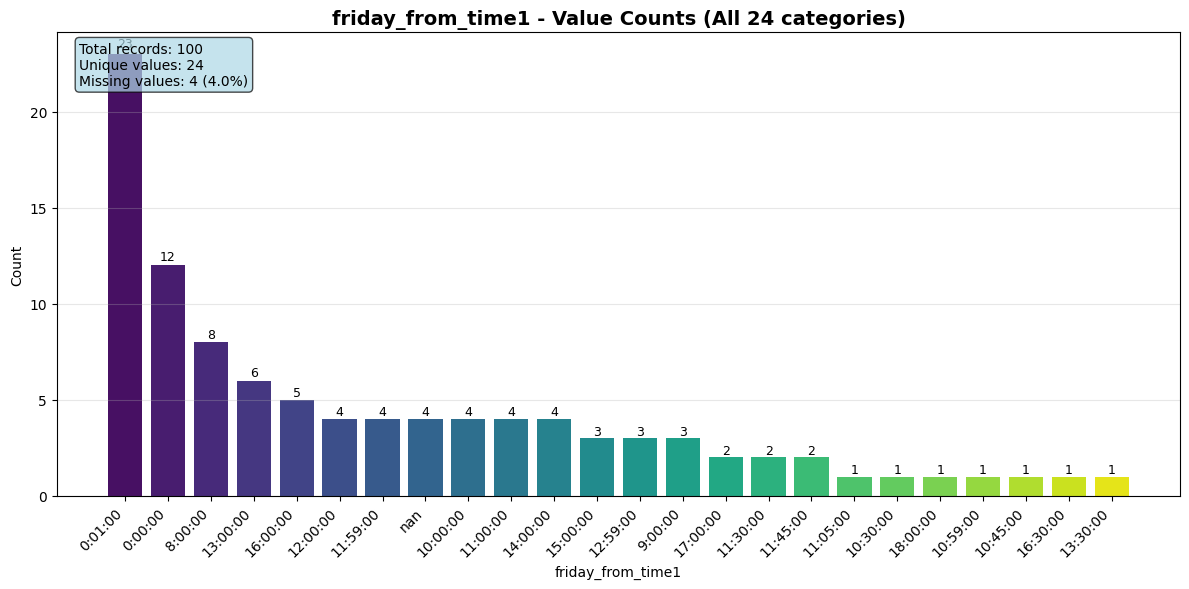


FRIDAY_FROM_TIME1 - Top 10 values:
friday_from_time1
0:01:00     23
0:00:00     12
8:00:00      8
13:00:00     6
16:00:00     5
12:00:00     4
11:59:00     4
NaN          4
10:00:00     4
11:00:00     4
Name: count, dtype: int64
--------------------------------------------------


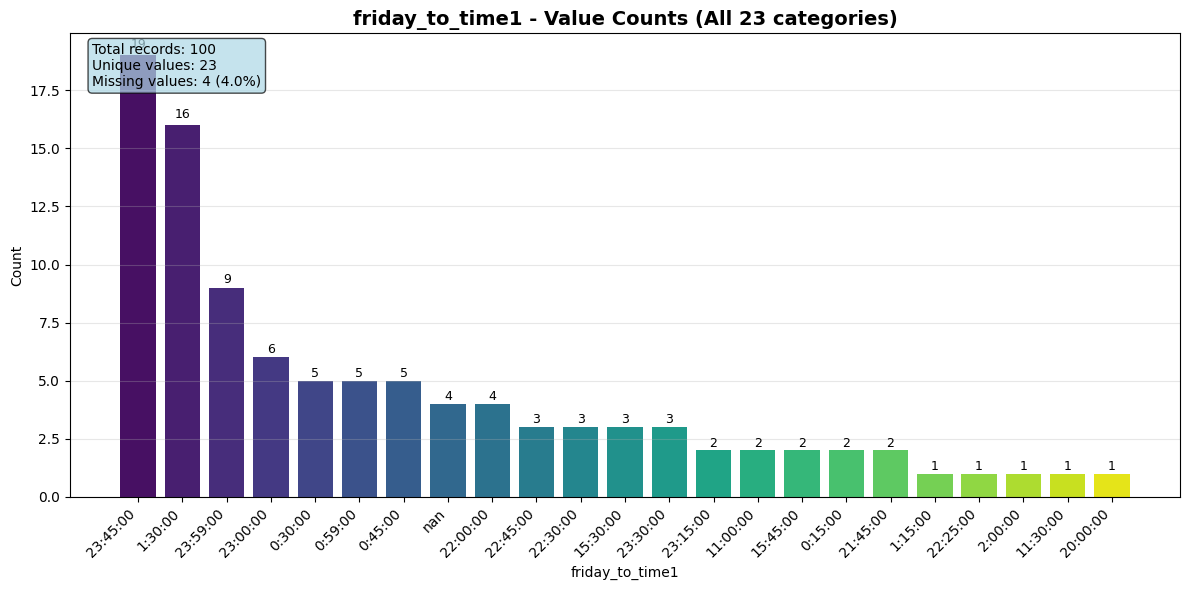


FRIDAY_TO_TIME1 - Top 10 values:
friday_to_time1
23:45:00    19
1:30:00     16
23:59:00     9
23:00:00     6
0:30:00      5
0:59:00      5
0:45:00      5
NaN          4
22:00:00     4
22:45:00     3
Name: count, dtype: int64
--------------------------------------------------


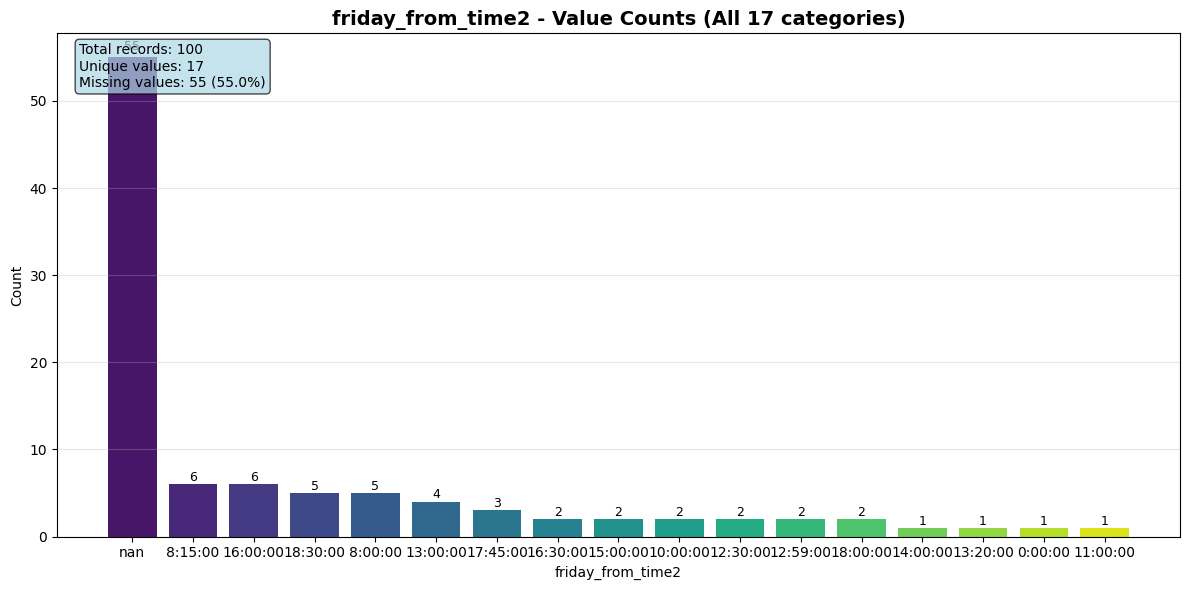


FRIDAY_FROM_TIME2 - Top 10 values:
friday_from_time2
NaN         55
8:15:00      6
16:00:00     6
18:30:00     5
8:00:00      5
13:00:00     4
17:45:00     3
16:30:00     2
15:00:00     2
10:00:00     2
Name: count, dtype: int64
--------------------------------------------------


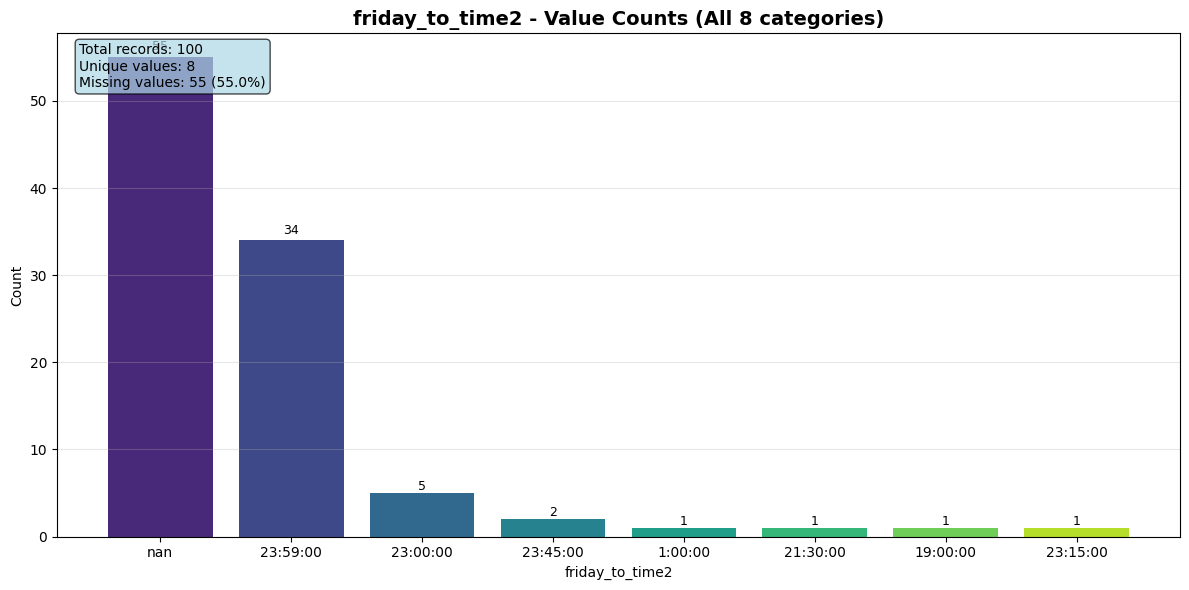


FRIDAY_TO_TIME2 - Top 10 values:
friday_to_time2
NaN         55
23:59:00    34
23:00:00     5
23:45:00     2
1:00:00      1
21:30:00     1
19:00:00     1
23:15:00     1
Name: count, dtype: int64
--------------------------------------------------


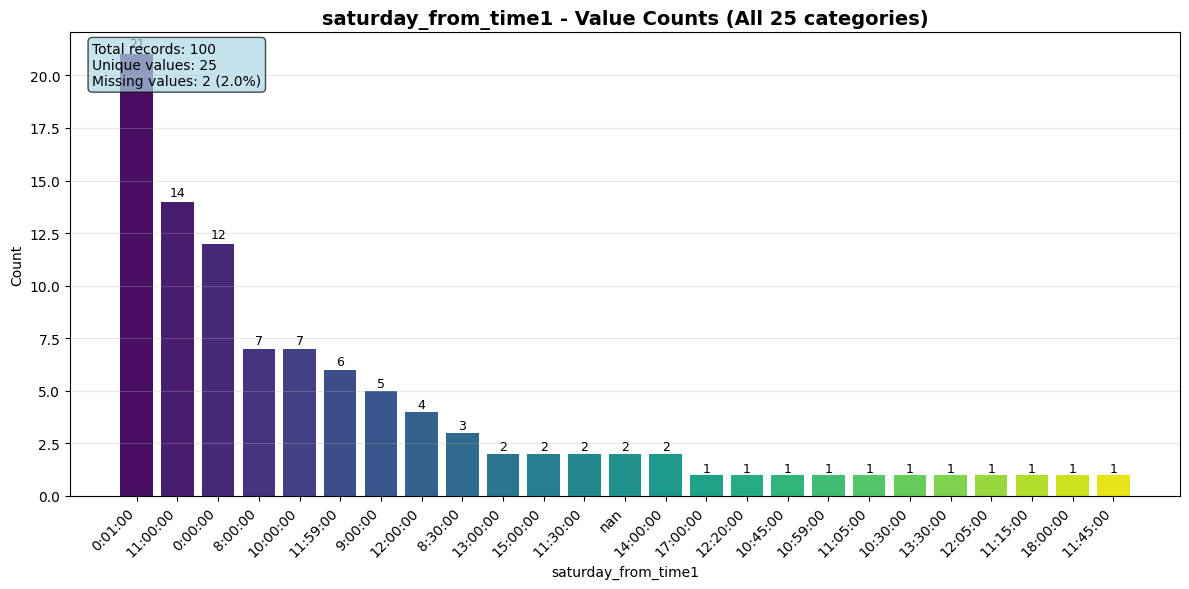


SATURDAY_FROM_TIME1 - Top 10 values:
saturday_from_time1
0:01:00     21
11:00:00    14
0:00:00     12
8:00:00      7
10:00:00     7
11:59:00     6
9:00:00      5
12:00:00     4
8:30:00      3
13:00:00     2
Name: count, dtype: int64
--------------------------------------------------


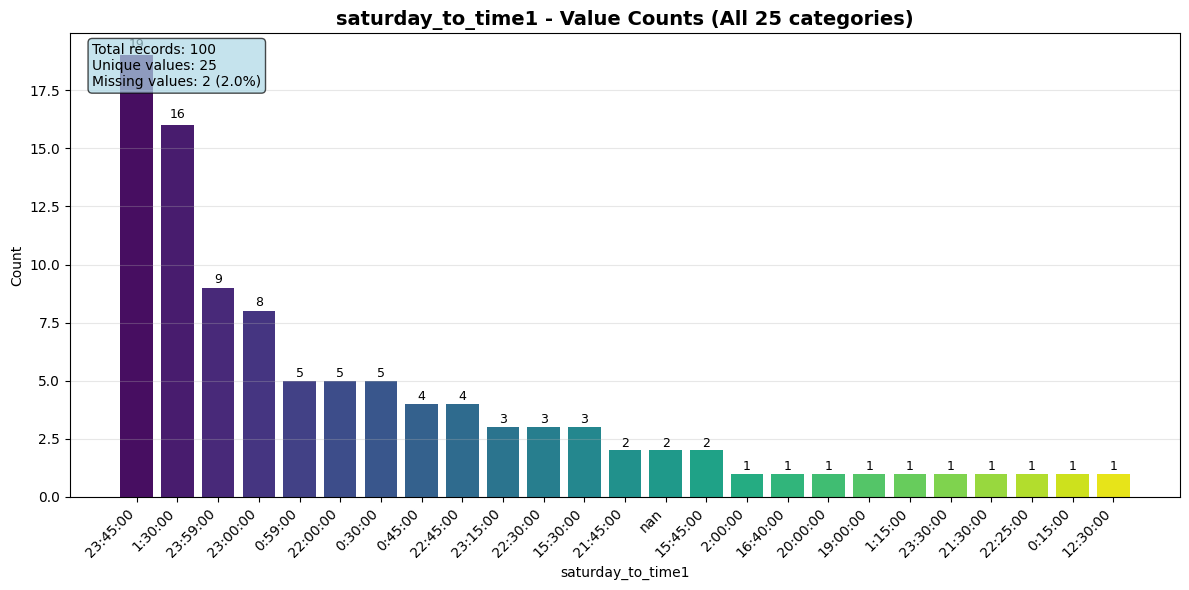


SATURDAY_TO_TIME1 - Top 10 values:
saturday_to_time1
23:45:00    19
1:30:00     16
23:59:00     9
23:00:00     8
0:59:00      5
22:00:00     5
0:30:00      5
0:45:00      4
22:45:00     4
23:15:00     3
Name: count, dtype: int64
--------------------------------------------------


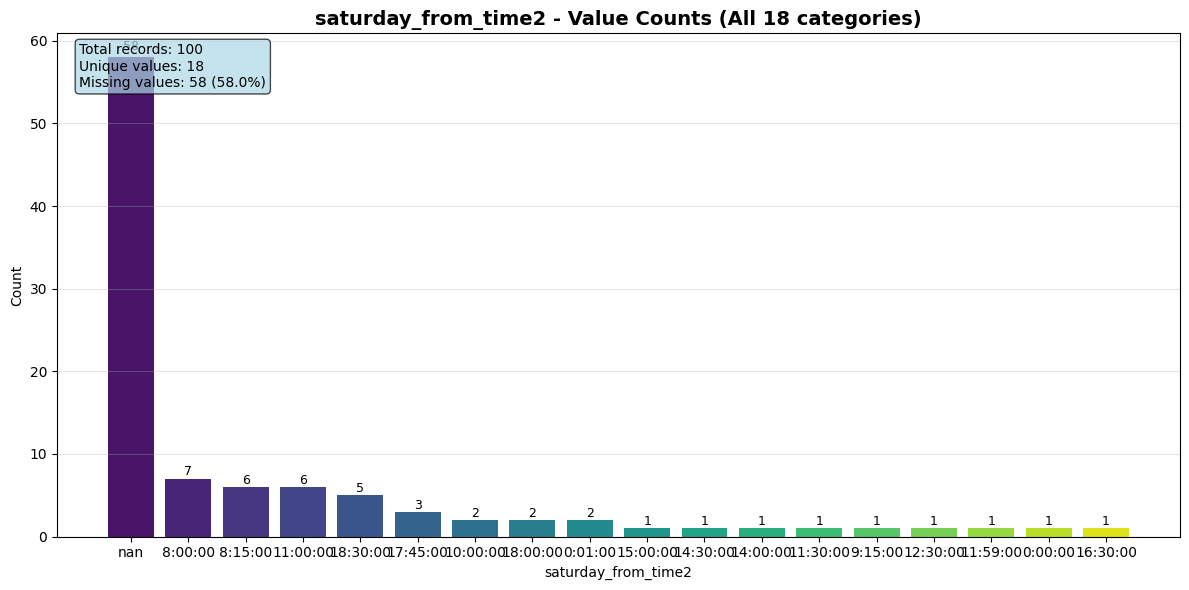


SATURDAY_FROM_TIME2 - Top 10 values:
saturday_from_time2
NaN         58
8:00:00      7
8:15:00      6
11:00:00     6
18:30:00     5
17:45:00     3
10:00:00     2
18:00:00     2
0:01:00      2
15:00:00     1
Name: count, dtype: int64
--------------------------------------------------


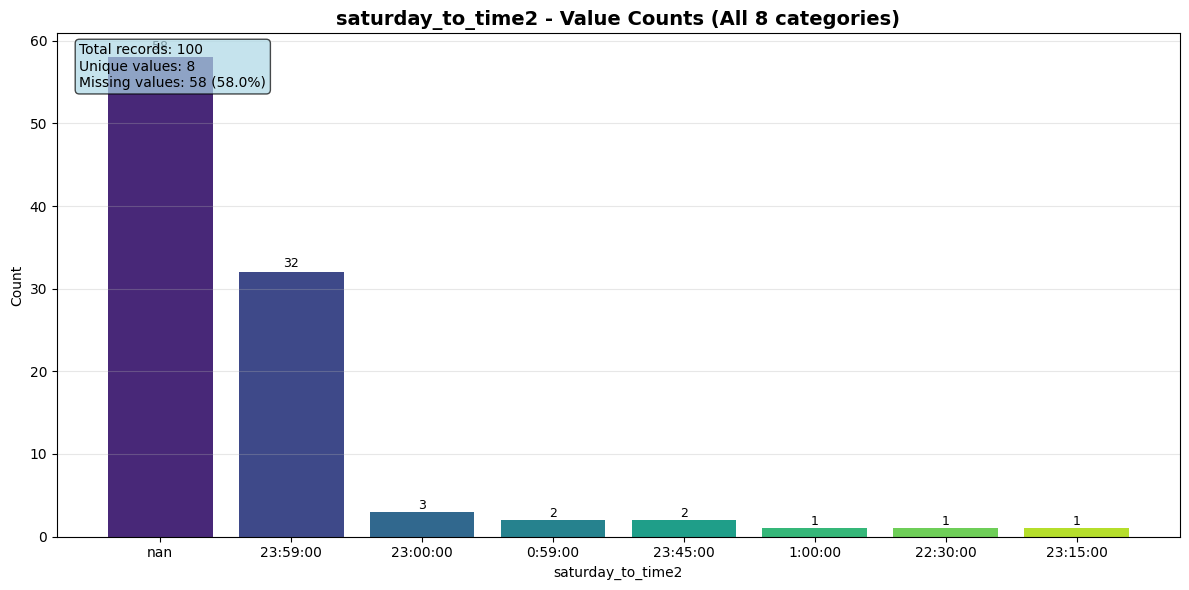


SATURDAY_TO_TIME2 - Top 10 values:
saturday_to_time2
NaN         58
23:59:00    32
23:00:00     3
0:59:00      2
23:45:00     2
1:00:00      1
22:30:00     1
23:15:00     1
Name: count, dtype: int64
--------------------------------------------------


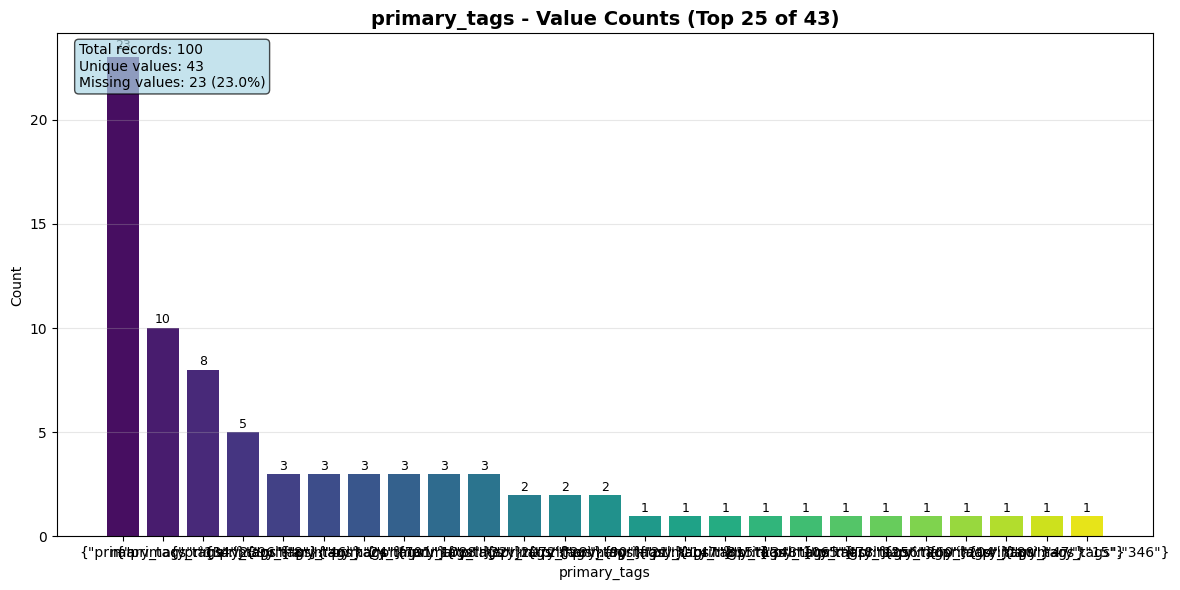


PRIMARY_TAGS - Top 10 values:
primary_tags
NaN                        23
{"primary_tags":"134"}     10
{"primary_tags":"2396"}     8
{"primary_tags":"8"}        5
{"primary_tags":"46"}       3
{"primary_tags":"24"}       3
{"primary_tags":"701"}      3
{"primary_tags":"1088"}     3
{"primary_tags":"32"}       3
{"primary_tags":"2072"}     3
Name: count, dtype: int64
--------------------------------------------------


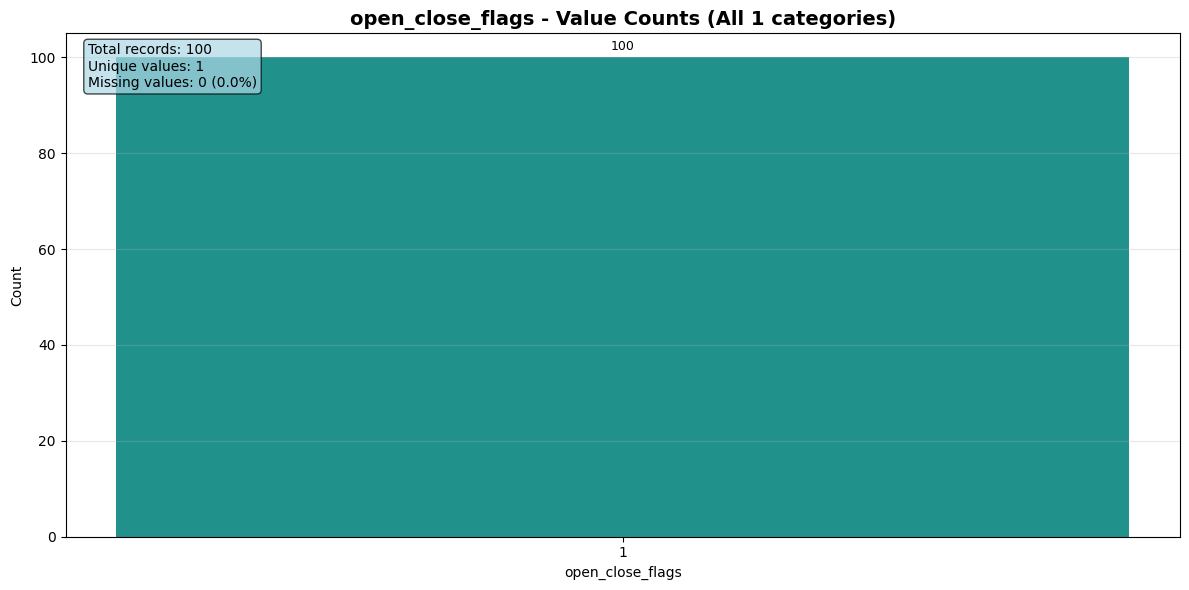


OPEN_CLOSE_FLAGS - Top 10 values:
open_close_flags
1    100
Name: count, dtype: int64
--------------------------------------------------
Skipping vendor_tag - too many unique values (78)
Skipping vendor_tag_name - too many unique values (78)


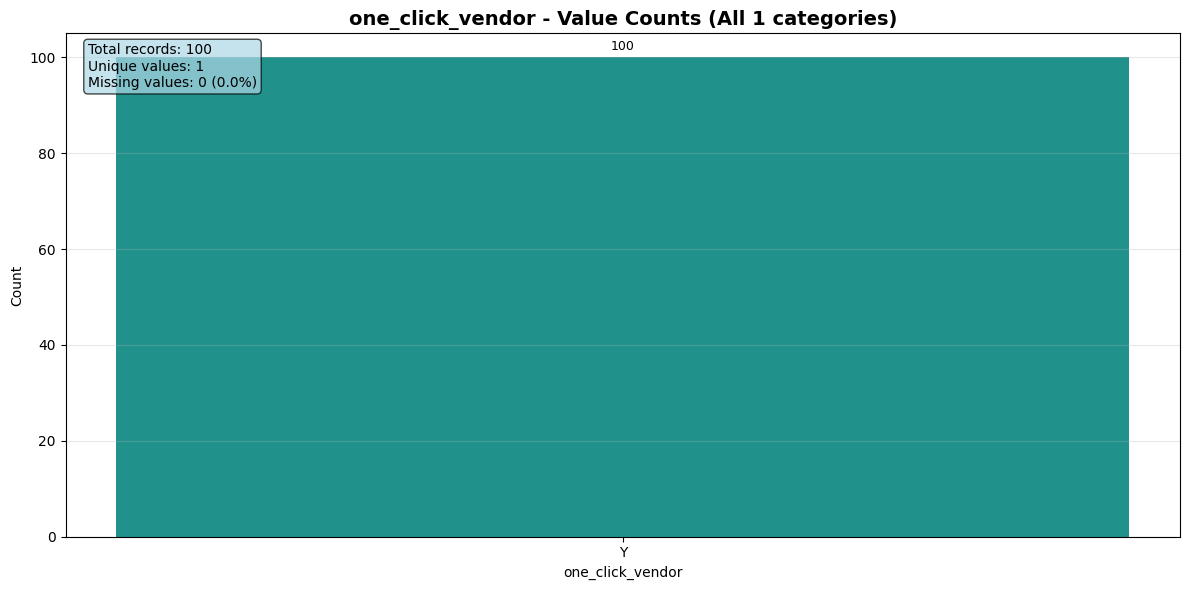


ONE_CLICK_VENDOR - Top 10 values:
one_click_vendor
Y    100
Name: count, dtype: int64
--------------------------------------------------


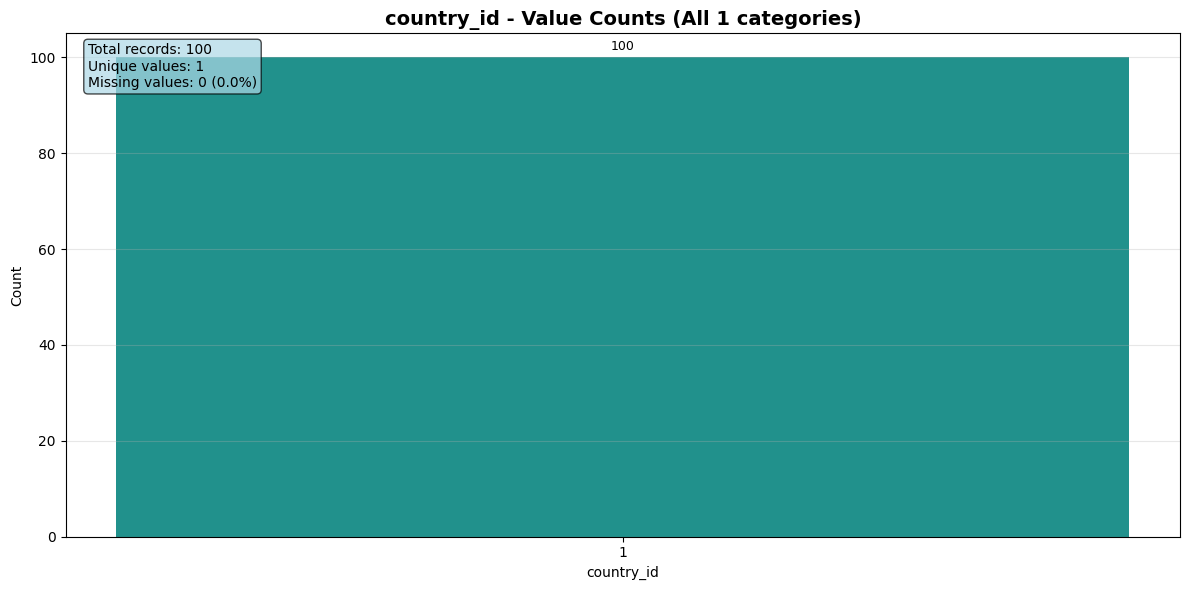


COUNTRY_ID - Top 10 values:
country_id
1    100
Name: count, dtype: int64
--------------------------------------------------


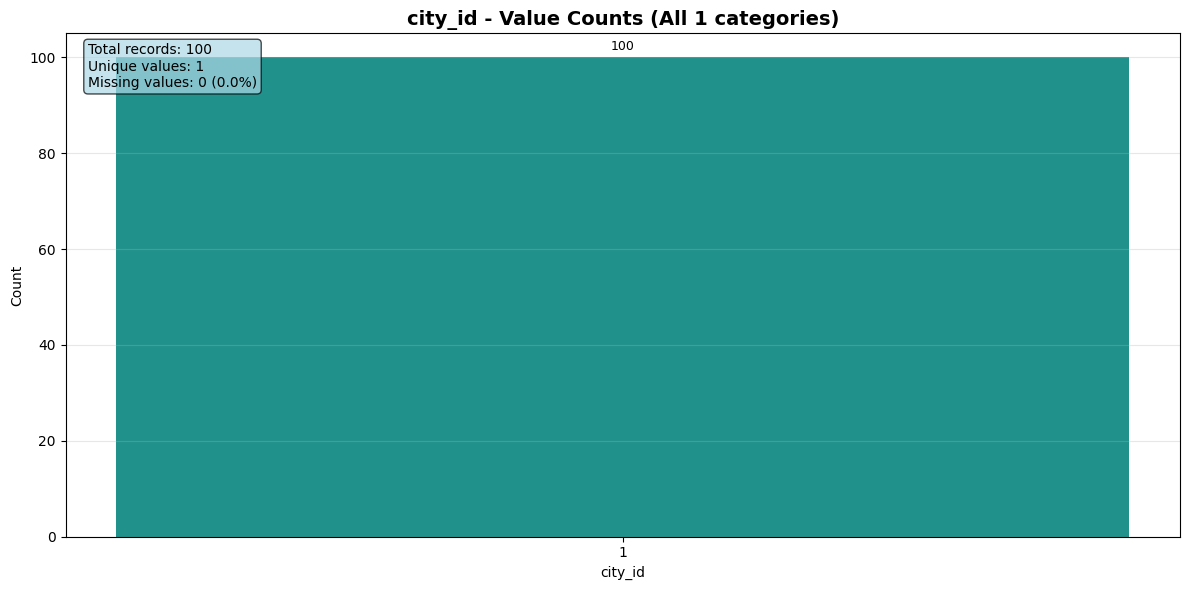


CITY_ID - Top 10 values:
city_id
1    100
Name: count, dtype: int64
--------------------------------------------------
Skipping created_at - too many unique values (100)
Skipping updated_at - too many unique values (94)


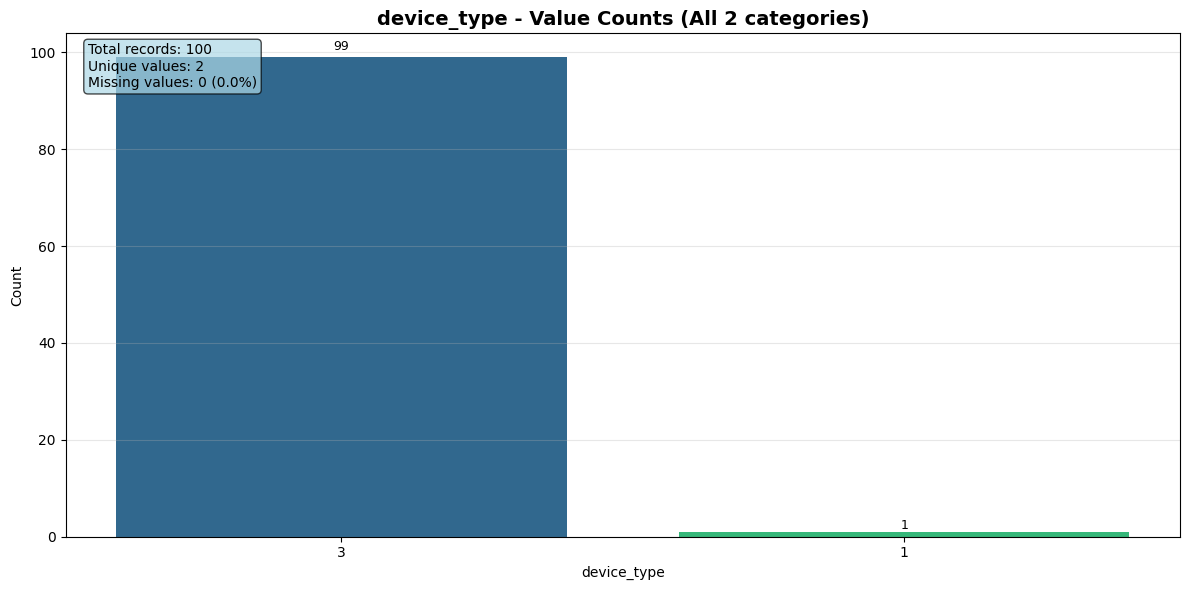


DEVICE_TYPE - Top 10 values:
device_type
3    99
1     1
Name: count, dtype: int64
--------------------------------------------------


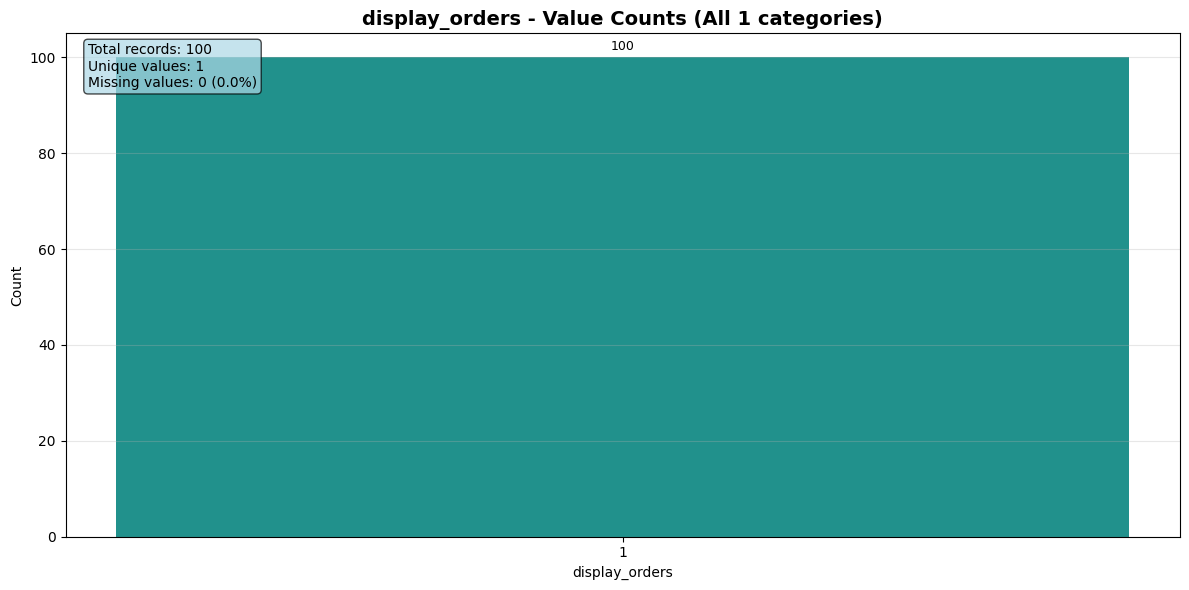


DISPLAY_ORDERS - Top 10 values:
display_orders
1    100
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
# Individual plots for each column with more details
def plot_individual_column_analysis(df, dataset_name="Dataset", max_categories=25):
    """
    Create individual detailed bar plots for each column
    """
    for col in df.columns:
        # Get value counts
        value_counts = df[col].value_counts(dropna=False)
        missing_count = df[col].isnull().sum()
        
        # Skip if too many unique values (likely continuous or ID columns)
        if len(value_counts) > 50:
            print(f"Skipping {col} - too many unique values ({len(value_counts)})")
            continue
        
        # Limit categories for plotting
        if len(value_counts) > max_categories:
            plot_data = value_counts.head(max_categories)
            title_suffix = f" (Top {max_categories} of {len(value_counts)})"
        else:
            plot_data = value_counts
            title_suffix = f" (All {len(value_counts)} categories)"
        
        # Create figure
        plt.figure(figsize=(12, 6))
        
        # Create bar plot
        bars = plt.bar(range(len(plot_data)), plot_data.values, 
                      color=sns.color_palette("viridis", len(plot_data)))
        
        # Customize plot
        plt.title(f'{col} - Value Counts{title_suffix}', fontsize=14, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel('Count')
        
        # Set x-axis labels with rotation if needed
        plt.xticks(range(len(plot_data)), plot_data.index, 
                  rotation=45 if len(str(plot_data.index[0])) > 5 else 0, 
                  ha='right' if len(str(plot_data.index[0])) > 5 else 'center')
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)
        
        # Add statistics text box
        stats_text = f'Total records: {len(df)}\n'
        stats_text += f'Unique values: {len(value_counts)}\n'
        stats_text += f'Missing values: {missing_count} ({missing_count/len(df)*100:.1f}%)'
        
        plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
        
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Print top 10 values for reference
        print(f"\n{col.upper()} - Top 10 values:")
        print(value_counts.head(10))
        print("-" * 50)

# Apply to orders dataset
plot_individual_column_analysis(vendors, "Venders Dataset")

In [ ]:
print(train_customers.shape)
print(train_locations.shape)
print(orders.shape)
print(vendors.shape)

(34674, 10)
(59503, 5)
(135303, 26)
(100, 59)


In [ ]:
print(train_customers.columns)
print(train_locations.columns)
print(orders.columns)
print(vendors.columns)

Index(['customer_id', 'gender', 'dob', 'status', 'verified', 'language',
       'created_at', 'updated_at', 'year_month', 'month_year'],
      dtype='object')
Index(['customer_id', 'location_number', 'location_type', 'latitude',
       'longitude'],
      dtype='object')
Index(['order_id', 'customer_id', 'item_count', 'grand_total', 'payment_mode',
       'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'driver_rating', 'deliverydistance', 'preparationtime',
       'delivery_time', 'order_accepted_time', 'driver_accepted_time',
       'ready_for_pickup_time', 'picked_up_time', 'delivered_time',
       'delivery_date', 'vendor_id', 'created_at', 'LOCATION_NUMBER',
       'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR'],
      dtype='object')
Index(['id', 'authentication_id', 'latitude', 'longitude',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'Open

In [ ]:
import pandas as pd

# Load the CSVs
train_customers = pd.read_csv("Train/train_customers.csv")
train_locations = pd.read_csv("Train/train_locations.csv")
orders = pd.read_csv("Train/orders.csv")
vendors = pd.read_csv("Train/vendors.csv")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7788\1537809658.py:6: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv("Train/orders.csv")


In [ ]:
# Step 1: Get all possible combinations of customer, location, and vendor
customers_locations = train_locations[['customer_id', 'location_number']].drop_duplicates()
vendors_list = vendors['id'].unique()

# Cartesian product
all_combos = []
for _, row in customers_locations.iterrows():
    cid = row['customer_id']
    loc = row['location_number']
    for vid in vendors_list:
        all_combos.append([cid, loc, vid])

all_combos_df = pd.DataFrame(all_combos, columns=['customer_id', 'location_number', 'vendor_id'])

# Step 2: Create CID X LOC_NUM X VENDOR key
all_combos_df['CID X LOC_NUM X VENDOR'] = (
    all_combos_df['customer_id'] + ' X ' +
    all_combos_df['location_number'].astype(str) + ' X ' +
    all_combos_df['vendor_id'].astype(str)
)

# Step 3: Identify positive samples from orders
positive_samples = orders[['CID X LOC_NUM X VENDOR']].drop_duplicates()
positive_samples['target'] = 1

# Step 4: Merge and assign target = 1 if exists, else 0
final_df = all_combos_df.merge(positive_samples, on='CID X LOC_NUM X VENDOR', how='left')
final_df['target'] = final_df['target'].fillna(0).astype(int)




In [ ]:
final_df['target'].value_counts()

target
0    5870158
1      80142
Name: count, dtype: int64

In [ ]:
# Step 1: Merge customer features
final_df = final_df.merge(train_customers, on='customer_id', how='left')

# Step 2: Merge location features
final_df = final_df.merge(train_locations, on=['customer_id', 'location_number'], how='left')

# Step 3: Merge vendor features
final_df = final_df.merge(vendors, left_on='vendor_id', right_on='id', how='left')


In [ ]:
final_df.columns

Index(['customer_id', 'location_number', 'vendor_id', 'CID X LOC_NUM X VENDOR',
       'target', 'gender', 'dob', 'status_x', 'verified_x', 'language_x',
       'created_at_x', 'updated_at_x', 'location_type', 'latitude_x',
       'longitude_x', 'id', 'authentication_id', 'latitude_y', 'longitude_y',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_haked_delivering',
       'discount_percentage', 'status_y', 'verified_y', 'rank', 'language_y',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',


In [ ]:
final_df = final_df[[col for col in final_df.columns if col != 'target'] + ['target']]

In [ ]:
columns_need_to_check =  ['vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1',
       'saturday_from_time2', 'saturday_to_time2', 'primary_tags',
       'open_close_flags', 'vendor_tag', 'vendor_tag_name', 'one_click_vendor',
       'country_id', 'city_id', 'created_at_y', 'updated_at_y', 'device_type',
       'display_orders']

## DATA PREPROCESSING

columns we are going to remove 
<li>'CID X LOC_NUM X VENDOR'</li>
<li> dob : lot of null values</li>

In [ ]:
columns_need_to_check =  ['vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1',
       'saturday_from_time2', 'saturday_to_time2', 'primary_tags',
       'open_close_flags', 'vendor_tag', 'vendor_tag_name', 'one_click_vendor',
       'country_id', 'city_id', 'created_at_y', 'updated_at_y', 'device_type',
       'display_orders']

In [ ]:
final_df['open_close_flags']

0          1
1          1
2          1
3          1
4          1
          ..
5969195    1
5969196    1
5969197    1
5969198    1
5969199    1
Name: open_close_flags, Length: 5969200, dtype: int64

In [ ]:
for col in columns_need_to_check:
    print('col name:' , col)
    print(final_df[col].value_counts())
    print('------')

col name: vendor_rating
vendor_rating
4.5    1134148
4.3    1074456
4.2     895380
4.4     835688
4.6     596920
4.7     417844
4.0     358152
4.1     298460
3.8     119384
4.8     119384
3.2      59692
3.7      59692
Name: count, dtype: int64
------
col name: sunday_from_time1
sunday_from_time1
0:01:00     1253532
11:00:00     895380
0:00:00      716304
8:00:00      596920
10:00:00     537228
9:00:00      477536
12:00:00     358152
11:59:00     179076
8:30:00      119384
13:00:00     119384
11:45:00     119384
11:30:00     119384
12:20:00      59692
10:45:00      59692
11:15:00      59692
14:00:00      59692
13:30:00      59692
11:05:00      59692
17:00:00      59692
Name: count, dtype: int64
------
col name: sunday_to_time1
sunday_to_time1
23:45:00    1134148
1:30:00      775996
23:00:00     596920
0:30:00      477536
23:59:00     358152
0:59:00      298460
22:00:00     298460
22:30:00     238768
0:45:00      179076
22:45:00     179076
15:30:00     179076
21:45:00     119384
23:30:00

In [ ]:
cols_to_drop = [
    'dob',
    'language_x',
    'location_type',
    'commission',
    'is_haked_delivering',
    'open_close_flags',
    'one_click_vendor',
    'country_id',
    'city_id',
    'display_orders',
    'vendor_category_en',
    'created_at_y',
    'updated_at_y',
    'created_at_x',
    'updated_at_x',
    'vendor_tag_name',
    'primary_tags',
    'vendor_tag'
]

final_df = final_df.drop(columns=cols_to_drop)


In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
final_df['gender'] = final_df['gender'].str.strip().str.lower()
final_df['gender'] = final_df['gender'].replace({
    '?????': np.nan,
    '': np.nan,
    '1': np.nan
})
final_df = final_df[final_df['gender'].isin(['male', 'female'])]


In [ ]:
final_df['gender'].value_counts()

gender
male      3807800
female     307900
Name: count, dtype: int64

In [ ]:
final_df.groupby(['gender', 'target']).size().reset_index(name='count')

gender  target    count
0  female       0   303678
1  female       1     4222
2    male       0  3750777
3    male       1    57023

In [ ]:
final_df

customer_id  location_number  vendor_id CID X LOC_NUM X VENDOR  \
600         NDYLK9A                0          4        NDYLK9A X 0 X 4   
601         NDYLK9A                0         13       NDYLK9A X 0 X 13   
602         NDYLK9A                0         20       NDYLK9A X 0 X 20   
603         NDYLK9A                0         23       NDYLK9A X 0 X 23   
604         NDYLK9A                0         28       NDYLK9A X 0 X 28   
...             ...              ...        ...                    ...   
5969195     HWELAU8                1        849      HWELAU8 X 1 X 849   
5969196     HWELAU8                1        855      HWELAU8 X 1 X 855   
5969197     HWELAU8                1        856      HWELAU8 X 1 X 856   
5969198     HWELAU8                1        858      HWELAU8 X 1 X 858   
5969199     HWELAU8                1        907      HWELAU8 X 1 X 907   

         gender  status_x  verified_x  latitude_x  longitude_x   id  ...  \
600      female       1.0         1.0   -0.203280   -78.566885    4  ...   
601      female       1.0         1.0   -0.203280   -78.566885   13  ...   
602      female       1.0         1.0   -0.203280   -78.566885   20  ...   
603      female       1.0         1.0   -0.203280   -78.566885   23  ...   
604      female       1.0         1.0   -0.203280   -78.566885   28  ...   
...         ...       ...         ...         ...          ...  ...  ...   
5969195    male       1.0         1.0   -0.067043     0.648221  849  ...   
5969196    male       1.0         1.0   -0.067043     0.648221  855  ...   
5969197    male       1.0         1.0   -0.067043     0.648221  856  ...   
5969198    male       1.0         1.0   -0.067043     0.648221  858  ...   
5969199    male       1.0         1.0   -0.067043     0.648221  907  ...   

         friday_from_time1  friday_to_time1  friday_from_time2  \
600                0:00:00          0:30:00           10:00:00   
601                0:00:00          1:30:00            8:00:00   
602                8:00:00         22:45:00                NaN   
603                9:00:00         23:45:00                NaN   
604                0:01:00          1:30:00           17:45:00   
...                    ...              ...                ...   
5969195            0:00:00          1:30:00            8:15:00   
5969196            0:00:00          1:30:00           11:00:00   
5969197            0:00:00          1:30:00            8:15:00   
5969198            0:00:00          1:30:00            8:15:00   
5969199                NaN              NaN           16:30:00   

         friday_to_time2  saturday_from_time1  saturday_to_time1  \
600             23:59:00              0:00:00            0:30:00   
601             23:59:00              0:00:00            1:30:00   
602                  NaN              8:00:00           22:45:00   
603                  NaN              9:00:00           23:45:00   
604             23:59:00              0:01:00            1:30:00   
...                  ...                  ...                ...   
5969195         23:59:00              0:00:00            1:30:00   
5969196         23:59:00              0:00:00            1:30:00   
5969197         23:59:00              0:00:00            1:30:00   
5969198         23:59:00              0:00:00            1:30:00   
5969199         23:15:00             11:00:00           12:30:00   

         saturday_from_time2 saturday_to_time2 device_type  target  
600                 10:00:00          23:59:00           3       0  
601                  8:00:00          23:59:00           3       0  
602                      NaN               NaN           3       0  
603                      NaN               NaN           3       0  
604                 17:45:00          23:59:00           3       0  
...                      ...               ...         ...     ...  
5969195              8:15:00          23:59:00           3       0  
5969196             11:00:00          23:59:

In [ ]:
final_df['customer_id'].value_counts()

customer_id
0FOCFVI    3400
5EP9F62    2000
YYKZN0F    1900
4UZKXW2    1900
YQC2R6H    1700
           ... 
KNTDDUU     100
5HQJC77     100
8B4SPZU     100
NZJKTAF     100
C06Z2PP     100
Name: count, Length: 22366, dtype: int64

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4115700 entries, 600 to 5969199
Data columns (total 56 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   customer_id             object 
 1   location_number         int64  
 2   vendor_id               int64  
 3   CID X LOC_NUM X VENDOR  object 
 4   gender                  object 
 5   status_x                float64
 6   verified_x              float64
 7   latitude_x              float64
 8   longitude_x             float64
 9   id                      int64  
 10  authentication_id       int64  
 11  latitude_y              float64
 12  longitude_y             float64
 13  vendor_category_id      int64  
 14  delivery_charge         float64
 15  serving_distance        int64  
 16  is_open                 int64  
 17  OpeningTime             object 
 18  OpeningTime2            object 
 19  prepration_time         int64  
 20  discount_percentage     int64  
 21  status_y                int64  
 2

In [ ]:
import pandas as pd

# List of your time columns
time_cols = [
    'sunday_from_time1', 'sunday_to_time1', 'sunday_from_time2', 'sunday_to_time2',
    'monday_from_time1', 'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
    'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2', 'tuesday_to_time2',
    'wednesday_from_time1', 'wednesday_to_time1', 'wednesday_from_time2', 'wednesday_to_time2',
    'thursday_from_time1', 'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
    'friday_from_time1', 'friday_to_time1', 'friday_from_time2', 'friday_to_time2',
    'saturday_from_time1', 'saturday_to_time1', 'saturday_from_time2', 'saturday_to_time2'
]

# Function to convert time to minutes since midnight
def time_to_minutes(t):
    if pd.isna(t) or t == '':
        return -1  # Missing value flag
    try:
        h, m, s = map(int, t.split(':'))
        return h * 60 + m + s / 60
    except:
        return -1  # For any invalid format

# Apply conversion
for col in time_cols:
    final_df[col] = final_df[col].apply(time_to_minutes)


In [ ]:
final_df

customer_id  location_number  vendor_id CID X LOC_NUM X VENDOR  \
600         NDYLK9A                0          4        NDYLK9A X 0 X 4   
601         NDYLK9A                0         13       NDYLK9A X 0 X 13   
602         NDYLK9A                0         20       NDYLK9A X 0 X 20   
603         NDYLK9A                0         23       NDYLK9A X 0 X 23   
604         NDYLK9A                0         28       NDYLK9A X 0 X 28   
...             ...              ...        ...                    ...   
5969195     HWELAU8                1        849      HWELAU8 X 1 X 849   
5969196     HWELAU8                1        855      HWELAU8 X 1 X 855   
5969197     HWELAU8                1        856      HWELAU8 X 1 X 856   
5969198     HWELAU8                1        858      HWELAU8 X 1 X 858   
5969199     HWELAU8                1        907      HWELAU8 X 1 X 907   

         gender  status_x  verified_x  latitude_x  longitude_x   id  ...  \
600      female       1.0         1.0   -0.203280   -78.566885    4  ...   
601      female       1.0         1.0   -0.203280   -78.566885   13  ...   
602      female       1.0         1.0   -0.203280   -78.566885   20  ...   
603      female       1.0         1.0   -0.203280   -78.566885   23  ...   
604      female       1.0         1.0   -0.203280   -78.566885   28  ...   
...         ...       ...         ...         ...          ...  ...  ...   
5969195    male       1.0         1.0   -0.067043     0.648221  849  ...   
5969196    male       1.0         1.0   -0.067043     0.648221  855  ...   
5969197    male       1.0         1.0   -0.067043     0.648221  856  ...   
5969198    male       1.0         1.0   -0.067043     0.648221  858  ...   
5969199    male       1.0         1.0   -0.067043     0.648221  907  ...   

         friday_from_time1  friday_to_time1  friday_from_time2  \
600                    0.0             30.0              600.0   
601                    0.0             90.0              480.0   
602                  480.0           1365.0               -1.0   
603                  540.0           1425.0               -1.0   
604                    1.0             90.0             1065.0   
...                    ...              ...                ...   
5969195                0.0             90.0              495.0   
5969196                0.0             90.0              660.0   
5969197                0.0             90.0              495.0   
5969198                0.0             90.0              495.0   
5969199               -1.0             -1.0              990.0   

         friday_to_time2  saturday_from_time1  saturday_to_time1  \
600               1439.0                  0.0               30.0   
601               1439.0                  0.0               90.0   
602                 -1.0                480.0             1365.0   
603                 -1.0                540.0             1425.0   
604               1439.0                  1.0               90.0   
...                  ...                  ...                ...   
5969195           1439.0                  0.0               90.0   
5969196           1439.0                  0.0               90.0   
5969197           1439.0                  0.0               90.0   
5969198           1439.0                  0.0               90.0   
5969199           1395.0                660.0              750.0   

         saturday_from_time2 saturday_to_time2 device_type  target  
600                    600.0            1439.0           3       0  
601                    480.0            1439.0           3       0  
602                     -1.0              -1.0           3       0  
603                     -1.0              -1.0           3       0  
604                   1065.0            1439.0           3       0  
...                      ...               ...         ...     ...  
5969195                495.0            1439.0           3       0  
5969196                660.0            1439

In [ ]:
final_df.columns

Index(['customer_id', 'location_number', 'vendor_id', 'CID X LOC_NUM X VENDOR',
       'gender', 'status_x', 'verified_x', 'latitude_x', 'longitude_x', 'id',
       'authentication_id', 'latitude_y', 'longitude_y', 'vendor_category_id',
       'delivery_charge', 'serving_distance', 'is_open', 'OpeningTime',
       'OpeningTime2', 'prepration_time', 'discount_percentage', 'status_y',
       'verified_y', 'rank', 'language_y', 'vendor_rating',
       'sunday_from_time1', 'sunday_to_time1', 'sunday_from_time2',
       'sunday_to_time2', 'monday_from_time1', 'monday_to_time1',
       'monday_from_time2', 'monday_to_time2', 'tuesday_from_time1',
       'tuesday_to_time1', 'tuesday_from_time2', 'tuesday_to_time2',
       'wednesday_from_time1', 'wednesday_to_time1', 'wednesday_from_time2',
       'wednesday_to_time2', 'thursday_from_time1', 'thursday_to_time1',
       'thursday_from_time2', 'thursday_to_time2', 'friday_from_time1',
       'friday_to_time1', 'friday_from_time2', 'friday_to_ti

In [ ]:
final_df = final_df.drop(columns=['language_y','authentication_id'] ,axis=1)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
final_df.sample(10)

customer_id  location_number  vendor_id CID X LOC_NUM X VENDOR  \
3855199     U747BCY                2        907      U747BCY X 2 X 907   
1672505     E9PKJ6B                0         33       E9PKJ6B X 0 X 33   
2147143     MR7SLMX                0        192      MR7SLMX X 0 X 192   
4020606     OFIZ56N                0         43       OFIZ56N X 0 X 43   
5140626     2DY7ZO5                0        110      2DY7ZO5 X 0 X 110   
5606636     Z9APE27                0        160      Z9APE27 X 0 X 160   
4944619     11OE4ZJ                1         85       11OE4ZJ X 1 X 85   
332551      PGTLDKQ                0        207      PGTLDKQ X 0 X 207   
1663525     Y6UW9YG                1        106      Y6UW9YG X 1 X 106   
4258121     3NBEX7J                0         90       3NBEX7J X 0 X 90   

         gender  status_x  verified_x  latitude_x  longitude_x   id  \
3855199  female       1.0         1.0    0.153827     0.480366  907   
1672505    male       1.0         1.0   -0.003486     0.496836   33   
2147143    male       1.0         1.0   -0.853371    -0.061548  192   
4020606    male       1.0         1.0   -0.634193   -78.515959   43   
5140626    male       1.0         1.0    0.050786    -0.005315  110   
5606636    male       1.0         1.0   -0.629930     0.746927  160   
4944619    male       1.0         1.0    1.218897     0.399539   85   
332551     male       1.0         1.0    0.046639   -78.596421  207   
1663525    male       1.0         1.0    0.174889     0.187404  106   
4258121    male       1.0         1.0   -0.059519     0.603246   90   

         latitude_y  longitude_y  vendor_category_id  delivery_charge  \
3855199   13.335131    -1.449556                   2              0.7   
1672505   -0.494654     0.743318                   2              0.7   
2147143    1.703119     0.759958                   2              0.7   
4020606   -0.115010     0.545973                   2              0.7   
5140626    0.016792     0.547941                   2              0.7   
5606636   -0.933981     0.081365                   2              0.7   
4944619   -0.600173     0.755861                   3              0.0   
332551    -0.936962     0.080826                   2              0.7   
1663525    0.618615     0.527193                   2              0.0   
4258121   -0.601096     0.095998                   2              0.0   

         serving_distance  is_open        OpeningTime     OpeningTime2  \
3855199                12        1                NaN              NaN   
1672505                 6        1    11:00AM-10:30PM                -   
2147143                10        1  09:00 AM-11:45 PM                -   
4020606                15        1    11:00AM-11:45PM                -   
5140626                15        1    11:15AM-10:00PM                -   
5606636                15        1    10:00AM-11:45PM                -   
4944619                 5        1    11:59AM-11:30PM                -   
332551                 15        1    11:00AM-04:00PM  06:00PM-11:45PM   
1663525                15        1    10:59AM-11:30PM                -   
4258121                15        1    11:59AM-11:45PM                -   

         prepration_time  discount_percentage  status_y  verified_y  rank  \
3855199               20                    0         1           1    11   
1672505               17                    0         1           1    11   
2147143               11                    0         1           1    11   
4020606               15                    0         1           1    11   
5140626               18                   35         1           1    11   
5606636               14                    0         1           1    11   
4944619               15                   50         1           1    11   
332551                15                    0         1           1    11   
1663525               10                    0         1           1    11   
4258121               

In [ ]:
final_df  = final_df.drop(columns=['OpeningTime', 'OpeningTime2'], axis=1 )

In [ ]:
final_df["gender"] = final_df["gender"].map({"female": 0, "male": 1})

In [ ]:
final_df

customer_id  location_number  vendor_id CID X LOC_NUM X VENDOR  \
600         NDYLK9A                0          4        NDYLK9A X 0 X 4   
601         NDYLK9A                0         13       NDYLK9A X 0 X 13   
602         NDYLK9A                0         20       NDYLK9A X 0 X 20   
603         NDYLK9A                0         23       NDYLK9A X 0 X 23   
604         NDYLK9A                0         28       NDYLK9A X 0 X 28   
...             ...              ...        ...                    ...   
5969195     HWELAU8                1        849      HWELAU8 X 1 X 849   
5969196     HWELAU8                1        855      HWELAU8 X 1 X 855   
5969197     HWELAU8                1        856      HWELAU8 X 1 X 856   
5969198     HWELAU8                1        858      HWELAU8 X 1 X 858   
5969199     HWELAU8                1        907      HWELAU8 X 1 X 907   

         gender  status_x  verified_x  latitude_x  longitude_x   id  \
600           0       1.0         1.0   -0.203280   -78.566885    4   
601           0       1.0         1.0   -0.203280   -78.566885   13   
602           0       1.0         1.0   -0.203280   -78.566885   20   
603           0       1.0         1.0   -0.203280   -78.566885   23   
604           0       1.0         1.0   -0.203280   -78.566885   28   
...         ...       ...         ...         ...          ...  ...   
5969195       1       1.0         1.0   -0.067043     0.648221  849   
5969196       1       1.0         1.0   -0.067043     0.648221  855   
5969197       1       1.0         1.0   -0.067043     0.648221  856   
5969198       1       1.0         1.0   -0.067043     0.648221  858   
5969199       1       1.0         1.0   -0.067043     0.648221  907   

         latitude_y  longitude_y  vendor_category_id  delivery_charge  \
600       -0.588596     0.754434                   2              0.0   
601       -0.471654     0.744470                   2              0.7   
602       -0.407527     0.643681                   2              0.0   
603       -0.585385     0.753811                   2              0.0   
604        0.480602     0.552850                   2              0.7   
...             ...          ...                 ...              ...   
5969195   -1.588060    -0.066441                   2              0.0   
5969196    2.145206     0.745025                   2              0.0   
5969197    0.251469     0.483633                   2              0.0   
5969198    0.019817     0.587087                   2              0.0   
5969199   13.335131    -1.449556                   2              0.7   

         serving_distance  is_open  prepration_time  discount_percentage  \
600                     6        1               15                    0   
601                     5        1               14                    0   
602                     8        1               19                    0   
603                     5        1               16                    0   
604                    15        1               10                    0   
...                   ...      ...              ...                  ...   
5969195                10        1               10                    0   
5969196                 8        1               10                    0   
5969197                 7        1               10                    0   
5969198                 3        1               10                    0   
5969199                12        1               20                    0   

         status_y  verified_y  rank  vendor_rating  sunday_from_time1  \
600             1           1    11            4.4                0.0   
601             1           1    11            4.7                0.0   
602             1           1     1            4.5              480.0   
603             1           1    11            4.5              540.0   
604             1           1    11            4.4                1.0   
...           ...         ...   ...   

In [ ]:
dataset1 = final_df[['customer_id', 'CID X LOC_NUM X VENDOR']]  
dataset2 = final_df.drop(columns=['customer_id', 'CID X LOC_NUM X VENDOR']) 

In [ ]:
dataset2.reset_index(drop=True, inplace=True)


In [ ]:
dataset2

location_number  vendor_id  gender  status_x  verified_x  latitude_x  \
0                      0          4       0       1.0         1.0   -0.203280   
1                      0         13       0       1.0         1.0   -0.203280   
2                      0         20       0       1.0         1.0   -0.203280   
3                      0         23       0       1.0         1.0   -0.203280   
4                      0         28       0       1.0         1.0   -0.203280   
...                  ...        ...     ...       ...         ...         ...   
4115695                1        849       1       1.0         1.0   -0.067043   
4115696                1        855       1       1.0         1.0   -0.067043   
4115697                1        856       1       1.0         1.0   -0.067043   
4115698                1        858       1       1.0         1.0   -0.067043   
4115699                1        907       1       1.0         1.0   -0.067043   

         longitude_x   id  latitude_y  longitude_y  vendor_category_id  \
0         -78.566885    4   -0.588596     0.754434                   2   
1         -78.566885   13   -0.471654     0.744470                   2   
2         -78.566885   20   -0.407527     0.643681                   2   
3         -78.566885   23   -0.585385     0.753811                   2   
4         -78.566885   28    0.480602     0.552850                   2   
...              ...  ...         ...          ...                 ...   
4115695     0.648221  849   -1.588060    -0.066441                   2   
4115696     0.648221  855    2.145206     0.745025                   2   
4115697     0.648221  856    0.251469     0.483633                   2   
4115698     0.648221  858    0.019817     0.587087                   2   
4115699     0.648221  907   13.335131    -1.449556                   2   

         delivery_charge  serving_distance  is_open  prepration_time  \
0                    0.0                 6        1               15   
1                    0.7                 5        1               14   
2                    0.0                 8        1               19   
3                    0.0                 5        1               16   
4                    0.7                15        1               10   
...                  ...               ...      ...              ...   
4115695              0.0                10        1               10   
4115696              0.0                 8        1               10   
4115697              0.0                 7        1               10   
4115698              0.0                 3        1               10   
4115699              0.7                12        1               20   

         discount_percentage  status_y  verified_y  rank  vendor_rating  \
0                          0         1           1    11            4.4   
1                          0         1           1    11            4.7   
2                          0         1           1     1            4.5   
3                          0         1           1    11            4.5   
4                          0         1           1    11            4.4   
...                      ...       ...         ...   ...            ...   
4115695                    0         1           1     1            4.1   
4115696                    0         1           1     1            4.2   
4115697                    0         1           1    11            4.3   
4115698                    0         1           1    11            4.2   
4115699                    0         1           1    11            4.3   

         sunday_from_time1  sunday_to_time1  sunday_from_time2  \
0                      0.0             30.0              480.0   
1                      0.0             90.0              480.0   
2                    480.0           1365.0               -1.0   
3                    540.0           1410.0               -1.0   
4                      1.0             30.0        

In [ ]:
dataset2 = dataset2.dropna(how='any')


In [ ]:
dataset2.shape

(4115200, 50)

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset2.drop('target', axis=1)  
y = dataset2['target']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

In [ ]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build & Train
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9851708300933126


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    810835
           1       0.00      0.00      0.00     12205

    accuracy                           0.99    823040
   macro avg       0.49      0.50      0.50    823040
weighted avg       0.97      0.99      0.98    823040



c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

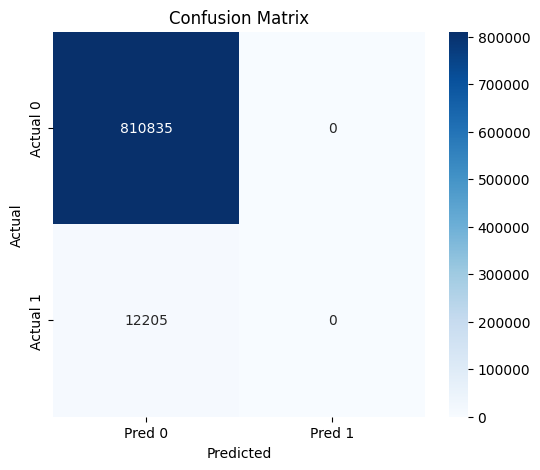

In [ ]:


# --- 1. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

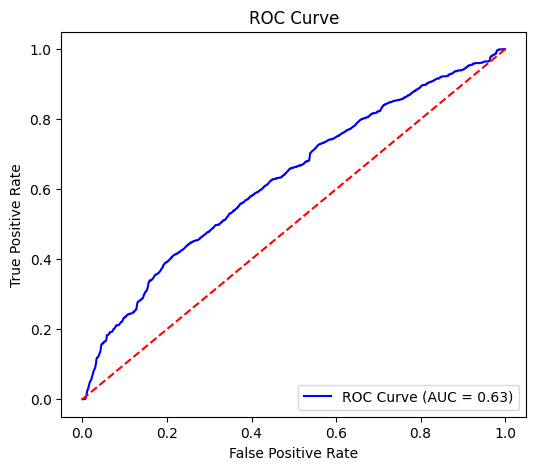

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

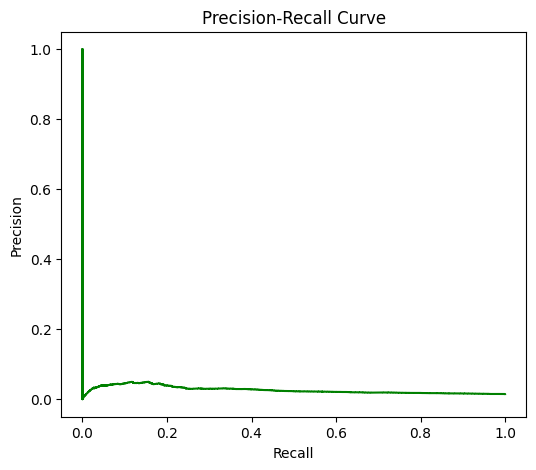

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

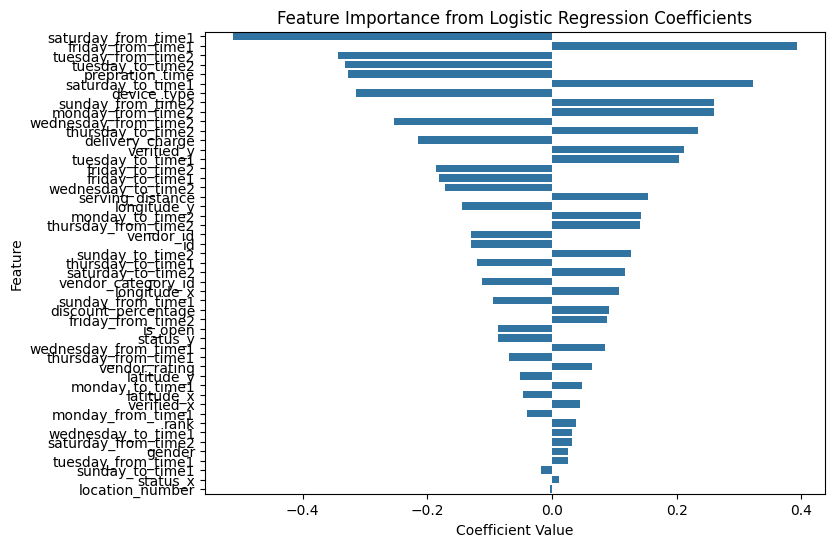

In [ ]:
feature_names = X.columns  # original column names before scaling
coefs = model.coef_[0]

coef_df = sorted(zip(feature_names, coefs), key=lambda x: abs(x[1]), reverse=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=[c for _, c in coef_df], y=[f for f, _ in coef_df])
plt.title("Feature Importance from Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [ ]:
import pandas as pd

df_1 = dataset2[dataset2['target'] == 1]
df_0 = dataset2[dataset2['target'] == 0]

min_count = min(len(df_1), len(df_0))

# Increase by 25%
target_count = int(min_count * 2 )

# Sample from both classes
df_1_balanced = df_1.sample(n=len(df_1), replace=True, random_state=42)
df_0_balanced = df_0.sample(n=target_count, replace=True, random_state=42)

# Combine back
balanced_df = pd.concat([df_1_balanced, df_0_balanced]).sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['target'].value_counts())


target
0    122482
1     61241
Name: count, dtype: int64


In [ ]:

X = balanced_df.drop('target', axis=1)  
y = balanced_df['target']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Scaling data (same as before)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build XGBoost model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # eval_metric to avoid warning
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:46:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8225608926384542

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87     24509
           1       0.74      0.72      0.73     12236

    accuracy                           0.82     36745
   macro avg       0.80      0.80      0.80     36745
weighted avg       0.82      0.82      0.82     36745



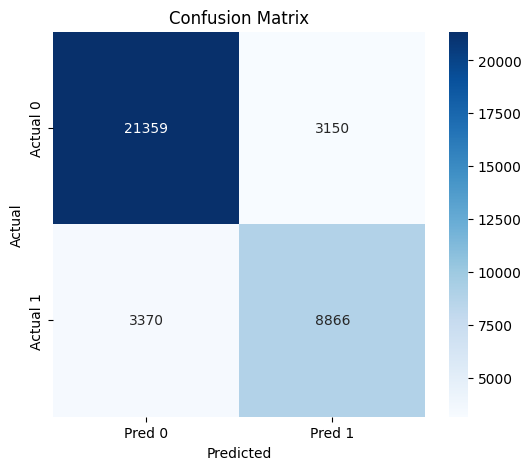

In [ ]:


# --- 1. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

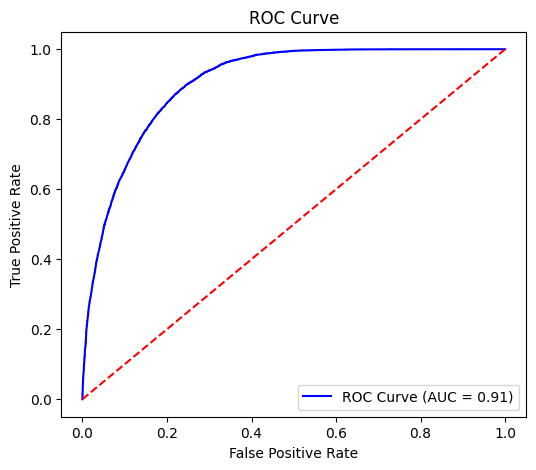

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

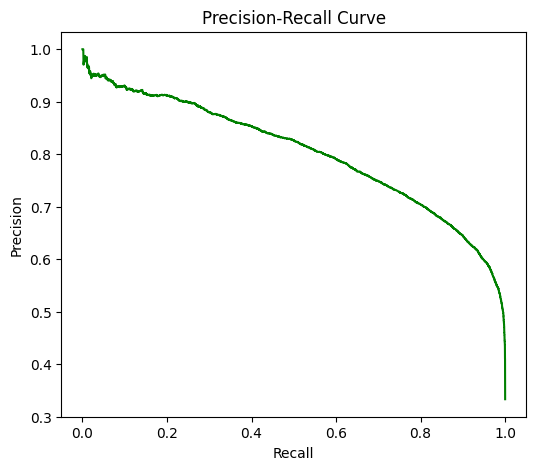

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# Testing 

In [102]:
# Step 1: Cartesian product of customers, locations, and vendors
test_customers_locations = test_locations[['customer_id', 'location_number']].drop_duplicates()
vendors_list = vendors['id'].unique()

# Cartesian product
all_combos = []
for _, row in test_customers_locations.iterrows():
    cid = row['customer_id']
    loc = row['location_number']
    for vid in vendors_list:
        all_combos.append([cid, loc, vid])

test_combos_df = pd.DataFrame(all_combos, columns=['customer_id', 'location_number', 'vendor_id'])

# Step 2: Create CID X LOC_NUM X VENDOR key
test_combos_df['CID X LOC_NUM X VENDOR'] = (
    test_combos_df['customer_id'] + ' X ' +
    test_combos_df['location_number'].astype(str) + ' X ' +
    test_combos_df['vendor_id'].astype(str)
)

# Step 3: Merge customer features
test_final_df = test_combos_df.merge(test_customers, on='customer_id', how='left')

# Step 4: Merge location features
test_final_df = test_final_df.merge(test_locations, on=['customer_id', 'location_number'], how='left')

# Step 5: Merge vendor features
test_final_df = test_final_df.merge(vendors, left_on='vendor_id', right_on='id', how='left')

In [103]:
test_final_df

customer_id  location_number  vendor_id CID X LOC_NUM X VENDOR gender  \
0           Z59FTQD                0          4        Z59FTQD X 0 X 4    NaN   
1           Z59FTQD                0         13       Z59FTQD X 0 X 13    NaN   
2           Z59FTQD                0         20       Z59FTQD X 0 X 20    NaN   
3           Z59FTQD                0         23       Z59FTQD X 0 X 23    NaN   
4           Z59FTQD                0         28       Z59FTQD X 0 X 28    NaN   
...             ...              ...        ...                    ...    ...   
1673595     3O8LSR3                0        849      3O8LSR3 X 0 X 849   Male   
1673596     3O8LSR3                0        855      3O8LSR3 X 0 X 855   Male   
1673597     3O8LSR3                0        856      3O8LSR3 X 0 X 856   Male   
1673598     3O8LSR3                0        858      3O8LSR3 X 0 X 858   Male   
1673599     3O8LSR3                0        907      3O8LSR3 X 0 X 907   Male   

         dob  status_x  verified_x language_x     created_at_x  \
0        NaN       1.0         1.0        NaN   2/9/2025 21:54   
1        NaN       1.0         1.0        NaN   2/9/2025 21:54   
2        NaN       1.0         1.0        NaN   2/9/2025 21:54   
3        NaN       1.0         1.0        NaN   2/9/2025 21:54   
4        NaN       1.0         1.0        NaN   2/9/2025 21:54   
...      ...       ...         ...        ...              ...   
1673595  NaN       1.0         1.0         EN  10/13/2023 1:44   
1673596  NaN       1.0         1.0         EN  10/13/2023 1:44   
1673597  NaN       1.0         1.0         EN  10/13/2023 1:44   
1673598  NaN       1.0         1.0         EN  10/13/2023 1:44   
1673599  NaN       1.0         1.0         EN  10/13/2023 1:44   

            updated_at_x location_type  latitude_x  longitude_x   id  \
0         2/9/2025 21:54           NaN  126.032278    -9.106019    4   
1         2/9/2025 21:54           NaN  126.032278    -9.106019   13   
2         2/9/2025 21:54           NaN  126.032278    -9.106019   20   
3         2/9/2025 21:54           NaN  126.032278    -9.106019   23   
4         2/9/2025 21:54           NaN  126.032278    -9.106019   28   
...                  ...           ...         ...          ...  ...   
1673595  10/13/2023 1:44         Other   -0.188562     0.827181  849   
1673596  10/13/2023 1:44         Other   -0.188562     0.827181  855   
1673597  10/13/2023 1:44         Other   -0.188562     0.827181  856   
1673598  10/13/2023 1:44         Other   -0.188562     0.827181  858   
1673599  10/13/2023 1:44         Other   -0.188562     0.827181  907   

         authentication_id  latitude_y  longitude_y vendor_category_en  \
0                   118597   -0.588596     0.754434        Restaurants   
1                   118608   -0.471654     0.744470        Restaurants   
2                   118616   -0.407527     0.643681        Restaurants   
3                   118619   -0.585385     0.753811        Restaurants   
4                   118624    0.480602     0.552850        Restaurants   
...                    ...         ...          ...                ...   
1673595             130455   -1.588060    -0.066441        Restaurants   
1673596             130463    2.145206     0.745025        Restaurants   
1673597             130464    0.251469     0.483633        Restaurants   
1673598             130468    0.019817     0.587087        Restaurants   
1673599             132953   13.335131    -1.449556        Restaurants   

         vendor_category_id  delivery_charge  serving_distance  is_open  \
0                         2              0.0                 6        1   
1                         2              0.7                 5        1   
2                         2              0.0                 8        1   
3                         2              0.0                 5        1   
4                         2              0.7                15        1   
...                     ...           

In [104]:
cols_to_drop = [
    'dob',
    'language_x',
    'location_type',
    'commission',
    'is_haked_delivering',
    'open_close_flags',
    'one_click_vendor',
    'country_id',
    'city_id',
    'display_orders',
    'vendor_category_en',
    'created_at_y',
    'updated_at_y',
    'created_at_x',
    'updated_at_x',
    'vendor_tag_name',
    'primary_tags',
    'vendor_tag'
]

test_final_df  = test_final_df.drop(columns=['OpeningTime', 'OpeningTime2'], axis=1 )
test_final_df  = test_final_df.drop(columns=['language_y','authentication_id'] ,axis=1)

test_final_df  = test_final_df.drop(columns=cols_to_drop)
test_final_df['gender'] = test_final_df['gender'].str.strip().str.lower()
test_final_df['gender'] = test_final_df['gender'].replace({
    '?????': np.nan,
    '': np.nan,
    '1': np.nan
})
test_final_df = test_final_df[test_final_df['gender'].isin(['male', 'female'])]

time_cols = [
    'sunday_from_time1', 'sunday_to_time1', 'sunday_from_time2', 'sunday_to_time2',
    'monday_from_time1', 'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
    'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2', 'tuesday_to_time2',
    'wednesday_from_time1', 'wednesday_to_time1', 'wednesday_from_time2', 'wednesday_to_time2',
    'thursday_from_time1', 'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
    'friday_from_time1', 'friday_to_time1', 'friday_from_time2', 'friday_to_time2',
    'saturday_from_time1', 'saturday_to_time1', 'saturday_from_time2', 'saturday_to_time2'
]

# Function to convert time to minutes since midnight
def time_to_minutes(t):
    if pd.isna(t) or t == '':
        return -1  # Missing value flag
    try:
        h, m, s = map(int, t.split(':'))
        return h * 60 + m + s / 60
    except:
        return -1  # For any invalid format

# Apply conversion
for col in time_cols:
    test_final_df [col] = test_final_df[col].apply(time_to_minutes)

In [105]:
test_final_df

customer_id  location_number  vendor_id CID X LOC_NUM X VENDOR gender  \
100         0JP29SK                0          4        0JP29SK X 0 X 4   male   
101         0JP29SK                0         13       0JP29SK X 0 X 13   male   
102         0JP29SK                0         20       0JP29SK X 0 X 20   male   
103         0JP29SK                0         23       0JP29SK X 0 X 23   male   
104         0JP29SK                0         28       0JP29SK X 0 X 28   male   
...             ...              ...        ...                    ...    ...   
1673595     3O8LSR3                0        849      3O8LSR3 X 0 X 849   male   
1673596     3O8LSR3                0        855      3O8LSR3 X 0 X 855   male   
1673597     3O8LSR3                0        856      3O8LSR3 X 0 X 856   male   
1673598     3O8LSR3                0        858      3O8LSR3 X 0 X 858   male   
1673599     3O8LSR3                0        907      3O8LSR3 X 0 X 907   male   

         status_x  verified_x  latitude_x  longitude_x   id  latitude_y  \
100           1.0         1.0    0.278709   -78.623847    4   -0.588596   
101           1.0         1.0    0.278709   -78.623847   13   -0.471654   
102           1.0         1.0    0.278709   -78.623847   20   -0.407527   
103           1.0         1.0    0.278709   -78.623847   23   -0.585385   
104           1.0         1.0    0.278709   -78.623847   28    0.480602   
...           ...         ...         ...          ...  ...         ...   
1673595       1.0         1.0   -0.188562     0.827181  849   -1.588060   
1673596       1.0         1.0   -0.188562     0.827181  855    2.145206   
1673597       1.0         1.0   -0.188562     0.827181  856    0.251469   
1673598       1.0         1.0   -0.188562     0.827181  858    0.019817   
1673599       1.0         1.0   -0.188562     0.827181  907   13.335131   

         longitude_y  vendor_category_id  delivery_charge  serving_distance  \
100         0.754434                   2              0.0                 6   
101         0.744470                   2              0.7                 5   
102         0.643681                   2              0.0                 8   
103         0.753811                   2              0.0                 5   
104         0.552850                   2              0.7                15   
...              ...                 ...              ...               ...   
1673595    -0.066441                   2              0.0                10   
1673596     0.745025                   2              0.0                 8   
1673597     0.483633                   2              0.0                 7   
1673598     0.587087                   2              0.0                 3   
1673599    -1.449556                   2              0.7                12   

         is_open  prepration_time  discount_percentage  status_y  verified_y  \
100            1               15                    0         1           1   
101            1               14                    0         1           1   
102            1               19                    0         1           1   
103            1               16                    0         1           1   
104            1               10                    0         1           1   
...          ...              ...                  ...       ...         ...   
1673595        1               10                    0         1           1   
1673596        1               10                    0         1           1   
1673597        1               10                    0         1           1   
1673598        1               10                    0         1           1   
1673599        1               20                    0         1           1   

         rank  vendor_rating  sunday_from_time1  sunday_to_time1  \
100        11            4.4                0.0             30.0   
101        11            4.7                0.0             90.0   
102         1       

In [ ]:
test_final_df["gender"] = test_final_df["gender"].map({"female": 0, "male": 1})

In [122]:
test_dataset1 = test_final_df[['customer_id', 'CID X LOC_NUM X VENDOR']]  
test_dataset2 = test_final_df.drop(columns=['customer_id', 'CID X LOC_NUM X VENDOR']) 

In [123]:
test_dataset2

location_number  vendor_id  gender  status_x  verified_x  latitude_x  \
100                    0          4       1       1.0         1.0    0.278709   
101                    0         13       1       1.0         1.0    0.278709   
102                    0         20       1       1.0         1.0    0.278709   
103                    0         23       1       1.0         1.0    0.278709   
104                    0         28       1       1.0         1.0    0.278709   
...                  ...        ...     ...       ...         ...         ...   
1673595                0        849       1       1.0         1.0   -0.188562   
1673596                0        855       1       1.0         1.0   -0.188562   
1673597                0        856       1       1.0         1.0   -0.188562   
1673598                0        858       1       1.0         1.0   -0.188562   
1673599                0        907       1       1.0         1.0   -0.188562   

         longitude_x   id  latitude_y  longitude_y  vendor_category_id  \
100       -78.623847    4   -0.588596     0.754434                   2   
101       -78.623847   13   -0.471654     0.744470                   2   
102       -78.623847   20   -0.407527     0.643681                   2   
103       -78.623847   23   -0.585385     0.753811                   2   
104       -78.623847   28    0.480602     0.552850                   2   
...              ...  ...         ...          ...                 ...   
1673595     0.827181  849   -1.588060    -0.066441                   2   
1673596     0.827181  855    2.145206     0.745025                   2   
1673597     0.827181  856    0.251469     0.483633                   2   
1673598     0.827181  858    0.019817     0.587087                   2   
1673599     0.827181  907   13.335131    -1.449556                   2   

         delivery_charge  serving_distance  is_open  prepration_time  \
100                  0.0                 6        1               15   
101                  0.7                 5        1               14   
102                  0.0                 8        1               19   
103                  0.0                 5        1               16   
104                  0.7                15        1               10   
...                  ...               ...      ...              ...   
1673595              0.0                10        1               10   
1673596              0.0                 8        1               10   
1673597              0.0                 7        1               10   
1673598              0.0                 3        1               10   
1673599              0.7                12        1               20   

         discount_percentage  status_y  verified_y  rank  vendor_rating  \
100                        0         1           1    11            4.4   
101                        0         1           1    11            4.7   
102                        0         1           1     1            4.5   
103                        0         1           1    11            4.5   
104                        0         1           1    11            4.4   
...                      ...       ...         ...   ...            ...   
1673595                    0         1           1     1            4.1   
1673596                    0         1           1     1            4.2   
1673597                    0         1           1    11            4.3   
1673598                    0         1           1    11            4.2   
1673599                    0         1           1    11            4.3   

         sunday_from_time1  sunday_to_time1  sunday_from_time2  \
100                    0.0             30.0              480.0   
101                    0.0             90.0              480.0   
102                  480.0           1365.0               -1.0   
103                  540.0           1410.0               -1.0   
104                    1.0             30.0        

In [109]:
dataset2.columns

Index(['location_number', 'vendor_id', 'gender', 'status_x', 'verified_x',
       'latitude_x', 'longitude_x', 'id', 'latitude_y', 'longitude_y',
       'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open',
       'prepration_time', 'discount_percentage', 'status_y', 'verified_y',
       'rank', 'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1',
       'saturday_from_time2', 'saturday_to_time2', 'device_type'

In [ ]:
test_dataset2.columns   #no target that what we want

Index(['location_number', 'vendor_id', 'gender', 'status_x', 'verified_x',
       'latitude_x', 'longitude_x', 'id', 'latitude_y', 'longitude_y',
       'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open',
       'prepration_time', 'discount_percentage', 'status_y', 'verified_y',
       'rank', 'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1',
       'saturday_from_time2', 'saturday_to_time2', 'device_type'

In [114]:
test_dataset2.isnull().sum()

location_number           0
vendor_id                 0
gender                    0
status_x                  0
verified_x                0
latitude_x              200
longitude_x             200
id                        0
latitude_y                0
longitude_y               0
vendor_category_id        0
delivery_charge           0
serving_distance          0
is_open                   0
prepration_time           0
discount_percentage       0
status_y                  0
verified_y                0
rank                      0
vendor_rating             0
sunday_from_time1         0
sunday_to_time1           0
sunday_from_time2         0
sunday_to_time2           0
monday_from_time1         0
monday_to_time1           0
monday_from_time2         0
monday_to_time2           0
tuesday_from_time1        0
tuesday_to_time1          0
tuesday_from_time2        0
tuesday_to_time2          0
wednesday_from_time1      0
wednesday_to_time1        0
wednesday_from_time2      0
wednesday_to_time2  

In [115]:
test_dataset2 = test_dataset2.fillna(method='bfill')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7788\4106409884.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_dataset2 = test_dataset2.fillna(method='bfill')


In [117]:
test_dataset2.isnull().sum()

location_number         0
vendor_id               0
gender                  0
status_x                0
verified_x              0
latitude_x              0
longitude_x             0
id                      0
latitude_y              0
longitude_y             0
vendor_category_id      0
delivery_charge         0
serving_distance        0
is_open                 0
prepration_time         0
discount_percentage     0
status_y                0
verified_y              0
rank                    0
vendor_rating           0
sunday_from_time1       0
sunday_to_time1         0
sunday_from_time2       0
sunday_to_time2         0
monday_from_time1       0
monday_to_time1         0
monday_from_time2       0
monday_to_time2         0
tuesday_from_time1      0
tuesday_to_time1        0
tuesday_from_time2      0
tuesday_to_time2        0
wednesday_from_time1    0
wednesday_to_time1      0
wednesday_from_time2    0
wednesday_to_time2      0
thursday_from_time1     0
thursday_to_time1       0
thursday_fro

In [119]:
test_dataset2

location_number  vendor_id gender  status_x  verified_x  latitude_x  \
100                    0          4   male       1.0         1.0    0.278709   
101                    0         13   male       1.0         1.0    0.278709   
102                    0         20   male       1.0         1.0    0.278709   
103                    0         23   male       1.0         1.0    0.278709   
104                    0         28   male       1.0         1.0    0.278709   
...                  ...        ...    ...       ...         ...         ...   
1673595                0        849   male       1.0         1.0   -0.188562   
1673596                0        855   male       1.0         1.0   -0.188562   
1673597                0        856   male       1.0         1.0   -0.188562   
1673598                0        858   male       1.0         1.0   -0.188562   
1673599                0        907   male       1.0         1.0   -0.188562   

         longitude_x   id  latitude_y  longitude_y  vendor_category_id  \
100       -78.623847    4   -0.588596     0.754434                   2   
101       -78.623847   13   -0.471654     0.744470                   2   
102       -78.623847   20   -0.407527     0.643681                   2   
103       -78.623847   23   -0.585385     0.753811                   2   
104       -78.623847   28    0.480602     0.552850                   2   
...              ...  ...         ...          ...                 ...   
1673595     0.827181  849   -1.588060    -0.066441                   2   
1673596     0.827181  855    2.145206     0.745025                   2   
1673597     0.827181  856    0.251469     0.483633                   2   
1673598     0.827181  858    0.019817     0.587087                   2   
1673599     0.827181  907   13.335131    -1.449556                   2   

         delivery_charge  serving_distance  is_open  prepration_time  \
100                  0.0                 6        1               15   
101                  0.7                 5        1               14   
102                  0.0                 8        1               19   
103                  0.0                 5        1               16   
104                  0.7                15        1               10   
...                  ...               ...      ...              ...   
1673595              0.0                10        1               10   
1673596              0.0                 8        1               10   
1673597              0.0                 7        1               10   
1673598              0.0                 3        1               10   
1673599              0.7                12        1               20   

         discount_percentage  status_y  verified_y  rank  vendor_rating  \
100                        0         1           1    11            4.4   
101                        0         1           1    11            4.7   
102                        0         1           1     1            4.5   
103                        0         1           1    11            4.5   
104                        0         1           1    11            4.4   
...                      ...       ...         ...   ...            ...   
1673595                    0         1           1     1            4.1   
1673596                    0         1           1     1            4.2   
1673597                    0         1           1    11            4.3   
1673598                    0         1           1    11            4.2   
1673599                    0         1           1    11            4.3   

         sunday_from_time1  sunday_to_time1  sunday_from_time2  \
100                    0.0             30.0              480.0   
101                    0.0             90.0              480.0   
102                  480.0           1365.0               -1.0   
103                  540.0           1410.0               -1.0   
104                    1.0             30.0              660.0 

In [124]:
scaler = StandardScaler()
test_dataset2 = scaler.fit_transform(test_dataset2)

In [125]:
test_dataset2

array([[-0.67497928, -1.1814898 ,  0.29039333, ...,  0.8035361 ,
         1.26271465,  0.10050378],
       [-0.67497928, -1.14415864,  0.29039333, ...,  0.49593304,
         1.26271465,  0.10050378],
       [-0.67497928, -1.11512329,  0.29039333, ..., -0.73704258,
        -0.80361613,  0.10050378],
       ...,
       [-0.67497928,  2.35252687,  0.29039333, ...,  0.53438342,
         1.26271465,  0.10050378],
       [-0.67497928,  2.36082268,  0.29039333, ...,  0.53438342,
         1.26271465,  0.10050378],
       [-0.67497928,  2.56407012,  0.29039333, ...,  1.80324606,
         1.19957676,  0.10050378]])

In [126]:
predictions = model.predict(test_dataset2)

In [ ]:
test_dataset1 

customer_id CID X LOC_NUM X VENDOR
100         0JP29SK        0JP29SK X 0 X 4
101         0JP29SK       0JP29SK X 0 X 13
102         0JP29SK       0JP29SK X 0 X 20
103         0JP29SK       0JP29SK X 0 X 23
104         0JP29SK       0JP29SK X 0 X 28
...             ...                    ...
1673595     3O8LSR3      3O8LSR3 X 0 X 849
1673596     3O8LSR3      3O8LSR3 X 0 X 855
1673597     3O8LSR3      3O8LSR3 X 0 X 856
1673598     3O8LSR3      3O8LSR3 X 0 X 858
1673599     3O8LSR3      3O8LSR3 X 0 X 907

[1153400 rows x 2 columns]

In [129]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [131]:
test_dataset1.loc[:, 'prediction'] = predictions


In [137]:
test_dataset1['prediction'].value_counts()

prediction
0    1109321
1      44079
Name: count, dtype: int64

In [ ]:
test_dataset1 = test_dataset1.rename(columns={'prediction': 'target'})

submission_df = test_dataset1[['CID X LOC_NUM X VENDOR', 'target']]

submission_df.to_csv('Submission.csv', index=False)

HAPPY